# Proyecto Integrador - Grupo 1

# Importamos base de datos y librerías y funciones a utilizar 

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install more-itertools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.9 MB/s 
     |████████████████████████████████| 6.3 MB 43.5 MB/s 
     |████████████████████████████████| 16.7 MB 42.8 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
import statsmodels.api as sm


from matplotlib.ticker import FormatStrFormatter
from more_itertools import flatten
import itertools

import requests
import json

import xgboost as xgb


In [ ]:
data=pd.read_csv('/content/gdrive/MyDrive/sysarmy.csv',sep=',',skiprows=10)
data

Estoy trabajando en  Dónde estás trabajando Dedicación  \
0               Argentina              Catamarca  Full-Time   
1               Argentina                  Chaco  Full-Time   
2               Argentina                  Chaco  Full-Time   
3               Argentina                  Chaco  Full-Time   
4               Argentina                  Chaco  Full-Time   
...                   ...                    ...        ...   
5353            Argentina                Tucumán  Full-Time   
5354            Argentina                Tucumán  Full-Time   
5355            Argentina                Tucumán  Full-Time   
5356            Argentina                Tucumán  Full-Time   
5357            Argentina                Tucumán  Part-Time   

                   Tipo de contrato  \
0         Staff (planta permanente)   
1     Remoto (empresa de otro país)   
2         Staff (planta permanente)   
3     Remoto (empresa de otro país)   
4         Staff (planta permanente)   
...                             ...   
5353      Staff (planta permanente)   
5354      Staff (planta permanente)   
5355  Remoto (empresa de otro país)   
5356      Staff (planta permanente)   
5357                      Freelance   

     Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                                300000            
1                                                900000            
2                                                120000            
3                                                440000            
4                                                140000            
...                                                 ...            
5353                                              311.7            
5354                                             150000            
5355                                             230000            
5356                                             450989            
5357                                              60000            

     Último salario mensual o retiro NETO (en tu moneda local)  \
0                                                245000          
1                                                850000          
2                                                115000          
3                                                   NaN          
4                                                125000          
...                                                 ...          
5353                                              214.8          
5354                                              93000          
5355                                             190900          
5356                                             297750          
5357                                              45000          

                        Pagos en dólares  \
0                                    NaN   
1       Cobro todo el salario en dólares   
2                                    NaN   
3       Cobro todo el salario en dólares   
4                                    NaN   
...                                  ...   
5353  Cobro parte del salario en dólares   
5354  Cobro parte del salario en dólares   
5355  Cobro parte del salario en dólares   
5356  Cobro parte del salario en dólares   
5357                                 NaN   

     Si tu sueldo está dolarizado ¿Cuál fue el último valor del dólar que tomaron?  \
0                                                   NaN                              
1                                                   300                              
2                                                   NaN                              
3                                                   220                              
4                                                   NaN                              
...                                                 ...                              
5353                                  

# Exploración preliminar de los datos


Verificamos valores nulos en el dataset. Destaca la cantidad de nulos (casi el 50%) en la carrera universitaria

In [ ]:
data.isnull().sum()

Estoy trabajando en                                                                        0
Dónde estás trabajando                                                                     0
Dedicación                                                                                 0
Tipo de contrato                                                                           0
Último salario mensual  o retiro BRUTO (en tu moneda local)                                0
Último salario mensual o retiro NETO (en tu moneda local)                                247
Pagos en dólares                                                                        3718
Si tu sueldo está dolarizado ¿Cuál fue el último valor del dólar que tomaron?           4295
Pagos en criptomonedas                                                                  5197
¿Qué porcentaje o monto recibís en criptomonedas?                                       4569
Recibís algún tipo de bono                                            

Evaluamos participación en la encuesta por provincia

In [ ]:
data['Dónde estás trabajando'].value_counts()

Ciudad Autónoma de Buenos Aires    2699
Provincia de Buenos Aires          1101
Córdoba                             495
Santa Fe                            342
Mendoza                             155
Entre Ríos                           73
Chaco                                54
Salta                                50
Río Negro                            47
Tucumán                              45
Neuquén                              45
Misiones                             44
Corrientes                           44
Jujuy                                33
San Juan                             29
Chubut                               25
San Luis                             19
La Rioja                             16
Tierra del Fuego                     14
Santiago del Estero                   9
Santa Cruz                            8
La Pampa                              7
Formosa                               3
Catamarca                             1
Name: Dónde estás trabajando, dtype: int

Verificamos si en CABA (la que tiene más registros) hay un buen porcentaje de datos de educación --> No los hay

In [ ]:
data[data['Dónde estás trabajando']=='Ciudad Autónoma de Buenos Aires'].isnull().sum()

Estoy trabajando en                                                                        0
Dónde estás trabajando                                                                     0
Dedicación                                                                                 0
Tipo de contrato                                                                           0
Último salario mensual  o retiro BRUTO (en tu moneda local)                                0
Último salario mensual o retiro NETO (en tu moneda local)                                102
Pagos en dólares                                                                        1920
Si tu sueldo está dolarizado ¿Cuál fue el último valor del dólar que tomaron?           2187
Pagos en criptomonedas                                                                  2628
¿Qué porcentaje o monto recibís en criptomonedas?                                       2303
Recibís algún tipo de bono                                            

Evaluamos tipos de empleo

In [ ]:
data['Tipo de contrato'].value_counts()

Staff (planta permanente)                                 4068
Remoto (empresa de otro país)                              622
Tercerizado (trabajo a través de consultora o agencia)     438
Freelance                                                  201
Participación societaria en una cooperativa                 29
Name: Tipo de contrato, dtype: int64

Eliminamos las columnas innecesarias

In [ ]:
data.drop(columns={'Último salario mensual o retiro NETO (en tu moneda local)','Pagos en dólares','Si tu sueldo está dolarizado ¿Cuál fue el último valor del dólar que tomaron?',
                   'Pagos en criptomonedas','¿Qué porcentaje o monto recibís en criptomonedas?','A qué está atado el bono',
                   '¿Tuviste actualizaciones de tus ingresos laborales durante 2022? ','¿En qué mes fue el último ajuste? *','Cómo considerás que están tus ingresos laborales comparados con el semestre anterior',
                  '¿Qué tan conforme estás con tus ingresos laborales?'},inplace=True)
data

Estoy trabajando en  Dónde estás trabajando Dedicación  \
0               Argentina              Catamarca  Full-Time   
1               Argentina                  Chaco  Full-Time   
2               Argentina                  Chaco  Full-Time   
3               Argentina                  Chaco  Full-Time   
4               Argentina                  Chaco  Full-Time   
...                   ...                    ...        ...   
5353            Argentina                Tucumán  Full-Time   
5354            Argentina                Tucumán  Full-Time   
5355            Argentina                Tucumán  Full-Time   
5356            Argentina                Tucumán  Full-Time   
5357            Argentina                Tucumán  Part-Time   

                   Tipo de contrato  \
0         Staff (planta permanente)   
1     Remoto (empresa de otro país)   
2         Staff (planta permanente)   
3     Remoto (empresa de otro país)   
4         Staff (planta permanente)   
...                             ...   
5353      Staff (planta permanente)   
5354      Staff (planta permanente)   
5355  Remoto (empresa de otro país)   
5356      Staff (planta permanente)   
5357                      Freelance   

     Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                                300000            
1                                                900000            
2                                                120000            
3                                                440000            
4                                                140000            
...                                                 ...            
5353                                              311.7            
5354                                             150000            
5355                                             230000            
5356                                             450989            
5357                                              60000            

     Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
0                            No                                        0   
1                            No                                        0   
2                     Un sueldo                                       20   
3                            No                                       54   
4                            No                                       15   
...                         ...                                      ...   
5353                         No                                      13%   
5354         Menos de un sueldo                                       25   
5355                         No                                      10%   
5356                         No                                       75   
5357                         No                                       20   

                              Con qué beneficios contas      Trabajo de  \
0     Abono de Internet, Clases de idiomas, Crédito ...         Infosec   
1     Capacitaciones y/o cursos, Clases de idiomas, ...       Developer   
2                                    Horarios flexibles       Developer   
3                             Ninguna de las anteriores       Developer   
4     Vacaciones flexibles (adicionales a las reglam...       Developer   
...                                                 ...             ...   
5353  Abono de Internet, Capacitaciones y/o cursos, ...     QA / Tester   
5354  Capacitaciones y/o cursos, Descuento en gimnas...  Recruiter / HR   
5355  Abono de Internet, Capacitaciones y/o cursos, ...     QA / Tester   
5356            Abono de Internet, Stock options / RSUs     QA / Tester   
5357  Capacitaciones y/o cursos, Clases de idiomas, ...     QA / Tester   

      Años de experiencia  ...      Estado  \
0                    10.0  ...    Completo   
1                     2.0  ...         NaN   
2         

Vemos los tipos de datos para controlar problemas en los datos y revisar tratamientos necesarios

In [ ]:
data.dtypes

Estoy trabajando en                                                                  object
Dónde estás trabajando                                                               object
Dedicación                                                                           object
Tipo de contrato                                                                     object
Último salario mensual  o retiro BRUTO (en tu moneda local)                          object
Recibís algún tipo de bono                                                           object
¿De qué % fue el ajuste total acumulado?                                             object
Con qué beneficios contas                                                            object
Trabajo de                                                                           object
Años de experiencia                                                                 float64
Antigüedad en la empresa actual                                                 

# Limpieza y análisis gráfico de columnas importantes

## Columna Dedicación

Podemos prescindir de los datos de Part-Time

In [ ]:
data['Dedicación'].value_counts()

Full-Time    5106
Part-Time     252
Name: Dedicación, dtype: int64

In [ ]:
data=data[data['Dedicación']=='Full-Time']
data['Dedicación'].value_counts()

Full-Time    5106
Name: Dedicación, dtype: int64

In [ ]:
data

Estoy trabajando en  Dónde estás trabajando Dedicación  \
0               Argentina              Catamarca  Full-Time   
1               Argentina                  Chaco  Full-Time   
2               Argentina                  Chaco  Full-Time   
3               Argentina                  Chaco  Full-Time   
4               Argentina                  Chaco  Full-Time   
...                   ...                    ...        ...   
5352            Argentina                Tucumán  Full-Time   
5353            Argentina                Tucumán  Full-Time   
5354            Argentina                Tucumán  Full-Time   
5355            Argentina                Tucumán  Full-Time   
5356            Argentina                Tucumán  Full-Time   

                   Tipo de contrato  \
0         Staff (planta permanente)   
1     Remoto (empresa de otro país)   
2         Staff (planta permanente)   
3     Remoto (empresa de otro país)   
4         Staff (planta permanente)   
...                             ...   
5352      Staff (planta permanente)   
5353      Staff (planta permanente)   
5354      Staff (planta permanente)   
5355  Remoto (empresa de otro país)   
5356      Staff (planta permanente)   

     Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                                300000            
1                                                900000            
2                                                120000            
3                                                440000            
4                                                140000            
...                                                 ...            
5352                                             120000            
5353                                              311.7            
5354                                             150000            
5355                                             230000            
5356                                             450989            

     Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
0                            No                                        0   
1                            No                                        0   
2                     Un sueldo                                       20   
3                            No                                       54   
4                            No                                       15   
...                         ...                                      ...   
5352                         No                                        -   
5353                         No                                      13%   
5354         Menos de un sueldo                                       25   
5355                         No                                      10%   
5356                         No                                       75   

                              Con qué beneficios contas      Trabajo de  \
0     Abono de Internet, Clases de idiomas, Crédito ...         Infosec   
1     Capacitaciones y/o cursos, Clases de idiomas, ...       Developer   
2                                    Horarios flexibles       Developer   
3                             Ninguna de las anteriores       Developer   
4     Vacaciones flexibles (adicionales a las reglam...       Developer   
...                                                 ...             ...   
5352  Abono de Internet, Descuento en gimnasios / Cl...     QA / Tester   
5353  Abono de Internet, Capacitaciones y/o cursos, ...     QA / Tester   
5354  Capacitaciones y/o cursos, Descuento en gimnas...  Recruiter / HR   
5355  Abono de Internet, Capacitaciones y/o cursos, ...     QA / Tester   
5356            Abono de Internet, Stock options / RSUs     QA / Tester   

      Años de experiencia  ...      Estado  \
0                    10.0  ...    Completo   
1                     2.0  ...         NaN   
2         

## Columna Salario (Último salario mensual  o retiro BRUTO (en tu moneda local)

Primero hay que eliminar todas las observaciones que están en dólares ya que no convertirlas a moneda local por falta de datos en la columna de tipo de cambio. No las podemos usar para el análisis. 

In [ ]:
lista_salario = data['Último salario mensual  o retiro BRUTO (en tu moneda local)'].to_list() #pasamos los datos de la columna genero a lista


columna_salario = [] 

for opcion in lista_salario:

    if re.search(r'\busd\b', opcion, re.IGNORECASE) or re.search('(us.)', opcion, re.IGNORECASE) or re.search(r'\beur\b', opcion, re.IGNORECASE) or re.search(r'\bdolar\b', opcion, re.IGNORECASE) :
        columna_salario.append(None)  # se guarda en float

    else:
        columna_salario.append(opcion)

data = data.assign(salario2=columna_salario)  # crea una nueva columna y pone los datos de la lista

Hay que sacar todos los dignos especiales ($) y cualquier otra string que haya quedado.

In [ ]:
data['salario2'] = data['salario2'].str.extract('(\d+(?:\.\d+)?)')

In [ ]:
data

Estoy trabajando en  Dónde estás trabajando Dedicación  \
0               Argentina              Catamarca  Full-Time   
1               Argentina                  Chaco  Full-Time   
2               Argentina                  Chaco  Full-Time   
3               Argentina                  Chaco  Full-Time   
4               Argentina                  Chaco  Full-Time   
...                   ...                    ...        ...   
5352            Argentina                Tucumán  Full-Time   
5353            Argentina                Tucumán  Full-Time   
5354            Argentina                Tucumán  Full-Time   
5355            Argentina                Tucumán  Full-Time   
5356            Argentina                Tucumán  Full-Time   

                   Tipo de contrato  \
0         Staff (planta permanente)   
1     Remoto (empresa de otro país)   
2         Staff (planta permanente)   
3     Remoto (empresa de otro país)   
4         Staff (planta permanente)   
...                             ...   
5352      Staff (planta permanente)   
5353      Staff (planta permanente)   
5354      Staff (planta permanente)   
5355  Remoto (empresa de otro país)   
5356      Staff (planta permanente)   

     Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                                300000            
1                                                900000            
2                                                120000            
3                                                440000            
4                                                140000            
...                                                 ...            
5352                                             120000            
5353                                              311.7            
5354                                             150000            
5355                                             230000            
5356                                             450989            

     Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
0                            No                                        0   
1                            No                                        0   
2                     Un sueldo                                       20   
3                            No                                       54   
4                            No                                       15   
...                         ...                                      ...   
5352                         No                                        -   
5353                         No                                      13%   
5354         Menos de un sueldo                                       25   
5355                         No                                      10%   
5356                         No                                       75   

                              Con qué beneficios contas      Trabajo de  \
0     Abono de Internet, Clases de idiomas, Crédito ...         Infosec   
1     Capacitaciones y/o cursos, Clases de idiomas, ...       Developer   
2                                    Horarios flexibles       Developer   
3                             Ninguna de las anteriores       Developer   
4     Vacaciones flexibles (adicionales a las reglam...       Developer   
...                                                 ...             ...   
5352  Abono de Internet, Descuento en gimnasios / Cl...     QA / Tester   
5353  Abono de Internet, Capacitaciones y/o cursos, ...     QA / Tester   
5354  Capacitaciones y/o cursos, Descuento en gimnas...  Recruiter / HR   
5355  Abono de Internet, Capacitaciones y/o cursos, ...     QA / Tester   
5356            Abono de Internet, Stock options / RSUs     QA / Tester   

      Años de experiencia  ...                                        Carrera  \
0                    10.0  ...  Licenciatura en redes y comunicació

In [ ]:
data['salario2'] = data['salario2'].str.replace(".","")
data.head(150) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


Estoy trabajando en            Dónde estás trabajando Dedicación  \
0              Argentina                        Catamarca  Full-Time   
1              Argentina                            Chaco  Full-Time   
2              Argentina                            Chaco  Full-Time   
3              Argentina                            Chaco  Full-Time   
4              Argentina                            Chaco  Full-Time   
..                   ...                              ...        ...   
154            Argentina  Ciudad Autónoma de Buenos Aires  Full-Time   
155            Argentina  Ciudad Autónoma de Buenos Aires  Full-Time   
156            Argentina  Ciudad Autónoma de Buenos Aires  Full-Time   
157            Argentina  Ciudad Autónoma de Buenos Aires  Full-Time   
158            Argentina  Ciudad Autónoma de Buenos Aires  Full-Time   

                                      Tipo de contrato  \
0                            Staff (planta permanente)   
1                        Remoto (empresa de otro país)   
2                            Staff (planta permanente)   
3                        Remoto (empresa de otro país)   
4                            Staff (planta permanente)   
..                                                 ...   
154                          Staff (planta permanente)   
155  Tercerizado (trabajo a través de consultora o ...   
156                          Staff (planta permanente)   
157                      Remoto (empresa de otro país)   
158                          Staff (planta permanente)   

    Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                               300000            
1                                               900000            
2                                               120000            
3                                               440000            
4                                               140000            
..                                                 ...            
154                                             260000            
155                                             170000            
156                                             298572            
157                                            1000000            
158                                             197500            

    Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
0                           No                                        0   
1                           No                                        0   
2                    Un sueldo                                       20   
3                           No                                       54   
4                           No                                       15   
..                         ...                                      ...   
154                         No      22% por perfo + IPC todos los meses   
155         Menos de un sueldo                                       40   
156      De uno a tres sueldos                                       34   
157         Menos de un sueldo                                        0   
158                         No                                       20   

                             Con qué beneficios contas Trabajo de  \
0    Abono de Internet, Clases de idiomas, Crédito ...    Infosec   
1    Capacitaciones y/o cursos, Clases de idiomas, ...  Developer   
2                                   Horarios flexibles  Developer   
3                            Ninguna de las anteriores  Developer   
4    Vacaciones flexibles (adicionales a las reglam...  Developer   
..                                                 ...        ...   
154  Abono de Internet, Capacitaciones y/o cursos, ...  Developer   
155  Abono de Internet, Clases de idiomas, Horarios...  Developer   
156                          Ninguna de las anteriores  Developer   
157  Abono de Internet, Capacitaciones y/o cur

In [ ]:
data['salario2'] = data['salario2'].astype('float')

### Gráficos salario

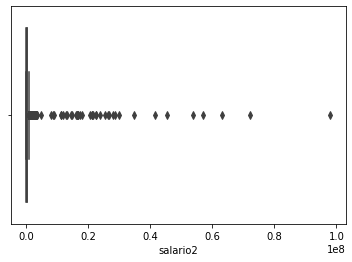

In [ ]:
sns.boxplot(x=data["salario2"])

In [ ]:
data=data[(data['salario2']>100000)&(data['salario2']<2000000)]
data.shape


(4426, 34)

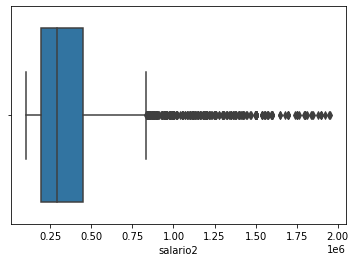

In [ ]:
sns.boxplot(x=data["salario2"])

Revisamos los rangos salariales

In [ ]:
data['salario2'].describe()

count    4.426000e+03
mean     3.804550e+05
std      2.943208e+05
min      1.010000e+05
25%      1.944750e+05
50%      2.920000e+05
75%      4.500000e+05
max      1.955360e+06
Name: salario2, dtype: float64

Creamos un ID

In [ ]:
#creamos identificador unico para simplificar las futuras uniones y seguimiento de elementos particulares
#data['ID'] = np.arange(len(data))
#data=data[['ID','Estoy trabajando en ', 'Dónde estás trabajando', 'Dedicación',
       #'Tipo de contrato',
       #'Último salario mensual  o retiro BRUTO (en tu moneda local)',
       #'Recibís algún tipo de bono',
       #'¿De qué % fue el ajuste total acumulado?', 'Con qué beneficios contas',
       #'Trabajo de', 'Años de experiencia', 'Antigüedad en la empresa actual',
       #'Tiempo en el puesto actual', '¿Cuántas personas a cargo tenés? ',
       #'Plataformas que utilizas en tu puesto actual ',
       #'Lenguajes de programación o tecnologías que utilices en tu puesto actual',
       #'Frameworks, herramientas y librerías que utilices en tu puesto actual',
       #'Bases de datos', 'QA / Testing',
       #'Cantidad de personas en tu organización', 'Modalidad de trabajo',
       #'Si trabajas bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina? ',
       #'¿La recomendás como un buen lugar para trabajar?',
       #'Máximo nivel de estudios', 'Estado', 'Carrera', 'Universidad ',
       #'¿Participaste de algún Boot Camp?',
       #'Si participaste de un Boot Camp, ¿qué carrera estudiaste?',
       #'¿Tenés guardias? ', 'Cuánto cobrás por guardia',
       #'¿Porcentaje, bruto o neto?', 'Tengo (edad)', 'Me identifico (género)',
       #'salario2']]
#data

## Columna Edad

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


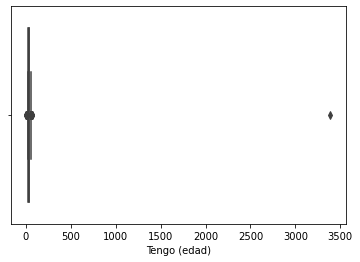

In [ ]:
data['Tengo (edad)'] = data['Tengo (edad)'].str.extract('(\d+(?:\.\d+)?)')
data['Tengo (edad)'] = data['Tengo (edad)'].astype('float')
sns.boxplot(x=data['Tengo (edad)'])

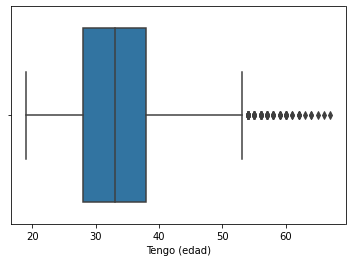

In [ ]:
data=data[(data['Tengo (edad)']>18)&(data['Tengo (edad)']<90)]
sns.boxplot(x=data['Tengo (edad)'])

In [ ]:
data

Estoy trabajando en  Dónde estás trabajando Dedicación  \
0               Argentina              Catamarca  Full-Time   
1               Argentina                  Chaco  Full-Time   
2               Argentina                  Chaco  Full-Time   
3               Argentina                  Chaco  Full-Time   
4               Argentina                  Chaco  Full-Time   
...                   ...                    ...        ...   
5351            Argentina                Tucumán  Full-Time   
5352            Argentina                Tucumán  Full-Time   
5354            Argentina                Tucumán  Full-Time   
5355            Argentina                Tucumán  Full-Time   
5356            Argentina                Tucumán  Full-Time   

                                       Tipo de contrato  \
0                             Staff (planta permanente)   
1                         Remoto (empresa de otro país)   
2                             Staff (planta permanente)   
3                         Remoto (empresa de otro país)   
4                             Staff (planta permanente)   
...                                                 ...   
5351  Tercerizado (trabajo a través de consultora o ...   
5352                          Staff (planta permanente)   
5354                          Staff (planta permanente)   
5355                      Remoto (empresa de otro país)   
5356                          Staff (planta permanente)   

     Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                                300000            
1                                                900000            
2                                                120000            
3                                                440000            
4                                                140000            
...                                                 ...            
5351                                             110000            
5352                                             120000            
5354                                             150000            
5355                                             230000            
5356                                             450989            

     Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
0                            No                                        0   
1                            No                                        0   
2                     Un sueldo                                       20   
3                            No                                       54   
4                            No                                       15   
...                         ...                                      ...   
5351                         No                                      20%   
5352                         No                                        -   
5354         Menos de un sueldo                                       25   
5355                         No                                      10%   
5356                         No                                       75   

                              Con qué beneficios contas      Trabajo de  \
0     Abono de Internet, Clases de idiomas, Crédito ...         Infosec   
1     Capacitaciones y/o cursos, Clases de idiomas, ...       Developer   
2                                    Horarios flexibles       Developer   
3                             Ninguna de las anteriores       Developer   
4     Vacaciones flexibles (adicionales a las reglam...       Developer   
...                                                 ...             ...   
5351  Abono de Internet, Capacitaciones y/o cursos, ...   Data Engineer   
5352  Abono de Internet, Descuento en gimnasios / Cl...     QA / Tester   
5354  Capacitaciones y/o cursos, Descuento en gimnas...  Recruiter / HR   
5355  Abono de Internet, Capacitaciones y/o cursos, ...    

## Columna Género

Hay que limpiar todas las respuestas sin sentido

In [ ]:
data['Me identifico (género)'].value_counts()

Varón Cis                                   3297
Mujer Cis                                    695
Prefiero no decir                            161
No binarie                                    21
Hombre                                        21
                                            ... 
Masculino                                      1
Masculino, pelotudos                           1
Me identifico como un helicóptero apache       1
Me siento un demogorgon .                      1
?                                              1
Name: Me identifico (género), Length: 115, dtype: int64

In [ ]:
data.rename(columns={'Me identifico (género)':'gen'}, inplace=True)

In [ ]:
lista_genero = data['gen'].to_list() #pasamos los datos de la columna genero a lista

# Bucle columna genero: 
columna_genero2 = [] 

for opcion in lista_genero:

    if re.search('(var.)', opcion, re.IGNORECASE) or re.search('(hom.)', opcion, re.IGNORECASE)or re.search('(mach.)', opcion, re.IGNORECASE) or re.search('(mascu.)', opcion, re.IGNORECASE):
        columna_genero2.append("hombre")  # se guarda en float

    elif re.search('(muj.)', opcion, re.IGNORECASE) or re.search('(fem.)', opcion, re.IGNORECASE):
        columna_genero2.append("mujer")

    else:
        columna_genero2.append('None')

data = data.assign(genero2=columna_genero2)  # crea una nueva columna y pone los datos de la lista

# data_frame.to_csv('datos con ambientesA.csv', sep=',')  #nuevo archivo con la nueva columna

In [ ]:
data['gen']

0       Varón Cis
1       Varón Cis
2       Varón Cis
3       Varón Cis
4       Varón Cis
          ...    
5351    Mujer Cis
5352    Mujer Cis
5354    Mujer Cis
5355        Mujer
5356       hombre
Name: gen, Length: 4416, dtype: object

In [ ]:
len(columna_genero2)

4416

In [ ]:
print(data['genero2'].value_counts())

hombre    3425
mujer      713
None       278
Name: genero2, dtype: int64


Armamos dummy de genero

In [ ]:
data_gen = pd.get_dummies(data.genero2, prefix='gen')
data_gen

gen_None  gen_hombre  gen_mujer
0            0           1          0
1            0           1          0
2            0           1          0
3            0           1          0
4            0           1          0
...        ...         ...        ...
5351         0           0          1
5352         0           0          1
5354         0           0          1
5355         0           0          1
5356         0           1          0

[4416 rows x 3 columns]

In [ ]:
#data_gen['ID'] = np.arange(len(data))
#data=pd.merge(data, data_gen, how='inner',on='ID')
data=pd.concat([data,data_gen],axis=1)
data

Estoy trabajando en  Dónde estás trabajando Dedicación  \
0               Argentina              Catamarca  Full-Time   
1               Argentina                  Chaco  Full-Time   
2               Argentina                  Chaco  Full-Time   
3               Argentina                  Chaco  Full-Time   
4               Argentina                  Chaco  Full-Time   
...                   ...                    ...        ...   
5351            Argentina                Tucumán  Full-Time   
5352            Argentina                Tucumán  Full-Time   
5354            Argentina                Tucumán  Full-Time   
5355            Argentina                Tucumán  Full-Time   
5356            Argentina                Tucumán  Full-Time   

                                       Tipo de contrato  \
0                             Staff (planta permanente)   
1                         Remoto (empresa de otro país)   
2                             Staff (planta permanente)   
3                         Remoto (empresa de otro país)   
4                             Staff (planta permanente)   
...                                                 ...   
5351  Tercerizado (trabajo a través de consultora o ...   
5352                          Staff (planta permanente)   
5354                          Staff (planta permanente)   
5355                      Remoto (empresa de otro país)   
5356                          Staff (planta permanente)   

     Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                                300000            
1                                                900000            
2                                                120000            
3                                                440000            
4                                                140000            
...                                                 ...            
5351                                             110000            
5352                                             120000            
5354                                             150000            
5355                                             230000            
5356                                             450989            

     Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
0                            No                                        0   
1                            No                                        0   
2                     Un sueldo                                       20   
3                            No                                       54   
4                            No                                       15   
...                         ...                                      ...   
5351                         No                                      20%   
5352                         No                                        -   
5354         Menos de un sueldo                                       25   
5355                         No                                      10%   
5356                         No                                       75   

                              Con qué beneficios contas      Trabajo de  \
0     Abono de Internet, Clases de idiomas, Crédito ...         Infosec   
1     Capacitaciones y/o cursos, Clases de idiomas, ...       Developer   
2                                    Horarios flexibles       Developer   
3                             Ninguna de las anteriores       Developer   
4     Vacaciones flexibles (adicionales a las reglam...       Developer   
...                                                 ...             ...   
5351  Abono de Internet, Capacitaciones y/o cursos, ...   Data Engineer   
5352  Abono de Internet, Descuento en gimnasios / Cl...     QA / Tester   
5354  Capacitaciones y/o cursos, Descuento en gimnas...  Recruiter / HR   
5355  Abono de Internet, Capacitaciones y/o cursos, ...    

### Gráfico géneros

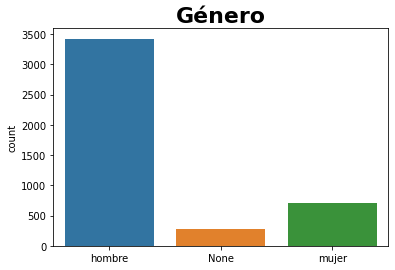

In [ ]:
fig, ax = plt.subplots()
sns.countplot(x="genero2", data=data)
ax.set_title('Género',fontsize = 22,fontweight = 'bold')
ax.set_xlabel(xlabel='')
plt.show()

## Análisis territorial

Revisamos la distribución de los sueldos por provincia

In [ ]:
zona=pd.DataFrame(data.groupby('Dónde estás trabajando')['salario2'].mean())
zona.rename(columns={'salario2':'media'},inplace=True)
zona['desvio']=data.groupby('Dónde estás trabajando')['salario2'].std()
zona.sort_values(by=['media'],inplace=True)
zona.reset_index(inplace=True)
zona.rename(columns={'Dónde estás trabajando':'nam'},inplace=True)
zona

nam          media         desvio
0                        Santa Cruz  245833.333333   84404.778696
1                          La Rioja  247233.846154   89028.895453
2                           Formosa  250000.000000            NaN
3                  Tierra del Fuego  261403.333333  145113.883209
4               Santiago del Estero  265142.857143  107355.218118
5                          San Luis  271779.615385   83692.929689
6                          Misiones  274150.911765  177748.798366
7                             Salta  291112.682927  225938.287140
8                             Chaco  295902.727273  228110.552512
9                         Catamarca  300000.000000            NaN
10                       Corrientes  300584.848485  286858.278691
11                          Tucumán  316092.225806  261428.339662
12                            Jujuy  318538.481481  231289.916705
13                          Neuquén  321060.722222  266262.211028
14                       Entre Ríos  337642.220000  310156.789736
15                         San Juan  343650.863636  377095.069031
16                         La Pampa  354176.571429  241047.352697
17                        Río Negro  357786.282051  330614.394451
18                          Córdoba  358846.254950  282552.267870
19        Provincia de Buenos Aires  363356.064045  288538.095636
20                         Santa Fe  374930.278169  316407.885380
21  Ciudad Autónoma de Buenos Aires  402237.000438  292619.746750
22                          Mendoza  405204.745902  397539.009067
23                           Chubut  418419.500000  317866.884605

Se observa semejanza en provincias cercanas, a excepción del sur que se encuentra en los extremos

In [ ]:
data['Dónde estás trabajando'].value_counts()

Ciudad Autónoma de Buenos Aires    2282
Provincia de Buenos Aires           890
Córdoba                             404
Santa Fe                            284
Mendoza                             122
Entre Ríos                           50
Chaco                                44
Salta                                41
Río Negro                            39
Neuquén                              36
Misiones                             34
Corrientes                           33
Tucumán                              31
Jujuy                                27
San Juan                             22
Chubut                               20
La Rioja                             13
San Luis                             13
Tierra del Fuego                      9
La Pampa                              7
Santiago del Estero                   7
Santa Cruz                            6
Formosa                               1
Catamarca                             1
Name: Dónde estás trabajando, dtype: int

Dada la poca cantidad de datos en el interior del país, vamos a grupar igualmente por región, independientemente de lo mencionado anteriormente.
Al no contar con una API con multipolygon de las provincias disponible, descargamos del IGN el csv de las provincias y lo importamos (el json está mal generado).

Fuente: https://www.ign.gob.ar/NuestrasActividades/InformacionGeoespacial/CapasSIG

In [ ]:
url='/content/gdrive/MyDrive/provincia.csv'
response = pd.read_csv(url,delimiter=',')
response

gid  entidad     objeto  \
0     1        0  Provincia   
1     2        0  Provincia   
2     3        0  Provincia   
3     4        0  Provincia   
4     5        0  Provincia   
5     6        0  Provincia   
6     7        0  Provincia   
7     8        0  Provincia   
8     9        0  Provincia   
9    10        0  Provincia   
10   11        0  Provincia   
11   12        0  Provincia   
12   13        0  Provincia   
13   14        0  Provincia   
14   15        0  Provincia   
15   16        0  Provincia   
16   17        0  Provincia   
17   18        0  Provincia   
18   19        0  Provincia   
19   20        0  Provincia   
20   21        0  Provincia   
21   22        0  Provincia   
22   23        0  Provincia   
23   24        0  Provincia   

                                                 geom  \
0   MULTIPOLYGON(((-58.3418873969999 -34.631096715...   
1   MULTIPOLYGON(((-68.2499999999999 -37.574784639...   
2   MULTIPOLYGON(((-66.661788297 -31.920536028,-66...   
3   MULTIPOLYGON(((-58.8808218779999 -28.066824880...   
4   MULTIPOLYGON(((-65.422985216 -30.119602485,-65...   
5   MULTIPOLYGON(((-66.099756973 -26.220485676,-66...   
6   MULTIPOLYGON(((-64.495322825 -26.2193658059999...   
7   MULTIPOLYGON(((-58.377351007 -26.872232293,-58...   
8   MULTIPOLYGON(((-58.377351007 -26.872232293,-58...   
9   MULTIPOLYGON(((-71.547089909 -45.999754002,-71...   
10  MULTIPOLYGON(((-70.990680431 -41.9999644609999...   
11  MULTIPOLYGON(((-67.317744892 -32.382029669,-67...   
12  MULTIPOLYGON(((-62.130602526 -30.4799276869999...   
13  MULTIPOLYGON(((-59.72663503 -33.60388621,-59.7...   
14  MULTIPOLYGON(((-69.6298101899999 -28.39369205,...   
15  MULTIPOLYGON(((-65.186566699 -22.085349688,-65...   
16  MULTIPOLYGON(((-61.711256374 -27.9994206489999...   
17  MULTIPOLYGON(((-68.2390987539999 -37.584960040...   
18  MULTIPOLYGON(((-57.970989286 -27.274986108,-57...   
19  MULTIPOLYGON(((-55.835114661 -27.4101326259999...   
20  MULTIPOLYGON(((-62.342299705 -22.4608400879999...   
21  MULTIPOLYGON(((-63.385750461 -35.0001346559999...   
22  MULTIPOLYGON(((-24.9999999999999 -75.876869648...   
23  MULTIPOLYGON(((-62.153392792 -40.45148468,-62....   

                                                  fna              gna  \
0                     Ciudad Autónoma de Buenos Aires  Ciudad Autónoma   
1                               Provincia del Neuquén        Provincia   
2                               Provincia de San Luis        Provincia   
3                               Provincia de Santa Fe        Provincia   
4                               Provincia de La Rioja        Provincia   
5                              Provincia de Catamarca        Provincia   
6                                Provincia de Tucumán        Provincia   
7                                 Provincia del Chaco        Provincia   
8                                Provincia de Formosa        Provincia   
9                             Provincia de Santa Cruz        Provincia   
10                               Provincia del Chubut        Provincia   
11                               Provincia de Mendoza        Provincia   
12                               Provincia de Córdoba        Provincia   
13                            Provincia de Entre Ríos        Provincia   
14                              Provincia de San Juan        Provincia   
15                                 Provincia de Jujuy        Provincia   
16                   Provincia de Santiago del Estero        Provincia   
17                             Provincia de Río Negro        Provincia   
18                            Provincia de Corrientes        Provincia   
19                              Provincia de Misiones        Provincia   
20                                 Provincia de Salta        Provincia   
21                              Provincia de La Pampa        Provincia   
22  Provincia de Tierra del Fuego, Antártida e Isl...        Provincia   
23                        

In [ ]:
response['geom']=response['geom'].astype('str')
lista_coordenadas=response['geom'].tolist()
coordenadas=[]

for item in lista_coordenadas:
  nueva=re.sub('MULTIPOLYGON','MULTIPOLYGON ',item)
  coordenadas.append(nueva)
response['coordenadas']=coordenadas
response

gid  entidad     objeto  \
0     1        0  Provincia   
1     2        0  Provincia   
2     3        0  Provincia   
3     4        0  Provincia   
4     5        0  Provincia   
5     6        0  Provincia   
6     7        0  Provincia   
7     8        0  Provincia   
8     9        0  Provincia   
9    10        0  Provincia   
10   11        0  Provincia   
11   12        0  Provincia   
12   13        0  Provincia   
13   14        0  Provincia   
14   15        0  Provincia   
15   16        0  Provincia   
16   17        0  Provincia   
17   18        0  Provincia   
18   19        0  Provincia   
19   20        0  Provincia   
20   21        0  Provincia   
21   22        0  Provincia   
22   23        0  Provincia   
23   24        0  Provincia   

                                                 geom  \
0   MULTIPOLYGON(((-58.3418873969999 -34.631096715...   
1   MULTIPOLYGON(((-68.2499999999999 -37.574784639...   
2   MULTIPOLYGON(((-66.661788297 -31.920536028,-66...   
3   MULTIPOLYGON(((-58.8808218779999 -28.066824880...   
4   MULTIPOLYGON(((-65.422985216 -30.119602485,-65...   
5   MULTIPOLYGON(((-66.099756973 -26.220485676,-66...   
6   MULTIPOLYGON(((-64.495322825 -26.2193658059999...   
7   MULTIPOLYGON(((-58.377351007 -26.872232293,-58...   
8   MULTIPOLYGON(((-58.377351007 -26.872232293,-58...   
9   MULTIPOLYGON(((-71.547089909 -45.999754002,-71...   
10  MULTIPOLYGON(((-70.990680431 -41.9999644609999...   
11  MULTIPOLYGON(((-67.317744892 -32.382029669,-67...   
12  MULTIPOLYGON(((-62.130602526 -30.4799276869999...   
13  MULTIPOLYGON(((-59.72663503 -33.60388621,-59.7...   
14  MULTIPOLYGON(((-69.6298101899999 -28.39369205,...   
15  MULTIPOLYGON(((-65.186566699 -22.085349688,-65...   
16  MULTIPOLYGON(((-61.711256374 -27.9994206489999...   
17  MULTIPOLYGON(((-68.2390987539999 -37.584960040...   
18  MULTIPOLYGON(((-57.970989286 -27.274986108,-57...   
19  MULTIPOLYGON(((-55.835114661 -27.4101326259999...   
20  MULTIPOLYGON(((-62.342299705 -22.4608400879999...   
21  MULTIPOLYGON(((-63.385750461 -35.0001346559999...   
22  MULTIPOLYGON(((-24.9999999999999 -75.876869648...   
23  MULTIPOLYGON(((-62.153392792 -40.45148468,-62....   

                                                  fna              gna  \
0                     Ciudad Autónoma de Buenos Aires  Ciudad Autónoma   
1                               Provincia del Neuquén        Provincia   
2                               Provincia de San Luis        Provincia   
3                               Provincia de Santa Fe        Provincia   
4                               Provincia de La Rioja        Provincia   
5                              Provincia de Catamarca        Provincia   
6                                Provincia de Tucumán        Provincia   
7                                 Provincia del Chaco        Provincia   
8                                Provincia de Formosa        Provincia   
9                             Provincia de Santa Cruz        Provincia   
10                               Provincia del Chubut        Provincia   
11                               Provincia de Mendoza        Provincia   
12                               Provincia de Córdoba        Provincia   
13                            Provincia de Entre Ríos        Provincia   
14                              Provincia de San Juan        Provincia   
15                                 Provincia de Jujuy        Provincia   
16                   Provincia de Santiago del Estero        Provincia   
17                             Provincia de Río Negro        Provincia   
18                            Provincia de Corrientes        Provincia   
19                              Provincia de Misiones        Provincia   
20                                 Provincia de Salta        Provincia   
21                              Provincia de La Pampa        Provincia   
22  Provincia de Tierra del Fuego, Antártida e Isl...        Provincia   
23                        

Eliminamos las columnas innecesarias

In [ ]:
response.drop(columns={'entidad','objeto','geom','fna','in1','fdc','gna','sag'},inplace=True)
response

gid                                                nam  \
0     1                    Ciudad Autónoma de Buenos Aires   
1     2                                            Neuquén   
2     3                                           San Luis   
3     4                                           Santa Fe   
4     5                                           La Rioja   
5     6                                          Catamarca   
6     7                                            Tucumán   
7     8                                              Chaco   
8     9                                            Formosa   
9    10                                         Santa Cruz   
10   11                                             Chubut   
11   12                                            Mendoza   
12   13                                            Córdoba   
13   14                                         Entre Ríos   
14   15                                           San Juan   
15   16                                              Jujuy   
16   17                                Santiago del Estero   
17   18                                          Río Negro   
18   19                                         Corrientes   
19   20                                           Misiones   
20   21                                              Salta   
21   22                                           La Pampa   
22   23  Tierra del Fuego, Antártida e Islas del Atlánt...   
23   24                                       Buenos Aires   

                                          coordenadas  
0   MULTIPOLYGON (((-58.3418873969999 -34.63109671...  
1   MULTIPOLYGON (((-68.2499999999999 -37.57478463...  
2   MULTIPOLYGON (((-66.661788297 -31.920536028,-6...  
3   MULTIPOLYGON (((-58.8808218779999 -28.06682488...  
4   MULTIPOLYGON (((-65.422985216 -30.119602485,-6...  
5   MULTIPOLYGON (((-66.099756973 -26.220485676,-6...  
6   MULTIPOLYGON (((-64.495322825 -26.219365805999...  
7   MULTIPOLYGON (((-58.377351007 -26.872232293,-5...  
8   MULTIPOLYGON (((-58.377351007 -26.872232293,-5...  
9   MULTIPOLYGON (((-71.547089909 -45.999754002,-7...  
10  MULTIPOLYGON (((-70.990680431 -41.999964460999...  
11  MULTIPOLYGON (((-67.317744892 -32.382029669,-6...  
12  MULTIPOLYGON (((-62.130602526 -30.479927686999...  
13  MULTIPOLYGON (((-59.72663503 -33.60388621,-59....  
14  MULTIPOLYGON (((-69.6298101899999 -28.39369205...  
15  MULTIPOLYGON (((-65.186566699 -22.085349688,-6...  
16  MULTIPOLYGON (((-61.711256374 -27.999420648999...  
17  MULTIPOLYGON (((-68.2390987539999 -37.58496004...  
18  MULTIPOLYGON (((-57.970989286 -27.274986108,-5...  
19  MULTIPOLYGON (((-55.835114661 -27.410132625999...  
20  MULTIPOLYGON (((-62.342299705 -22.460840087999...  
21  MULTIPOLYGON (((-63.385750461 -35.000134655999...  
22  MULTIPOLYGON (((-24.9999999999999 -75.87686964...  
23  MULTIPOLYGON (((-62.153392792 -40.45148468,-62...

Modificamos 'Tierra del fuego...' y 'Buenos Aires' para que coincida con la encuesta

In [ ]:
response['nam']=response['nam'].apply(lambda x: 'Tierra del Fuego' if x=='Tierra del Fuego, Antártida e Islas del Atlántico Sur' else x)
response['nam']=response['nam'].apply(lambda x: 'Provincia de Buenos Aires' if x=='Buenos Aires' else x)
response

gid                              nam  \
0     1  Ciudad Autónoma de Buenos Aires   
1     2                          Neuquén   
2     3                         San Luis   
3     4                         Santa Fe   
4     5                         La Rioja   
5     6                        Catamarca   
6     7                          Tucumán   
7     8                            Chaco   
8     9                          Formosa   
9    10                       Santa Cruz   
10   11                           Chubut   
11   12                          Mendoza   
12   13                          Córdoba   
13   14                       Entre Ríos   
14   15                         San Juan   
15   16                            Jujuy   
16   17              Santiago del Estero   
17   18                        Río Negro   
18   19                       Corrientes   
19   20                         Misiones   
20   21                            Salta   
21   22                         La Pampa   
22   23                 Tierra del Fuego   
23   24        Provincia de Buenos Aires   

                                          coordenadas  
0   MULTIPOLYGON (((-58.3418873969999 -34.63109671...  
1   MULTIPOLYGON (((-68.2499999999999 -37.57478463...  
2   MULTIPOLYGON (((-66.661788297 -31.920536028,-6...  
3   MULTIPOLYGON (((-58.8808218779999 -28.06682488...  
4   MULTIPOLYGON (((-65.422985216 -30.119602485,-6...  
5   MULTIPOLYGON (((-66.099756973 -26.220485676,-6...  
6   MULTIPOLYGON (((-64.495322825 -26.219365805999...  
7   MULTIPOLYGON (((-58.377351007 -26.872232293,-5...  
8   MULTIPOLYGON (((-58.377351007 -26.872232293,-5...  
9   MULTIPOLYGON (((-71.547089909 -45.999754002,-7...  
10  MULTIPOLYGON (((-70.990680431 -41.999964460999...  
11  MULTIPOLYGON (((-67.317744892 -32.382029669,-6...  
12  MULTIPOLYGON (((-62.130602526 -30.479927686999...  
13  MULTIPOLYGON (((-59.72663503 -33.60388621,-59....  
14  MULTIPOLYGON (((-69.6298101899999 -28.39369205...  
15  MULTIPOLYGON (((-65.186566699 -22.085349688,-6...  
16  MULTIPOLYGON (((-61.711256374 -27.999420648999...  
17  MULTIPOLYGON (((-68.2390987539999 -37.58496004...  
18  MULTIPOLYGON (((-57.970989286 -27.274986108,-5...  
19  MULTIPOLYGON (((-55.835114661 -27.410132625999...  
20  MULTIPOLYGON (((-62.342299705 -22.460840087999...  
21  MULTIPOLYGON (((-63.385750461 -35.000134655999...  
22  MULTIPOLYGON (((-24.9999999999999 -75.87686964...  
23  MULTIPOLYGON (((-62.153392792 -40.45148468,-62...

In [ ]:
from shapely.geometry import MultiPolygon
import shapely.wkt

In [ ]:
response['coordenadas'] = response['coordenadas'].apply(shapely.wkt.loads)

Agregamos los valores medios de salario

In [ ]:
response=pd.merge(response,zona,how='inner',on='nam')
response

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/printing.py:118: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/printing.p

gid                              nam  \
0     1  Ciudad Autónoma de Buenos Aires   
1     2                          Neuquén   
2     3                         San Luis   
3     4                         Santa Fe   
4     5                         La Rioja   
5     6                        Catamarca   
6     7                          Tucumán   
7     8                            Chaco   
8     9                          Formosa   
9    10                       Santa Cruz   
10   11                           Chubut   
11   12                          Mendoza   
12   13                          Córdoba   
13   14                       Entre Ríos   
14   15                         San Juan   
15   16                            Jujuy   
16   17              Santiago del Estero   
17   18                        Río Negro   
18   19                       Corrientes   
19   20                         Misiones   
20   21                            Salta   
21   22                         La Pampa   
22   23                 Tierra del Fuego   
23   24        Provincia de Buenos Aires   

                                          coordenadas          media  \
0   (POLYGON ((-58.3418873969999 -34.6310967159999...  402237.000438   
1   (POLYGON ((-68.2499999999999 -37.574784639, -6...  321060.722222   
2   (POLYGON ((-66.661788297 -31.920536028, -66.60...  271779.615385   
3   (POLYGON ((-58.8808218779999 -28.0668248809999...  374930.278169   
4   (POLYGON ((-65.422985216 -30.119602485, -65.49...  247233.846154   
5   (POLYGON ((-66.099756973 -26.220485676, -66.10...  300000.000000   
6   (POLYGON ((-64.495322825 -26.2193658059999, -6...  316092.225806   
7   (POLYGON ((-58.377351007 -26.872232293, -58.37...  295902.727273   
8   (POLYGON ((-58.377351007 -26.872232293, -58.37...  250000.000000   
9   (POLYGON ((-71.547089909 -45.999754002, -71.54...  245833.333333   
10  (POLYGON ((-70.990680431 -41.9999644609999, -7...  418419.500000   
11  (POLYGON ((-67.317744892 -32.382029669, -67.31...  405204.745902   
12  (POLYGON ((-62.130602526 -30.4799276869999, -6...  358846.254950   
13  (POLYGON ((-59.72663503 -33.60388621, -59.7282...  337642.220000   
14  (POLYGON ((-69.6298101899999 -28.39369205, -69...  343650.863636   
15  (POLYGON ((-65.186566699 -22.085349688, -65.18...  318538.481481   
16  (POLYGON ((-61.711256374 -27.9994206489999, -6...  265142.857143   
17  (POLYGON ((-68.2390987539999 -37.5849600409999...  357786.282051   
18  (POLYGON ((-57.970989286 -27.274986108, -57.96...  300584.848485   
19  (POLYGON ((-55.835114661 -27.4101326259999, -5...  274150.911765   
20  (POLYGON ((-62.342299705 -22.4608400879999, -6...  291112.682927   
21  (POLYGON ((-63.385750461 -35.0001346559999, -6...  354176.571429   
22  (POLYGON ((-24.9999999999999 -75.876869648, -2...  261403.333333   
23  (POLYGON ((-62.153392792 -40.45148468, -62.153...  363356.064045   

           desvio  
0   292619.746750  
1   266262.211028  
2    83692.929689  
3   316407.885380  
4    89028.895453  
5             NaN  
6   261428.339662  
7   228110.552512  
8             NaN  
9    84404.778696  
10  317866.884605  
11  397539.009067  
12  282552.267870  
13  310156.789736  
14  377095.069031  
15  231289.916705  
16  107355.218118  
17  330614.394451  
18  286858.278691  
19  177748.798366  
20  225938.287140  
21  241047.352697  
22  145113.883209  
23  288538.095636

In [ ]:
mapa=gpd.GeoDataFrame(response,geometry='coordenadas')
mapa

gid                              nam  \
0     1  Ciudad Autónoma de Buenos Aires   
1     2                          Neuquén   
2     3                         San Luis   
3     4                         Santa Fe   
4     5                         La Rioja   
5     6                        Catamarca   
6     7                          Tucumán   
7     8                            Chaco   
8     9                          Formosa   
9    10                       Santa Cruz   
10   11                           Chubut   
11   12                          Mendoza   
12   13                          Córdoba   
13   14                       Entre Ríos   
14   15                         San Juan   
15   16                            Jujuy   
16   17              Santiago del Estero   
17   18                        Río Negro   
18   19                       Corrientes   
19   20                         Misiones   
20   21                            Salta   
21   22                         La Pampa   
22   23                 Tierra del Fuego   
23   24        Provincia de Buenos Aires   

                                          coordenadas          media  \
0   MULTIPOLYGON (((-58.34189 -34.63110, -58.34240...  402237.000438   
1   MULTIPOLYGON (((-68.25000 -37.57478, -68.25000...  321060.722222   
2   MULTIPOLYGON (((-66.66179 -31.92054, -66.60454...  271779.615385   
3   MULTIPOLYGON (((-58.88082 -28.06682, -58.88360...  374930.278169   
4   MULTIPOLYGON (((-65.42299 -30.11960, -65.49056...  247233.846154   
5   MULTIPOLYGON (((-66.09976 -26.22049, -66.10088...  300000.000000   
6   MULTIPOLYGON (((-64.49532 -26.21937, -64.49723...  316092.225806   
7   MULTIPOLYGON (((-58.37735 -26.87223, -58.37764...  295902.727273   
8   MULTIPOLYGON (((-58.37735 -26.87223, -58.37935...  250000.000000   
9   MULTIPOLYGON (((-71.54709 -45.99975, -71.54573...  245833.333333   
10  MULTIPOLYGON (((-70.99068 -41.99996, -70.20898...  418419.500000   
11  MULTIPOLYGON (((-67.31774 -32.38203, -67.31763...  405204.745902   
12  MULTIPOLYGON (((-62.13060 -30.47993, -62.10369...  358846.254950   
13  MULTIPOLYGON (((-59.72664 -33.60389, -59.72830...  337642.220000   
14  MULTIPOLYGON (((-69.62981 -28.39369, -69.62956...  343650.863636   
15  MULTIPOLYGON (((-65.18657 -22.08535, -65.18670...  318538.481481   
16  MULTIPOLYGON (((-61.71126 -27.99942, -61.71135...  265142.857143   
17  MULTIPOLYGON (((-68.23910 -37.58496, -68.23829...  357786.282051   
18  MULTIPOLYGON (((-57.97099 -27.27499, -57.96509...  300584.848485   
19  MULTIPOLYGON (((-55.83511 -27.41013, -55.83220...  274150.911765   
20  MULTIPOLYGON (((-62.34230 -22.46084, -62.34230...  291112.682927   
21  MULTIPOLYGON (((-63.38575 -35.00013, -63.38597...  354176.571429   
22  MULTIPOLYGON (((-25.00000 -75.87687, -25.00000...  261403.333333   
23  MULTIPOLYGON (((-62.15339 -40.45148, -62.15339...  363356.064045   

           desvio  
0   292619.746750  
1   266262.211028  
2    83692.929689  
3   316407.885380  
4    89028.895453  
5             NaN  
6   261428.339662  
7   228110.552512  
8             NaN  
9    84404.778696  
10  317866.884605  
11  397539.009067  
12  282552.267870  
13  310156.789736  
14  377095.069031  
15  231289.916705  
16  107355.218118  
17  330614.394451  
18  286858.278691  
19  177748.798366  
20  225938.287140  
21  241047.352697  
22  145113.883209  
23  288538.095636

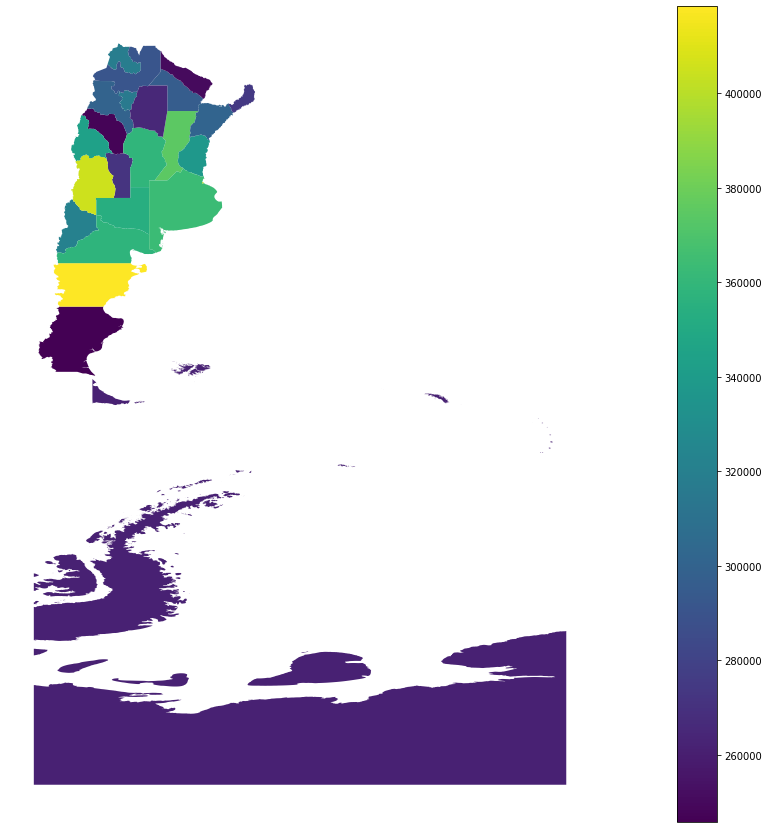

In [ ]:
f, ax = plt.subplots(1, figsize=(30, 15))
ax = mapa.plot(column='media',ax=ax,legend=True)
ax.axis('off')
plt.show()

Dada la similitud entre provincias de regiones cercanas, agrupamos de la siguiente manera

In [ ]:
regions_map = {
    'Ciudad Autónoma de Buenos Aires': 'AMBA',
    'GBA': 'AMBA',
    'Catamarca': 'NOA',
    'Chaco': 'NEA',
    'Chubut': 'Patagonia',
    'Corrientes': 'NEA',
    'Entre Ríos': 'NEA',
    'Formosa': 'NEA',
    'Jujuy': 'NOA',
    'La Pampa': 'Pampa',
    'La Rioja': 'NOA',
    'Mendoza': 'Cuyo',
    'Misiones': 'NEA',
    'Neuquén': 'Patagonia',
    'Río Negro': 'Patagonia',
    'Salta': 'NOA',
    'San Juan': 'Cuyo',
    'San Luis': 'Cuyo',
    'Santa Cruz': 'Patagonia',
    'Santa Fe': 'Pampa',
    'Santiago del Estero': 'NOA',
    'Tucumán': 'NOA',
    'Córdoba': 'Pampa',
    'Provincia de Buenos Aires': 'Pampa',
    'Tierra del Fuego': 'Patagonia',
}
data['region'] = data['Dónde estás trabajando'].apply(lambda x: regions_map[x])
data

Estoy trabajando en  Dónde estás trabajando Dedicación  \
0               Argentina              Catamarca  Full-Time   
1               Argentina                  Chaco  Full-Time   
2               Argentina                  Chaco  Full-Time   
3               Argentina                  Chaco  Full-Time   
4               Argentina                  Chaco  Full-Time   
...                   ...                    ...        ...   
5351            Argentina                Tucumán  Full-Time   
5352            Argentina                Tucumán  Full-Time   
5354            Argentina                Tucumán  Full-Time   
5355            Argentina                Tucumán  Full-Time   
5356            Argentina                Tucumán  Full-Time   

                                       Tipo de contrato  \
0                             Staff (planta permanente)   
1                         Remoto (empresa de otro país)   
2                             Staff (planta permanente)   
3                         Remoto (empresa de otro país)   
4                             Staff (planta permanente)   
...                                                 ...   
5351  Tercerizado (trabajo a través de consultora o ...   
5352                          Staff (planta permanente)   
5354                          Staff (planta permanente)   
5355                      Remoto (empresa de otro país)   
5356                          Staff (planta permanente)   

     Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                                300000            
1                                                900000            
2                                                120000            
3                                                440000            
4                                                140000            
...                                                 ...            
5351                                             110000            
5352                                             120000            
5354                                             150000            
5355                                             230000            
5356                                             450989            

     Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
0                            No                                        0   
1                            No                                        0   
2                     Un sueldo                                       20   
3                            No                                       54   
4                            No                                       15   
...                         ...                                      ...   
5351                         No                                      20%   
5352                         No                                        -   
5354         Menos de un sueldo                                       25   
5355                         No                                      10%   
5356                         No                                       75   

                              Con qué beneficios contas      Trabajo de  \
0     Abono de Internet, Clases de idiomas, Crédito ...         Infosec   
1     Capacitaciones y/o cursos, Clases de idiomas, ...       Developer   
2                                    Horarios flexibles       Developer   
3                             Ninguna de las anteriores       Developer   
4     Vacaciones flexibles (adicionales a las reglam...       Developer   
...                                                 ...             ...   
5351  Abono de Internet, Capacitaciones y/o cursos, ...   Data Engineer   
5352  Abono de Internet, Descuento en gimnasios / Cl...     QA / Tester   
5354  Capacitaciones y/o cursos, Descuento en gimnas...  Recruiter / HR   
5355  Abono de Internet, Capacitaciones y/o cursos, ...    

Generamos dummies por región

In [ ]:
regiones=pd.get_dummies(data['region'])
regiones.drop(columns='NEA',inplace=True)
regiones

AMBA  Cuyo  NOA  Pampa  Patagonia
0        0     0    1      0          0
1        0     0    0      0          0
2        0     0    0      0          0
3        0     0    0      0          0
4        0     0    0      0          0
...    ...   ...  ...    ...        ...
5351     0     0    1      0          0
5352     0     0    1      0          0
5354     0     0    1      0          0
5355     0     0    1      0          0
5356     0     0    1      0          0

[4416 rows x 5 columns]

In [ ]:
data=pd.concat([data,regiones],axis=1)
data

Estoy trabajando en  Dónde estás trabajando Dedicación  \
0               Argentina              Catamarca  Full-Time   
1               Argentina                  Chaco  Full-Time   
2               Argentina                  Chaco  Full-Time   
3               Argentina                  Chaco  Full-Time   
4               Argentina                  Chaco  Full-Time   
...                   ...                    ...        ...   
5351            Argentina                Tucumán  Full-Time   
5352            Argentina                Tucumán  Full-Time   
5354            Argentina                Tucumán  Full-Time   
5355            Argentina                Tucumán  Full-Time   
5356            Argentina                Tucumán  Full-Time   

                                       Tipo de contrato  \
0                             Staff (planta permanente)   
1                         Remoto (empresa de otro país)   
2                             Staff (planta permanente)   
3                         Remoto (empresa de otro país)   
4                             Staff (planta permanente)   
...                                                 ...   
5351  Tercerizado (trabajo a través de consultora o ...   
5352                          Staff (planta permanente)   
5354                          Staff (planta permanente)   
5355                      Remoto (empresa de otro país)   
5356                          Staff (planta permanente)   

     Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                                300000            
1                                                900000            
2                                                120000            
3                                                440000            
4                                                140000            
...                                                 ...            
5351                                             110000            
5352                                             120000            
5354                                             150000            
5355                                             230000            
5356                                             450989            

     Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
0                            No                                        0   
1                            No                                        0   
2                     Un sueldo                                       20   
3                            No                                       54   
4                            No                                       15   
...                         ...                                      ...   
5351                         No                                      20%   
5352                         No                                        -   
5354         Menos de un sueldo                                       25   
5355                         No                                      10%   
5356                         No                                       75   

                              Con qué beneficios contas      Trabajo de  \
0     Abono de Internet, Clases de idiomas, Crédito ...         Infosec   
1     Capacitaciones y/o cursos, Clases de idiomas, ...       Developer   
2                                    Horarios flexibles       Developer   
3                             Ninguna de las anteriores       Developer   
4     Vacaciones flexibles (adicionales a las reglam...       Developer   
...                                                 ...             ...   
5351  Abono de Internet, Capacitaciones y/o cursos, ...   Data Engineer   
5352  Abono de Internet, Descuento en gimnasios / Cl...     QA / Tester   
5354  Capacitaciones y/o cursos, Descuento en gimnas...  Recruiter / HR   
5355  Abono de Internet, Capacitaciones y/o cursos, ...    

## Columna "Trabaja de"

Se realiza una limpieza de esta columna centrándonos en las carreras de informática.

In [ ]:
#Renombro la columna a "funcion"
data.rename(columns={'Trabajo de':'funcion'}, inplace=True)

In [ ]:
data['funcion'].value_counts()

Developer                                                    1750
SysAdmin / DevOps / SRE                                       463
Technical Leader                                              308
QA / Tester                                                   230
Manager / Director                                            171
                                                             ... 
Lider IT                                                        1
SAP BASIS                                                       1
Analista Funcional / Gestion de la demanda / Scrum Master       1
Developer, HelpDesk, Networking, SysAdmin / DevOps / SRE        1
Profesor Adjunto Avanzado Full Stack Node js                    1
Name: funcion, Length: 277, dtype: int64

In [ ]:
#convierto la columna en lista para el bucle

lista_funcion = data['funcion'].to_list() #pasamos los datos de la columna genero a lista

In [ ]:
#Primero obtengo el dato de posición 
# Bucle columna funcion:

columna_nivel2 = []

for opcion in lista_funcion:

    if re.search('(manage.)', opcion, re.IGNORECASE) or re.search('(gerent.)', opcion, re.IGNORECASE)or re.search('(jef.)', opcion, re.IGNORECASE):
        columna_nivel2.append("manager")  # se guarda en float

    elif re.search('(analist.)', opcion, re.IGNORECASE) or re.search('(analys.)', opcion, re.IGNORECASE):
        columna_nivel2.append("analista")
   
    elif re.search('(consult.)', opcion, re.IGNORECASE) :
        columna_nivel2.append("consultor")

    elif re.search('(lea.)', opcion, re.IGNORECASE) or re.search('(lead.)', opcion, re.IGNORECASE) or re.search('(lide.)', opcion, re.IGNORECASE):
        columna_nivel2.append("lider")

    elif re.search('(train.)', opcion, re.IGNORECASE) :
        columna_nivel2.append("trainee")

    else:
        columna_nivel2.append('None')

data = data.assign(nivel=columna_nivel2)  # crea una nueva columna y pone los datos de la lista


In [ ]:
#Miro los resultados que obtengo

data['nivel'].value_counts()

None         3359
manager       397
lider         329
analista      248
consultor      82
trainee         1
Name: nivel, dtype: int64

In [ ]:
#Obtengo la función dentro de la empresa para carreras de informática

columna_fun = []

for opcion in lista_funcion:

    if re.search(r'(\bingernier).', opcion, re.IGNORECASE) or re.search(r'\bengineer\b', opcion, re.IGNORECASE): #revisar/dicutir si esta bien esta categoría 
        columna_fun.append("Ingeniero")

    elif re.search(r'\bfuncional\b', opcion, re.IGNORECASE) :
        columna_fun.append("Analista Funcional")
    
    elif re.search(r'\bux\b', opcion, re.IGNORECASE) : 
        columna_fun.append("UX")

    elif re.search(r'(\bdev).', opcion, re.IGNORECASE) or re.search(r'\bdeveloper\b', opcion, re.IGNORECASE)or re.search(r'\bstack\b', opcion, re.IGNORECASE):
        columna_fun.append("Developer") 

    elif re.search(r'\bScientist\b', opcion, re.IGNORECASE):
        columna_fun.append("Data Scientist")
    
    elif re.search(r'\bbi\b', opcion, re.IGNORECASE): 
        columna_fun.append("BI")

    elif re.search(r'\bdata\b', opcion, re.IGNORECASE) and re.search(r'(\banaly).', opcion, re.IGNORECASE): 
        columna_fun.append("BI")
    
    elif re.search(r'(\bcybersecuri.)', opcion, re.IGNORECASE) or re.search(r'\bseguridad\b', opcion, re.IGNORECASE) or re.search(r'\bsecurity\b', opcion, re.IGNORECASE):
        columna_fun.append("Seguridad Infomatica")

    elif re.search(r'\bcloud\b', opcion, re.IGNORECASE) :  
        columna_fun.append("Cloud")

    elif re.search('(produc.)', opcion, re.IGNORECASE) :
        columna_fun.append("Product")

    elif re.search(r'(\binfraestruct).', opcion, re.IGNORECASE) or re.search(r'(\binfrastruct).', opcion, re.IGNORECASE) or re.search(r'\binfra\b', opcion, re.IGNORECASE):
        columna_fun.append("Infraestructura")

    elif re.search(r'\btester\b', opcion, re.IGNORECASE) or re.search(r'\bQA\b', opcion, re.IGNORECASE):
        columna_fun.append("QA/Tester")

    elif re.search('(supp.)', opcion, re.IGNORECASE) or re.search('(sopor.)', opcion, re.IGNORECASE):
        columna_fun.append("Soporte")
    
    elif re.search(r'\bhr\b', opcion, re.IGNORECASE) or re.search(r'\bpeople\b', opcion, re.IGNORECASE) or re.search(r'(\brecrui.)', opcion, re.IGNORECASE) or re.search(r'(\btalen.)', opcion, re.IGNORECASE) or re.search(r'\bcapacitador\b', opcion, re.IGNORECASE):
        columna_fun.append("HR")

    else:
        columna_fun.append(None)

data = data.assign(funcion_res=columna_fun)  # crea una nueva columna y pone los datos de la lista

In [ ]:
#Miro los resultados

data['funcion_res'].value_counts()


Developer               2233
QA/Tester                235
Ingeniero                132
BI                       132
UX                        94
Data Scientist            84
Product                   74
HR                        54
Soporte                   22
Analista Funcional        13
Seguridad Infomatica      10
Infraestructura            7
Cloud                      4
Name: funcion_res, dtype: int64

In [ ]:
data=data[data['funcion_res']!="None"]

**Convertimos los cada valor en una variable dummy en un nuevo DataFrame para y realizamos un análisis gráficos de los trabajos más frecuentes**

In [ ]:
data['funcion_res']=data['funcion_res'].astype('str')
lista_trabajo = data['funcion_res']
lista_trabajo=lista_trabajo.tolist()
lista6=[]
for trabajo in lista_trabajo:
    cosa=re.split(',|/|-| y ',trabajo)
    
    for item in  cosa:
        lista6.append(re.sub(r'^\s+|\s+$' , '' , item))

lista6=set(lista6)
lista6

{'Analista Funcional',
 'BI',
 'Cloud',
 'Data Scientist',
 'Developer',
 'HR',
 'Infraestructura',
 'Ingeniero',
 'None',
 'Product',
 'QA',
 'Seguridad Infomatica',
 'Soporte',
 'Tester',
 'UX'}

In [ ]:
lista7=pd.DataFrame(columns=lista6)
lista7

Empty DataFrame
Columns: [Tester, Infraestructura, HR, Seguridad Infomatica, Analista Funcional, Developer, None, UX, Data Scientist, Soporte, QA, Ingeniero, BI, Product, Cloud]
Index: []

In [ ]:
for trabajo in lista7:
    trabajo2=[]
    
    for item in lista_trabajo:
        
        if re.search(re.escape(trabajo), item, re.IGNORECASE):
            trabajo2.append(1)
        else:
            trabajo2.append(0)
    lista7[trabajo]=trabajo2
lista7

Tester  Infraestructura  HR  Seguridad Infomatica  Analista Funcional  \
0          0                0   0                     0                   0   
1          0                0   0                     0                   0   
2          0                0   0                     0                   0   
3          0                0   0                     0                   0   
4          0                0   0                     0                   0   
...      ...              ...  ..                   ...                 ...   
4411       0                0   0                     0                   0   
4412       1                0   0                     0                   0   
4413       0                0   1                     0                   0   
4414       1                0   0                     0                   0   
4415       1                0   0                     0                   0   

      Developer  None  UX  Data Scientist  Soporte  QA  Ingeniero  BI  \
0             0     1   0               0        0   0          0   0   
1             1     0   0               0        0   0          0   0   
2             1     0   0               0        0   0          0   0   
3             1     0   0               0        0   0          0   0   
4             1     0   0               0        0   0          0   0   
...         ...   ...  ..             ...      ...  ..        ...  ..   
4411          0     0   0               0        0   0          1   0   
4412          0     0   0               0        0   1          0   0   
4413          0     0   0               0        0   0          0   0   
4414          0     0   0               0        0   1          0   0   
4415          0     0   0               0        0   1          0   0   

      Product  Cloud  
0           0      0  
1           0      0  
2           0      0  
3           0      0  
4           0      0  
...       ...    ...  
4411        0      0  
4412        0      0  
4413        0      0  
4414        0      0  
4415        0      0  

[4416 rows x 15 columns]

### Gráfico de trabajos más frecuentes

<BarContainer object of 15 artists>

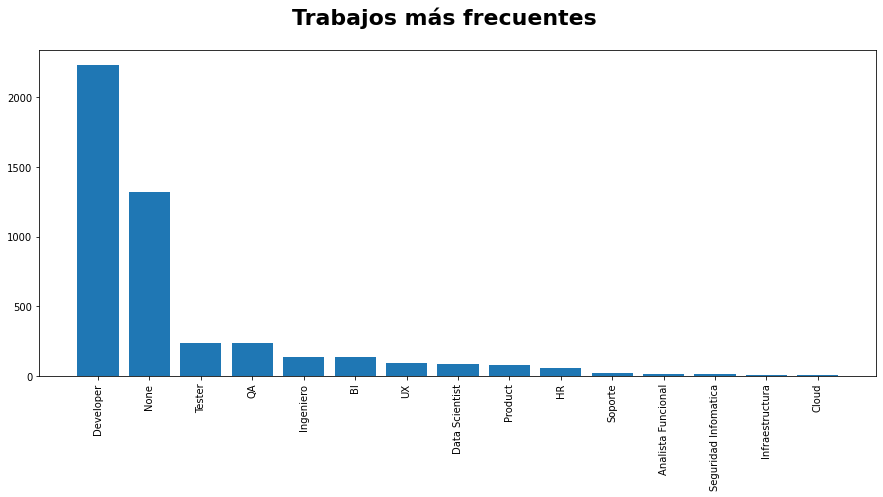

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

fig.suptitle("Trabajos más frecuentes",fontsize = 22,fontweight = 'bold')
mas_usados=pd.DataFrame(index=lista7.columns,data=lista7.sum())
mas_usados=mas_usados.rename(columns={0:'Total'})
mas_usados.sort_values('Total',ascending=False,inplace=True)
plt.xticks(rotation=90)
ax.bar(x=mas_usados.index,height=mas_usados.Total)

In [ ]:
#lista7['ID'] = np.arange(len(data))
lista7.loc['Total']=lista7.sum()
lista7

Tester  Infraestructura  HR  Seguridad Infomatica  Analista Funcional  \
0           0                0   0                     0                   0   
1           0                0   0                     0                   0   
2           0                0   0                     0                   0   
3           0                0   0                     0                   0   
4           0                0   0                     0                   0   
...       ...              ...  ..                   ...                 ...   
4412        1                0   0                     0                   0   
4413        0                0   1                     0                   0   
4414        1                0   0                     0                   0   
4415        1                0   0                     0                   0   
Total     235                7  54                    10                  13   

       Developer  None  UX  Data Scientist  Soporte   QA  Ingeniero   BI  \
0              0     1   0               0        0    0          0    0   
1              1     0   0               0        0    0          0    0   
2              1     0   0               0        0    0          0    0   
3              1     0   0               0        0    0          0    0   
4              1     0   0               0        0    0          0    0   
...          ...   ...  ..             ...      ...  ...        ...  ...   
4412           0     0   0               0        0    1          0    0   
4413           0     0   0               0        0    0          0    0   
4414           0     0   0               0        0    1          0    0   
4415           0     0   0               0        0    1          0    0   
Total       2233  1322  94              84       22  235        132  132   

       Product  Cloud  
0            0      0  
1            0      0  
2            0      0  
3            0      0  
4            0      0  
...        ...    ...  
4412         0      0  
4413         0      0  
4414         0      0  
4415         0      0  
Total       74      4  

[4417 rows x 15 columns]

Eliminamos aquellas columnas con menos de 100 registros

In [ ]:
borrar=lista7.columns[lista7.loc['Total']<100]
borrar

Index(['Infraestructura', 'HR', 'Seguridad Infomatica', 'Analista Funcional',
       'UX', 'Data Scientist', 'Soporte', 'Product', 'Cloud'],
      dtype='object')

In [ ]:
lista7.drop(columns=borrar,inplace=True)
lista7

Tester  Developer  None   QA  Ingeniero   BI
0           0          0     1    0          0    0
1           0          1     0    0          0    0
2           0          1     0    0          0    0
3           0          1     0    0          0    0
4           0          1     0    0          0    0
...       ...        ...   ...  ...        ...  ...
4412        1          0     0    1          0    0
4413        0          0     0    0          0    0
4414        1          0     0    1          0    0
4415        1          0     0    1          0    0
Total     235       2233  1322  235        132  132

[4417 rows x 6 columns]

Eliminamos la última fila y concatenamos

In [ ]:
lista7.drop(lista7.tail(1).index, 
        inplace = True)
lista7

Tester  Developer  None  QA  Ingeniero  BI
0          0          0     1   0          0   0
1          0          1     0   0          0   0
2          0          1     0   0          0   0
3          0          1     0   0          0   0
4          0          1     0   0          0   0
...      ...        ...   ...  ..        ...  ..
4411       0          0     0   0          1   0
4412       1          0     0   1          0   0
4413       0          0     0   0          0   0
4414       1          0     0   1          0   0
4415       1          0     0   1          0   0

[4416 rows x 6 columns]

In [ ]:
data.columns

Index(['Estoy trabajando en ', 'Dónde estás trabajando', 'Dedicación',
       'Tipo de contrato',
       'Último salario mensual  o retiro BRUTO (en tu moneda local)',
       'Recibís algún tipo de bono',
       '¿De qué % fue el ajuste total acumulado?', 'Con qué beneficios contas',
       'funcion', 'Años de experiencia', 'Antigüedad en la empresa actual',
       'Tiempo en el puesto actual', '¿Cuántas personas a cargo tenés? ',
       'Plataformas que utilizas en tu puesto actual ',
       'Lenguajes de programación o tecnologías que utilices en tu puesto actual',
       'Frameworks, herramientas y librerías que utilices en tu puesto actual',
       'Bases de datos', 'QA / Testing',
       'Cantidad de personas en tu organización', 'Modalidad de trabajo',
       'Si trabajas bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina? ',
       '¿La recomendás como un buen lugar para trabajar?',
       'Máximo nivel de estudios', 'Estado', 'Carrera', 'Universidad ',
       '¿

Creamos columna 'ID' para hacer merge con lista7

In [ ]:
#data=pd.concat([data,lista7],axis=1)
data['ID']=np.arange(len(data))
data

Estoy trabajando en  Dónde estás trabajando Dedicación  \
0               Argentina              Catamarca  Full-Time   
1               Argentina                  Chaco  Full-Time   
2               Argentina                  Chaco  Full-Time   
3               Argentina                  Chaco  Full-Time   
4               Argentina                  Chaco  Full-Time   
...                   ...                    ...        ...   
5351            Argentina                Tucumán  Full-Time   
5352            Argentina                Tucumán  Full-Time   
5354            Argentina                Tucumán  Full-Time   
5355            Argentina                Tucumán  Full-Time   
5356            Argentina                Tucumán  Full-Time   

                                       Tipo de contrato  \
0                             Staff (planta permanente)   
1                         Remoto (empresa de otro país)   
2                             Staff (planta permanente)   
3                         Remoto (empresa de otro país)   
4                             Staff (planta permanente)   
...                                                 ...   
5351  Tercerizado (trabajo a través de consultora o ...   
5352                          Staff (planta permanente)   
5354                          Staff (planta permanente)   
5355                      Remoto (empresa de otro país)   
5356                          Staff (planta permanente)   

     Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                                300000            
1                                                900000            
2                                                120000            
3                                                440000            
4                                                140000            
...                                                 ...            
5351                                             110000            
5352                                             120000            
5354                                             150000            
5355                                             230000            
5356                                             450989            

     Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
0                            No                                        0   
1                            No                                        0   
2                     Un sueldo                                       20   
3                            No                                       54   
4                            No                                       15   
...                         ...                                      ...   
5351                         No                                      20%   
5352                         No                                        -   
5354         Menos de un sueldo                                       25   
5355                         No                                      10%   
5356                         No                                       75   

                              Con qué beneficios contas         funcion  \
0     Abono de Internet, Clases de idiomas, Crédito ...         Infosec   
1     Capacitaciones y/o cursos, Clases de idiomas, ...       Developer   
2                                    Horarios flexibles       Developer   
3                             Ninguna de las anteriores       Developer   
4     Vacaciones flexibles (adicionales a las reglam...       Developer   
...                                                 ...             ...   
5351  Abono de Internet, Capacitaciones y/o cursos, ...   Data Engineer   
5352  Abono de Internet, Descuento en gimnasios / Cl...     QA / Tester   
5354  Capacitaciones y/o cursos, Descuento en gimnas...  Recruiter / HR   
5355  Abono de Internet, Capacitaciones y/o cursos, ...    

In [ ]:
lista7['ID']=np.arange(len(lista7))
lista7

Tester  Developer  None  QA  Ingeniero  BI    ID
0          0          0     1   0          0   0     0
1          0          1     0   0          0   0     1
2          0          1     0   0          0   0     2
3          0          1     0   0          0   0     3
4          0          1     0   0          0   0     4
...      ...        ...   ...  ..        ...  ..   ...
4411       0          0     0   0          1   0  4411
4412       1          0     0   1          0   0  4412
4413       0          0     0   0          0   0  4413
4414       1          0     0   1          0   0  4414
4415       1          0     0   1          0   0  4415

[4416 rows x 7 columns]

In [ ]:
data=pd.merge(data,lista7,on='ID')
data

Estoy trabajando en  Dónde estás trabajando Dedicación  \
0               Argentina              Catamarca  Full-Time   
1               Argentina                  Chaco  Full-Time   
2               Argentina                  Chaco  Full-Time   
3               Argentina                  Chaco  Full-Time   
4               Argentina                  Chaco  Full-Time   
...                   ...                    ...        ...   
4411            Argentina                Tucumán  Full-Time   
4412            Argentina                Tucumán  Full-Time   
4413            Argentina                Tucumán  Full-Time   
4414            Argentina                Tucumán  Full-Time   
4415            Argentina                Tucumán  Full-Time   

                                       Tipo de contrato  \
0                             Staff (planta permanente)   
1                         Remoto (empresa de otro país)   
2                             Staff (planta permanente)   
3                         Remoto (empresa de otro país)   
4                             Staff (planta permanente)   
...                                                 ...   
4411  Tercerizado (trabajo a través de consultora o ...   
4412                          Staff (planta permanente)   
4413                          Staff (planta permanente)   
4414                      Remoto (empresa de otro país)   
4415                          Staff (planta permanente)   

     Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                                300000            
1                                                900000            
2                                                120000            
3                                                440000            
4                                                140000            
...                                                 ...            
4411                                             110000            
4412                                             120000            
4413                                             150000            
4414                                             230000            
4415                                             450989            

     Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
0                            No                                        0   
1                            No                                        0   
2                     Un sueldo                                       20   
3                            No                                       54   
4                            No                                       15   
...                         ...                                      ...   
4411                         No                                      20%   
4412                         No                                        -   
4413         Menos de un sueldo                                       25   
4414                         No                                      10%   
4415                         No                                       75   

                              Con qué beneficios contas         funcion  \
0     Abono de Internet, Clases de idiomas, Crédito ...         Infosec   
1     Capacitaciones y/o cursos, Clases de idiomas, ...       Developer   
2                                    Horarios flexibles       Developer   
3                             Ninguna de las anteriores       Developer   
4     Vacaciones flexibles (adicionales a las reglam...       Developer   
...                                                 ...             ...   
4411  Abono de Internet, Capacitaciones y/o cursos, ...   Data Engineer   
4412  Abono de Internet, Descuento en gimnasios / Cl...     QA / Tester   
4413  Capacitaciones y/o cursos, Descuento en gimnas...  Recruiter / HR   
4414  Abono de Internet, Capacitaciones y/o cursos, ...    

## Columna Lenguajes de programación

**Vamos a extraer los lenguajes más utilizados**

In [ ]:
data['Lenguajes de programación o tecnologías que utilices en tu puesto actual'].value_counts()

Ninguno de los anteriores                                         692
SQL                                                               175
Python                                                            150
Python, SQL                                                       126
CSS, HTML, Javascript, TypeScript                                 101
                                                                 ... 
Bash/Shell, Groovy, Javascript, Kotlin                              1
ABAP, Java, SQL                                                     1
Bash/Shell, C++, Go, HTML, Java, Javascript, Python, Ruby, SQL      1
.NET, Bash/Shell, HTML, Java, SQL                                   1
.NET, C#, Java, Javascript                                          1
Name: Lenguajes de programación o tecnologías que utilices en tu puesto actual, Length: 1149, dtype: int64

Necesitamos hacer una limpieza de los valores que se repiten entre registros, y luego revisar aquellos que haga falta eliminar

In [ ]:
lista_lenguaje = data['Lenguajes de programación o tecnologías que utilices en tu puesto actual'].astype('str')
lista_lenguaje=lista_lenguaje.tolist()   #pasamos los datos de la columna genero a lista
lista2=[]
for lenguaje in lista_lenguaje:
    cosa=re.split(',|/|-| y ',lenguaje)
    
    for item in  cosa:
        lista2.append(re.sub(r'^\s+|\s+$' , '' , item))

lista2=set(lista2)
lista2

{'.',
 '.NET',
 '1',
 'ABAP',
 'ABL',
 'AL',
 'ASP Clasico',
 'Adabas',
 'Airflow',
 'Ansible',
 'Apache Camel',
 'Apex',
 'Apex Salesforce',
 'Arduino',
 'Assembler',
 'Aura',
 'Automation anywhere',
 'Azure CLI',
 'BODS',
 'Bash',
 'C',
 'C#',
 'C++',
 'CLIPPER',
 'CMD',
 'COBOL',
 'CSS',
 'Ciberseguridad',
 'Clojure',
 'Cypher',
 'DAX',
 'DBT',
 'Dart',
 'Dataweave',
 'Delphi',
 'Elixir',
 'Erlang',
 'FBD',
 'GENEXUS',
 'GeneXus',
 'Genexus',
 'Gestiono usando mails',
 'Go',
 'Google Query',
 'Gosu',
 'GraphQL',
 'Groovy',
 'HTML',
 'HTML NO ES LENGUAJE',
 'Haskell & Elm',
 'ILE RPG',
 'INFOR LN',
 'JSON',
 'JSP',
 'Java',
 'Javascript',
 'Jbase',
 'Julia',
 'KNIME',
 'Kotlin',
 'LESS',
 'LWC',
 'Ladder',
 'Lua',
 'M',
 'Matlab',
 'Meta4 LN4',
 'MongoDB',
 'Multitecnología',
 'Natural',
 'Natural Adabas',
 'Ninguno de los anteriores',
 'No sé',
 'No uso',
 'No utilizo',
 'Objective',
 'PGSQL',
 'PHP',
 'PL',
 'PL SQL',
 'PLSQL',
 'Perl',
 'Power FX',
 'Power Platform',
 'PowerScript

Construimos un dataframe con los lenguajes y luego revisamos quién programa en cada uno con dummies

In [ ]:
lista3=pd.DataFrame(columns=lista2)
lista3

Empty DataFrame
Columns: [Groovy, UiPath, Xaml, Clojure, RPG FULL FREE, CSS, No sé, Vb6 asp oracle, Scala, PLSQL, Terraform, Gestiono usando mails, Apex Salesforce, Rust, SOQL, powershell si es que se puede decir lenguaje, GeneXus, argocd, DBT, AL, HTML NO ES LENGUAJE, Automation anywhere, React, BODS, Natural Adabas, Svelte, Ladder, ABL, Delphi, Dart, PGSQL, Qlik Sense, excel :), C#, ILE RPG, Apache Camel, ansible, JSON, COBOL, TypeScript, Arduino, Swift, natural, Azure CLI, Erlang, Visual Foxpro, INFOR LN, Matlab, Snaplogic, Ruby, SAS, Go, Qlik, sql, PL SQL, VTEX.IO, VB.NET, PowerShell, GraphQL, Gosu, Natural, VB6, Meta4 LN4, mikrotik, shell script, .NET, ASP Clasico, SQL, Kotlin, ABAP, Ciberseguridad, j, Power Platform, jcl, SQL Server Integration Services, Cypher, Teams, Perl, Powershell, ., Javascript, Power FX, 1, RPA, GENEXUS, UX, KNIME, Shell, Powerbuilder, Qlik Sense scripting language, Bash, MongoDB, ST, powershell, Pyspark, jinjaw, excel, kusto, jenkings, RPA:Automation Anywhere, ...]
Index: []

[0 rows x 177 columns]

In [ ]:
for lenguaje in lista2:
    lenguaje2=[]
    
    for item in lista_lenguaje:
        
        if re.search(re.escape(lenguaje), item, re.IGNORECASE):
            lenguaje2.append(1)
        else:
            lenguaje2.append(0)
    lista3[lenguaje]=lenguaje2
lista3

Groovy  UiPath  Xaml  Clojure  RPG FULL FREE  CSS  No sé  \
0          0       0     0        0              0    0      0   
1          0       0     0        0              0    1      0   
2          0       0     0        0              0    0      0   
3          0       0     0        0              0    0      0   
4          0       0     0        0              0    1      0   
...      ...     ...   ...      ...            ...  ...    ...   
4411       0       0     0        0              0    0      0   
4412       0       0     0        0              0    0      0   
4413       0       0     0        0              0    0      0   
4414       0       0     0        0              0    0      0   
4415       0       0     0        0              0    0      0   

      Vb6 asp oracle  Scala  PLSQL  ...  Multitecnología  Airflow  \
0                  0      0      0  ...                0        0   
1                  0      0      0  ...                0        0   
2                  0      0      0  ...                0        0   
3                  0      0      0  ...                0        0   
4                  0      0      0  ...                0        0   
...              ...    ...    ...  ...              ...      ...   
4411               0      0      0  ...                0        0   
4412               0      0      0  ...                0        0   
4413               0      0      0  ...                0        0   
4414               0      0      0  ...                0        0   
4415               0      0      0  ...                0        0   

      Visual FoxPro  C++  FBD  soy tecnico  terraform  Yaml  PowerScript  \
0                 0    0    0            0          0     0            0   
1                 0    0    0            0          0     0            0   
2                 0    0    0            0          0     0            0   
3                 0    0    0            0          0     0            0   
4                 0    0    0            0          0     0            0   
...             ...  ...  ...          ...        ...   ...          ...   
4411              0    0    0            0          0     0            0   
4412              0    0    0            0          0     0            0   
4413              0    0    0            0          0     0            0   
4414              0    0    0            0          0     0            0   
4415              0    0    0            0          0     0            0   

      Visual Basic 6  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
4411               0  
4412               0  
4413               0  
4414               0  
4415               0  

[4416 rows x 177 columns]

### Creación columna cantidad de lenguajes

Vamos a crear una columna que sume la cantidad de lenguajes que programe la persona para ver si influye
Primero eliminamos las columnas erróneas: vacías, que dicen 'ninguno'

<BarContainer object of 24 artists>

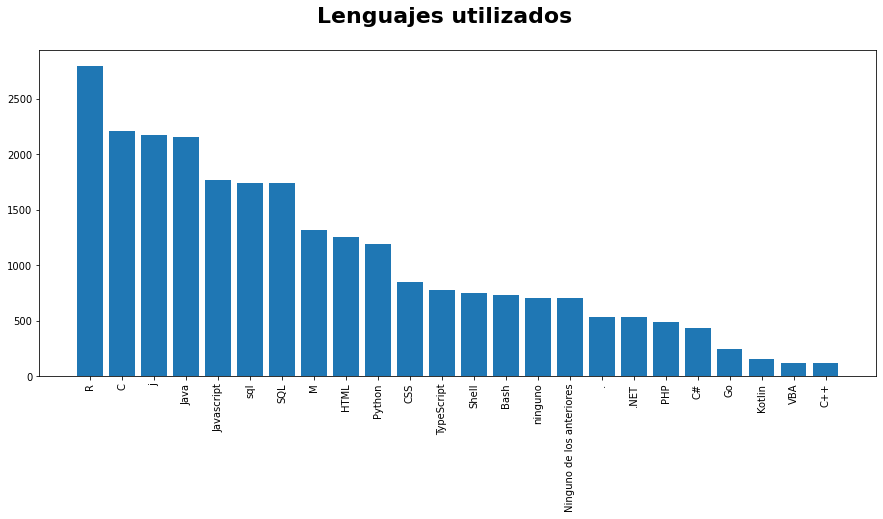

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

fig.suptitle("Lenguajes utilizados",fontsize = 22,fontweight = 'bold')
mas_usados=pd.DataFrame(index=lista3.columns,data=lista3.sum())
mas_usados=mas_usados.rename(columns={0:'Total'})
mas_usados.sort_values('Total',ascending=False,inplace=True)
plt.xticks(rotation=90)
ax.bar(x=mas_usados[mas_usados['Total']>100].index,height=mas_usados[mas_usados['Total']>100].Total)

In [ ]:
lista3.drop(columns={'j','ninguno','Ninguno de los anteriores','.','M'},inplace=True)
lista3

Groovy  UiPath  Xaml  Clojure  RPG FULL FREE  CSS  No sé  \
0          0       0     0        0              0    0      0   
1          0       0     0        0              0    1      0   
2          0       0     0        0              0    0      0   
3          0       0     0        0              0    0      0   
4          0       0     0        0              0    1      0   
...      ...     ...   ...      ...            ...  ...    ...   
4411       0       0     0        0              0    0      0   
4412       0       0     0        0              0    0      0   
4413       0       0     0        0              0    0      0   
4414       0       0     0        0              0    0      0   
4415       0       0     0        0              0    0      0   

      Vb6 asp oracle  Scala  PLSQL  ...  Multitecnología  Airflow  \
0                  0      0      0  ...                0        0   
1                  0      0      0  ...                0        0   
2                  0      0      0  ...                0        0   
3                  0      0      0  ...                0        0   
4                  0      0      0  ...                0        0   
...              ...    ...    ...  ...              ...      ...   
4411               0      0      0  ...                0        0   
4412               0      0      0  ...                0        0   
4413               0      0      0  ...                0        0   
4414               0      0      0  ...                0        0   
4415               0      0      0  ...                0        0   

      Visual FoxPro  C++  FBD  soy tecnico  terraform  Yaml  PowerScript  \
0                 0    0    0            0          0     0            0   
1                 0    0    0            0          0     0            0   
2                 0    0    0            0          0     0            0   
3                 0    0    0            0          0     0            0   
4                 0    0    0            0          0     0            0   
...             ...  ...  ...          ...        ...   ...          ...   
4411              0    0    0            0          0     0            0   
4412              0    0    0            0          0     0            0   
4413              0    0    0            0          0     0            0   
4414              0    0    0            0          0     0            0   
4415              0    0    0            0          0     0            0   

      Visual Basic 6  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
4411               0  
4412               0  
4413               0  
4414               0  
4415               0  

[4416 rows x 172 columns]

In [ ]:
lista3['Cantidad_lenguajes']=lista3.sum(axis=1)
lista3.loc['Total']=lista3.sum()
lista3

Groovy  UiPath  Xaml  Clojure  RPG FULL FREE  CSS  No sé  \
0           0       0     0        0              0    0      0   
1           0       0     0        0              0    1      0   
2           0       0     0        0              0    0      0   
3           0       0     0        0              0    0      0   
4           0       0     0        0              0    1      0   
...       ...     ...   ...      ...            ...  ...    ...   
4412        0       0     0        0              0    0      0   
4413        0       0     0        0              0    0      0   
4414        0       0     0        0              0    0      0   
4415        0       0     0        0              0    0      0   
Total      91       1     1        2              1  846      1   

       Vb6 asp oracle  Scala  PLSQL  ...  Airflow  Visual FoxPro  C++  FBD  \
0                   0      0      0  ...        0              0    0    0   
1                   0      0      0  ...        0              0    0    0   
2                   0      0      0  ...        0              0    0    0   
3                   0      0      0  ...        0              0    0    0   
4                   0      0      0  ...        0              0    0    0   
...               ...    ...    ...  ...      ...            ...  ...  ...   
4412                0      0      0  ...        0              0    0    0   
4413                0      0      0  ...        0              0    0    0   
4414                0      0      0  ...        0              0    0    0   
4415                0      0      0  ...        0              0    0    0   
Total               1     51      3  ...        1              2  115    1   

       soy tecnico  terraform  Yaml  PowerScript  Visual Basic 6  \
0                0          0     0            0               0   
1                0          0     0            0               0   
2                0          0     0            0               0   
3                0          0     0            0               0   
4                0          0     0            0               0   
...            ...        ...   ...          ...             ...   
4412             0          0     0            0               0   
4413             0          0     0            0               0   
4414             0          0     0            0               0   
4415             0          0     0            0               0   
Total            1          7     5            2               2   

       Cantidad_lenguajes  
0                       1  
1                       9  
2                       6  
3                       5  
4                       6  
...                   ...  
4412                    2  
4413                    1  
4414                    3  
4415                    6  
Total               21161  

[4417 rows x 173 columns]

Eliminamos las columnas que tienen menos de 1000 registros

In [ ]:
borrar=lista3.columns[lista3.loc['Total']<1000]
borrar

Index(['Groovy', 'UiPath', 'Xaml', 'Clojure', 'RPG FULL FREE', 'CSS', 'No sé',
       'Vb6 asp oracle', 'Scala', 'PLSQL',
       ...
       'Multitecnología', 'Airflow', 'Visual FoxPro', 'C++', 'FBD',
       'soy tecnico', 'terraform', 'Yaml', 'PowerScript', 'Visual Basic 6'],
      dtype='object', length=164)

In [ ]:
lista3.drop(columns=borrar,inplace=True)
lista3

sql   SQL  Javascript  Python     R  HTML     C  Java  \
0         0     0           0       1     0     0     0     0   
1         1     1           1       0     1     1     1     1   
2         0     0           1       1     1     0     1     1   
3         0     0           1       0     1     0     1     1   
4         0     0           1       0     1     1     1     1   
...     ...   ...         ...     ...   ...   ...   ...   ...   
4412      1     1           0       0     0     0     0     0   
4413      0     0           0       0     1     0     0     0   
4414      1     1           0       0     0     1     0     0   
4415      1     1           1       0     1     0     1     1   
Total  1742  1742        1767    1191  2798  1251  2209  2151   

       Cantidad_lenguajes  
0                       1  
1                       9  
2                       6  
3                       5  
4                       6  
...                   ...  
4412                    2  
4413                    1  
4414                    3  
4415                    6  
Total               21161  

[4417 rows x 9 columns]

Eliminamos columna 'SQL' duplicada

In [ ]:
lista3.drop(columns='sql',inplace=True)
lista3

SQL  Javascript  Python     R  HTML     C  Java  Cantidad_lenguajes
0         0           0       1     0     0     0     0                   1
1         1           1       0     1     1     1     1                   9
2         0           1       1     1     0     1     1                   6
3         0           1       0     1     0     1     1                   5
4         0           1       0     1     1     1     1                   6
...     ...         ...     ...   ...   ...   ...   ...                 ...
4412      1           0       0     0     0     0     0                   2
4413      0           0       0     1     0     0     0                   1
4414      1           0       0     0     1     0     0                   3
4415      1           1       0     1     0     1     1                   6
Total  1742        1767    1191  2798  1251  2209  2151               21161

[4417 rows x 8 columns]

### Gráfico de lenguajes más utilizados


<BarContainer object of 7 artists>

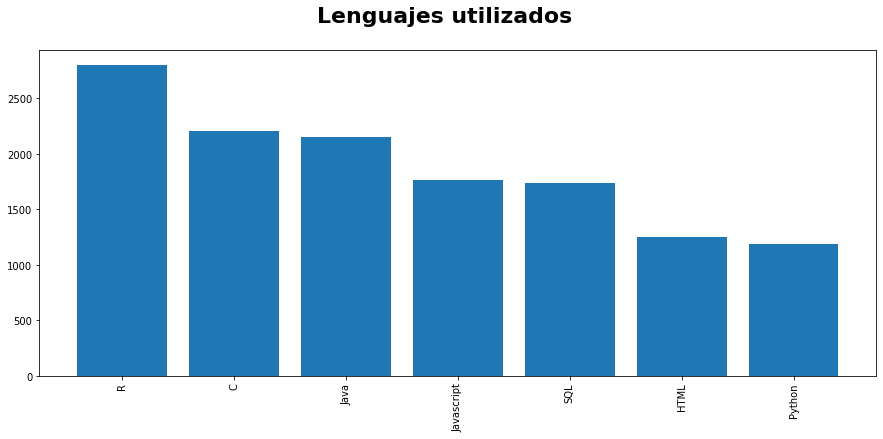

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

fig.suptitle("Lenguajes utilizados",fontsize = 22,fontweight = 'bold')
mas_usados=pd.DataFrame(index=lista3.columns,data=lista3.loc['Total'])
mas_usados.drop(index='Cantidad_lenguajes',inplace=True)
mas_usados=mas_usados.rename(columns={0:'Total'})
mas_usados.sort_values('Total',ascending=False,inplace=True)
plt.xticks(rotation=90)
ax.bar(x=mas_usados.index,height=mas_usados.Total)

In [ ]:
lista3.drop(lista3.tail(1).index, 
        inplace = True)
lista3

SQL  Javascript  Python  R  HTML  C  Java  Cantidad_lenguajes
0       0           0       1  0     0  0     0                   1
1       1           1       0  1     1  1     1                   9
2       0           1       1  1     0  1     1                   6
3       0           1       0  1     0  1     1                   5
4       0           1       0  1     1  1     1                   6
...   ...         ...     ... ..   ... ..   ...                 ...
4411    1           0       1  0     0  0     0                   3
4412    1           0       0  0     0  0     0                   2
4413    0           0       0  1     0  0     0                   1
4414    1           0       0  0     1  0     0                   3
4415    1           1       0  1     0  1     1                   6

[4416 rows x 8 columns]

In [ ]:
#data=pd.merge(data, lista3, how='inner')
data=pd.concat([data,lista3],axis=1)
data

Estoy trabajando en  Dónde estás trabajando Dedicación  \
0               Argentina              Catamarca  Full-Time   
1               Argentina                  Chaco  Full-Time   
2               Argentina                  Chaco  Full-Time   
3               Argentina                  Chaco  Full-Time   
4               Argentina                  Chaco  Full-Time   
...                   ...                    ...        ...   
4411            Argentina                Tucumán  Full-Time   
4412            Argentina                Tucumán  Full-Time   
4413            Argentina                Tucumán  Full-Time   
4414            Argentina                Tucumán  Full-Time   
4415            Argentina                Tucumán  Full-Time   

                                       Tipo de contrato  \
0                             Staff (planta permanente)   
1                         Remoto (empresa de otro país)   
2                             Staff (planta permanente)   
3                         Remoto (empresa de otro país)   
4                             Staff (planta permanente)   
...                                                 ...   
4411  Tercerizado (trabajo a través de consultora o ...   
4412                          Staff (planta permanente)   
4413                          Staff (planta permanente)   
4414                      Remoto (empresa de otro país)   
4415                          Staff (planta permanente)   

     Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                                300000            
1                                                900000            
2                                                120000            
3                                                440000            
4                                                140000            
...                                                 ...            
4411                                             110000            
4412                                             120000            
4413                                             150000            
4414                                             230000            
4415                                             450989            

     Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
0                            No                                        0   
1                            No                                        0   
2                     Un sueldo                                       20   
3                            No                                       54   
4                            No                                       15   
...                         ...                                      ...   
4411                         No                                      20%   
4412                         No                                        -   
4413         Menos de un sueldo                                       25   
4414                         No                                      10%   
4415                         No                                       75   

                              Con qué beneficios contas         funcion  \
0     Abono de Internet, Clases de idiomas, Crédito ...         Infosec   
1     Capacitaciones y/o cursos, Clases de idiomas, ...       Developer   
2                                    Horarios flexibles       Developer   
3                             Ninguna de las anteriores       Developer   
4     Vacaciones flexibles (adicionales a las reglam...       Developer   
...                                                 ...             ...   
4411  Abono de Internet, Capacitaciones y/o cursos, ...   Data Engineer   
4412  Abono de Internet, Descuento en gimnasios / Cl...     QA / Tester   
4413  Capacitaciones y/o cursos, Descuento en gimnas...  Recruiter / HR   
4414  Abono de Internet, Capacitaciones y/o cursos, ...    

Creamos rangos para la cantidad de lenguajes

In [ ]:
print(data['Cantidad_lenguajes'].value_counts())

1     1048
3      468
5      408
2      401
6      395
7      382
4      330
8      280
9      262
10     192
11     120
12      74
13      23
14       9
15       7
16       6
18       3
0        3
17       2
20       2
23       1
Name: Cantidad_lenguajes, dtype: int64


In [ ]:
leng_q=[]
lista_qlen=data['Cantidad_lenguajes'].tolist()
for item in lista_qlen:
  if item==0:
    leng_q.append("ninguno")
  elif item<=1:
    leng_q.append('1')
  elif item<=5:
    leng_q.append('2 a 5')
  elif item<=10:
    leng_q.append('6 a 10')
  else:
    leng_q.append('más de 10')
data['rangos_lenguajes']=leng_q

data

Estoy trabajando en  Dónde estás trabajando Dedicación  \
0               Argentina              Catamarca  Full-Time   
1               Argentina                  Chaco  Full-Time   
2               Argentina                  Chaco  Full-Time   
3               Argentina                  Chaco  Full-Time   
4               Argentina                  Chaco  Full-Time   
...                   ...                    ...        ...   
4411            Argentina                Tucumán  Full-Time   
4412            Argentina                Tucumán  Full-Time   
4413            Argentina                Tucumán  Full-Time   
4414            Argentina                Tucumán  Full-Time   
4415            Argentina                Tucumán  Full-Time   

                                       Tipo de contrato  \
0                             Staff (planta permanente)   
1                         Remoto (empresa de otro país)   
2                             Staff (planta permanente)   
3                         Remoto (empresa de otro país)   
4                             Staff (planta permanente)   
...                                                 ...   
4411  Tercerizado (trabajo a través de consultora o ...   
4412                          Staff (planta permanente)   
4413                          Staff (planta permanente)   
4414                      Remoto (empresa de otro país)   
4415                          Staff (planta permanente)   

     Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                                300000            
1                                                900000            
2                                                120000            
3                                                440000            
4                                                140000            
...                                                 ...            
4411                                             110000            
4412                                             120000            
4413                                             150000            
4414                                             230000            
4415                                             450989            

     Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
0                            No                                        0   
1                            No                                        0   
2                     Un sueldo                                       20   
3                            No                                       54   
4                            No                                       15   
...                         ...                                      ...   
4411                         No                                      20%   
4412                         No                                        -   
4413         Menos de un sueldo                                       25   
4414                         No                                      10%   
4415                         No                                       75   

                              Con qué beneficios contas         funcion  \
0     Abono de Internet, Clases de idiomas, Crédito ...         Infosec   
1     Capacitaciones y/o cursos, Clases de idiomas, ...       Developer   
2                                    Horarios flexibles       Developer   
3                             Ninguna de las anteriores       Developer   
4     Vacaciones flexibles (adicionales a las reglam...       Developer   
...                                                 ...             ...   
4411  Abono de Internet, Capacitaciones y/o cursos, ...   Data Engineer   
4412  Abono de Internet, Descuento en gimnasios / Cl...     QA / Tester   
4413  Capacitaciones y/o cursos, Descuento en gimnas...  Recruiter / HR   
4414  Abono de Internet, Capacitaciones y/o cursos, ...    

In [ ]:
print(data['rangos_lenguajes'].value_counts())

2 a 5        1607
6 a 10       1511
1            1048
más de 10     247
ninguno         3
Name: rangos_lenguajes, dtype: int64


Text(0.5, 0, 'rangos_lenguajes')

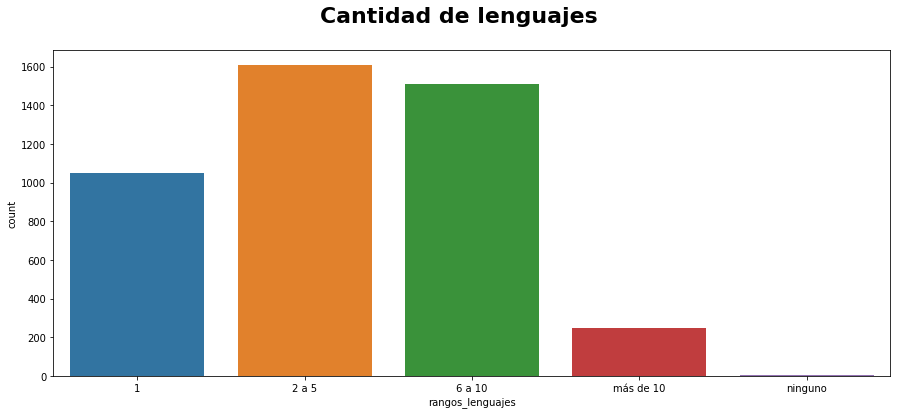

In [ ]:
rangos_order = ['1','2 a 5','6 a 10','más de 10','ninguno']
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='rangos_lenguajes',data=data, order =rangos_order)
fig.suptitle("Cantidad de lenguajes",fontsize = 22,fontweight = 'bold')
ax.set_xlabel(xlabel='rangos_lenguajes')
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

Generamos dummies de cantidad de lenguajes

In [ ]:
data_qlen = pd.get_dummies(data.rangos_lenguajes, prefix='qlen')
data_qlen

qlen_1  qlen_2 a 5  qlen_6 a 10  qlen_más de 10  qlen_ninguno
0          1           0            0               0             0
1          0           0            1               0             0
2          0           0            1               0             0
3          0           1            0               0             0
4          0           0            1               0             0
...      ...         ...          ...             ...           ...
4411       0           1            0               0             0
4412       0           1            0               0             0
4413       1           0            0               0             0
4414       0           1            0               0             0
4415       0           0            1               0             0

[4416 rows x 5 columns]

In [ ]:
#data_qlen['ID'] = np.arange(len(data))
#data=pd.merge(data, data_qlen, how='inner',on='ID')
data=pd.concat([data,data_qlen],axis=1)
data

Estoy trabajando en  Dónde estás trabajando Dedicación  \
0               Argentina              Catamarca  Full-Time   
1               Argentina                  Chaco  Full-Time   
2               Argentina                  Chaco  Full-Time   
3               Argentina                  Chaco  Full-Time   
4               Argentina                  Chaco  Full-Time   
...                   ...                    ...        ...   
4411            Argentina                Tucumán  Full-Time   
4412            Argentina                Tucumán  Full-Time   
4413            Argentina                Tucumán  Full-Time   
4414            Argentina                Tucumán  Full-Time   
4415            Argentina                Tucumán  Full-Time   

                                       Tipo de contrato  \
0                             Staff (planta permanente)   
1                         Remoto (empresa de otro país)   
2                             Staff (planta permanente)   
3                         Remoto (empresa de otro país)   
4                             Staff (planta permanente)   
...                                                 ...   
4411  Tercerizado (trabajo a través de consultora o ...   
4412                          Staff (planta permanente)   
4413                          Staff (planta permanente)   
4414                      Remoto (empresa de otro país)   
4415                          Staff (planta permanente)   

     Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                                300000            
1                                                900000            
2                                                120000            
3                                                440000            
4                                                140000            
...                                                 ...            
4411                                             110000            
4412                                             120000            
4413                                             150000            
4414                                             230000            
4415                                             450989            

     Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
0                            No                                        0   
1                            No                                        0   
2                     Un sueldo                                       20   
3                            No                                       54   
4                            No                                       15   
...                         ...                                      ...   
4411                         No                                      20%   
4412                         No                                        -   
4413         Menos de un sueldo                                       25   
4414                         No                                      10%   
4415                         No                                       75   

                              Con qué beneficios contas         funcion  \
0     Abono de Internet, Clases de idiomas, Crédito ...         Infosec   
1     Capacitaciones y/o cursos, Clases de idiomas, ...       Developer   
2                                    Horarios flexibles       Developer   
3                             Ninguna de las anteriores       Developer   
4     Vacaciones flexibles (adicionales a las reglam...       Developer   
...                                                 ...             ...   
4411  Abono de Internet, Capacitaciones y/o cursos, ...   Data Engineer   
4412  Abono de Internet, Descuento en gimnasios / Cl...     QA / Tester   
4413  Capacitaciones y/o cursos, Descuento en gimnas...  Recruiter / HR   
4414  Abono de Internet, Capacitaciones y/o cursos, ...    

## Columna plataformas utilizadas

Procedemos de igual manera que con los lenguajes, analizando las plataformas, separando los valores y realizando una limpieza

In [ ]:
data['Plataformas que utilizas en tu puesto actual']=data['Plataformas que utilizas en tu puesto actual '].astype('str')
lista_plataforma = data['Plataformas que utilizas en tu puesto actual']
lista_plataforma=lista_plataforma.tolist()   #pasamos los datos de la columna genero a lista
lista4=[]
for plataforma in lista_plataforma:
    cosa=re.split(',|/|-| y ',plataforma)
    
    for item in  cosa:
        lista4.append(re.sub(r'^\s+|\s+$' , '' , item))

lista4=set(lista4)
lista4

{'*BSD',
 '.',
 '0S400',
 '11 (host)',
 '3way',
 'AIX',
 'AKS',
 'ALM',
 'ARC Serve',
 'ARIS',
 'AS400',
 'ATM',
 'AVR',
 'AWX',
 'Adobe',
 'Adobe experience manager',
 'Alation',
 'Alephoo',
 'Alibaba Cloud',
 'Alicloud',
 'Alteryx',
 'Altus',
 'Amazon Web Services',
 'Amplitude',
 'Analytics',
 'Android',
 'Android Studio',
 'Ansible Tower',
 'Apache CloudStack',
 'Apache Nifi',
 'Apache tomcat',
 'Apollo',
 'Appdynamics',
 'Arduino o similar',
 'Artifactory',
 'Asterisk',
 'Atlassian',
 'Automation Anywhere',
 'Avature',
 'Axway CFT',
 'Azure',
 'BigQuery',
 'Bitrise',
 'Blue Prism',
 'BluePrism',
 'Blueprism',
 'Browserstack',
 'Burp Suite Pro',
 'CLI',
 'CMS Platform',
 'CRM',
 'Calipso',
 'Cambium',
 'Cambium network',
 'Charles Proxy',
 'Ciberseguridad',
 'Cisco',
 'Cisco Firepower',
 'Cisco IOS',
 'Cisco Messaging',
 'Cisco Unity Connection',
 'Citrix',
 'Cloudera',
 'Confluence',
 'Contabo',
 'Content server',
 'Crowdstrike',
 'Crownpeak',
 'Custom cloud',
 'Cytomic EPDR',
 'D

Construimos un dataframe creamos dummies

In [ ]:
lista5=pd.DataFrame(columns=lista4)
lista5

Empty DataFrame
Columns: [huawei cloud, NIFI, In house tools para Estos, Software Empresarial, Hotjar, GitLab, Oracle cloud, Gestiono usando mails, Softland, Altus, slack, CMS Platform, DATIO, Proxmox VE, Swagger, tableau, Alibaba Cloud, Amplitude, Cambium, zabbix, Amazon Web Services, OneAccess, Debian 11, Vsn Mam, Edirectory, Ninguna de las anteriores, kali linux, Global Tax Platform, Dynamics 365, software dedicado, sql, Cisco Messaging, Apache CloudStack, ARC Serve, datastudio, Android Studio, MacOs, ONSSI, Panda, Apollo, Ciberseguridad, Jboss, Android, HyprrV, Mainframe, RPA, git, Xcode, UX, etc, Axway CFT, PaaS, Digital Ocean, IBM DatStage, NETSUITE, Windows Server, N, 3way, paquete office, c#, uDeploy, Nagios, Docker, Juju, OSB, Veeam, Stored Procedures, Confluence, ATM, Oracle, Proxmox Backup Server, Salesforce, Cisco Unity Connection, windows, Ansible Tower, Magento, MSSS, Oracle EBS, citrix, WSO2, Siemens Rockwell Schneider Electric, Bitrise, TOTVS, ELK, SOAP, ONE AD, Watchguard, gsuite, Gitlab, VirtualBox, TFS, Cambium network, Solaris, Talend, Magento Cloud, Split, SFTP, Office 365, Adobe experience manager, ProxMox, ...]
Index: []

[0 rows x 418 columns]

In [ ]:
for plataf in lista4:
    plataf2=[]
    
    for item in lista_plataforma:
        
        if re.search(re.escape(plataf), item, re.IGNORECASE):
            plataf2.append(1)
        else:
            plataf2.append(0)
    lista5[plataf]=plataf2
lista5

huawei cloud  NIFI  In house tools para Estos  Software Empresarial  \
0                0     0                          0                     0   
1                0     0                          0                     0   
2                0     0                          0                     0   
3                0     0                          0                     0   
4                0     0                          0                     0   
...            ...   ...                        ...                   ...   
4411             0     0                          0                     0   
4412             0     0                          0                     0   
4413             0     0                          0                     0   
4414             0     0                          0                     0   
4415             0     0                          0                     0   

      Hotjar  GitLab  Oracle cloud  Gestiono usando mails  Softland  Altus  \
0          0       0             0                      0         0      0   
1          0       0             0                      0         0      0   
2          0       0             0                      0         0      0   
3          0       0             0                      0         0      0   
4          0       0             0                      0         0      0   
...      ...     ...           ...                    ...       ...    ...   
4411       0       0             0                      0         0      0   
4412       0       0             0                      0         0      0   
4413       0       0             0                      0         0      0   
4414       0       0             0                      0         0      0   
4415       0       0             0                      0         0      0   

      ...  palo alto  JIRA  Windows 10  sqlserver  Multitecnología  \
0     ...          0     0           0          0                0   
1     ...          0     0           0          0                0   
2     ...          0     0           0          0                0   
3     ...          0     0           0          0                0   
4     ...          0     0           0          0                0   
...   ...        ...   ...         ...        ...              ...   
4411  ...          0     0           0          0                0   
4412  ...          0     0           0          0                0   
4413  ...          0     0           0          0                0   
4414  ...          0     0           0          0                0   
4415  ...          0     0           0          0                0   

      ERP de gestion  IBM Cloud  Oracle NetSuite  AWX  Moodle  
0                  0          0                0    0       0  
1                  0          0                0    0       0  
2                  0          0                0    0       0  
3                  0          0                0    0       0  
4                  0          0                0    0       0  
...              ...        ...              ...  ...     ...  
4411               0          0                0    0       0  
4412               0          0                0    0       0  
4413               0          0                0    0       0  
4414               0          0                0    0       0  
4415               0          0                0    0       0  

[4416 rows x 418 columns]

**Gráfico de plataformas más utilizados**

<BarContainer object of 22 artists>

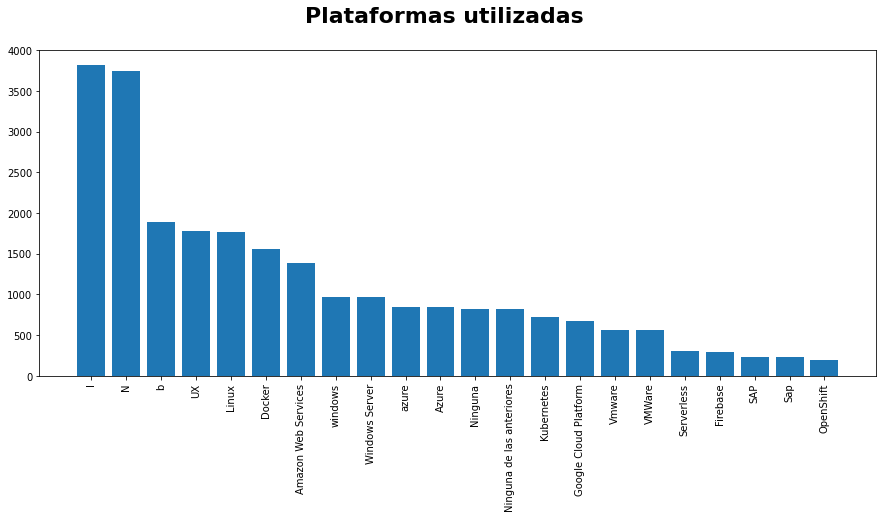

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

fig.suptitle("Plataformas utilizadas",fontsize = 22,fontweight = 'bold')
mas_usados=pd.DataFrame(index=lista5.columns,data=lista5.sum())
mas_usados=mas_usados.rename(columns={0:'Total'})
mas_usados.sort_values('Total',ascending=False,inplace=True)
plt.xticks(rotation=90)
ax.bar(x=mas_usados[mas_usados['Total']>100].index,height=mas_usados[mas_usados['Total']>100].Total)

### Creación columna cantidad de plataformas

Repetimos el procedimiento con las plataformas

In [ ]:
lista5['Cantidad_plataformas']=lista5.sum(axis=1)
lista5.loc['Total']=lista5.sum()
lista5

huawei cloud  NIFI  In house tools para Estos  Software Empresarial  \
0                 0     0                          0                     0   
1                 0     0                          0                     0   
2                 0     0                          0                     0   
3                 0     0                          0                     0   
4                 0     0                          0                     0   
...             ...   ...                        ...                   ...   
4412              0     0                          0                     0   
4413              0     0                          0                     0   
4414              0     0                          0                     0   
4415              0     0                          0                     0   
Total             3     3                          1                     1   

       Hotjar  GitLab  Oracle cloud  Gestiono usando mails  Softland  Altus  \
0           0       0             0                      0         0      0   
1           0       0             0                      0         0      0   
2           0       0             0                      0         0      0   
3           0       0             0                      0         0      0   
4           0       0             0                      0         0      0   
...       ...     ...           ...                    ...       ...    ...   
4412        0       0             0                      0         0      0   
4413        0       0             0                      0         0      0   
4414        0       0             0                      0         0      0   
4415        0       0             0                      0         0      0   
Total       1       4             7                      1         2      1   

       ...  JIRA  Windows 10  sqlserver  Multitecnología  ERP de gestion  \
0      ...     0           0          0                0               0   
1      ...     0           0          0                0               0   
2      ...     0           0          0                0               0   
3      ...     0           0          0                0               0   
4      ...     0           0          0                0               0   
...    ...   ...         ...        ...              ...             ...   
4412   ...     0           0          0                0               0   
4413   ...     0           0          0                0               0   
4414   ...     0           0          0                0               0   
4415   ...     0           0          0                0               0   
Total  ...    27           1          1                1               1   

       IBM Cloud  Oracle NetSuite  AWX  Moodle  Cantidad_plataformas  
0              0                0    0       0                     8  
1              0                0    0       0                     4  
2              0                0    0       0                     4  
3              0                0    0       0                     4  
4              0                0    0       0                     4  
...          ...              ...  ...     ...                   ...  
4412           0                0    0       0                     4  
4413           0                0    0       0                     4  
4414           0                0    0       0                     1  
4415           0                0    0       0                     8  
Total         36                1    1       1                 26465  

[4417 rows x 419 columns]

Eliminamos las columnas que tienen menos de 1000 registros

In [ ]:
borrar=lista5.columns[lista5.loc['Total']<1000]
borrar

Index(['huawei cloud', 'NIFI', 'In house tools para Estos',
       'Software Empresarial', 'Hotjar', 'GitLab', 'Oracle cloud',
       'Gestiono usando mails', 'Softland', 'Altus',
       ...
       'palo alto', 'JIRA', 'Windows 10', 'sqlserver', 'Multitecnología',
       'ERP de gestion', 'IBM Cloud', 'Oracle NetSuite', 'AWX', 'Moodle'],
      dtype='object', length=411)

In [ ]:
lista5.drop(columns=borrar,inplace=True)
lista5

Amazon Web Services    UX     N  Docker  Linux     b     I  \
0                        1     1     1       0      1     1     1   
1                        1     0     1       0      0     1     1   
2                        1     0     1       0      0     1     1   
3                        0     0     0       0      0     1     1   
4                        1     0     1       0      0     1     1   
...                    ...   ...   ...     ...    ...   ...   ...   
4412                     0     0     1       0      0     0     1   
4413                     0     0     1       0      0     0     1   
4414                     0     0     1       0      0     0     0   
4415                     1     0     1       0      0     1     1   
Total                 1385  1774  3750    1564   1772  1891  3814   

       Cantidad_plataformas  
0                         8  
1                         4  
2                         4  
3                         4  
4                         4  
...                     ...  
4412                      4  
4413                      4  
4414                      1  
4415                      8  
Total                 26465  

[4417 rows x 8 columns]

Revisamos columnas erróneas

In [ ]:
lista5.drop(columns={'b','I'},inplace=True)
lista5

Amazon Web Services    UX     N  Docker  Linux  Cantidad_plataformas
0                        1     1     1       0      1                     8
1                        1     0     1       0      0                     4
2                        1     0     1       0      0                     4
3                        0     0     0       0      0                     4
4                        1     0     1       0      0                     4
...                    ...   ...   ...     ...    ...                   ...
4412                     0     0     1       0      0                     4
4413                     0     0     1       0      0                     4
4414                     0     0     1       0      0                     1
4415                     1     0     1       0      0                     8
Total                 1385  1774  3750    1564   1772                 26465

[4417 rows x 6 columns]

### Gráfico más utilizadas

<BarContainer object of 5 artists>

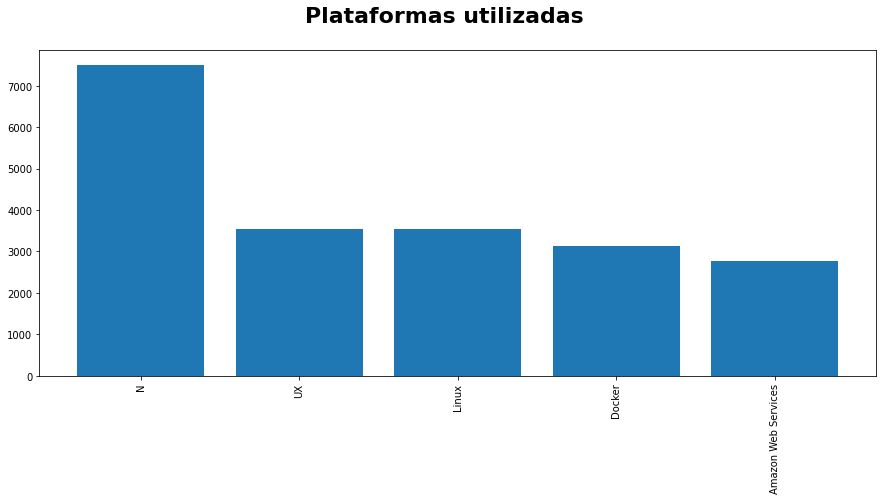

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

fig.suptitle("Plataformas utilizadas",fontsize = 22,fontweight = 'bold')
mas_usados=pd.DataFrame(index=lista5.columns,data=lista5.sum())
mas_usados.drop(index='Cantidad_plataformas',inplace=True)
mas_usados=mas_usados.rename(columns={0:'Total'})
mas_usados.sort_values('Total',ascending=False,inplace=True)
plt.xticks(rotation=90)
ax.bar(x=mas_usados.index,height=mas_usados.Total)

Repetimos procedimiento: creamos columna 'ID' y hacemos merge

In [ ]:
lista5.drop(lista5.tail(1).index, 
        inplace = True)
#lista5['ID'] = np.arange(len(data))
#data=pd.merge(data, lista5, how='inner',on='ID')
data=pd.concat([data,lista5],axis=1)

In [ ]:
data

Estoy trabajando en  Dónde estás trabajando Dedicación  \
0               Argentina              Catamarca  Full-Time   
1               Argentina                  Chaco  Full-Time   
2               Argentina                  Chaco  Full-Time   
3               Argentina                  Chaco  Full-Time   
4               Argentina                  Chaco  Full-Time   
...                   ...                    ...        ...   
4411            Argentina                Tucumán  Full-Time   
4412            Argentina                Tucumán  Full-Time   
4413            Argentina                Tucumán  Full-Time   
4414            Argentina                Tucumán  Full-Time   
4415            Argentina                Tucumán  Full-Time   

                                       Tipo de contrato  \
0                             Staff (planta permanente)   
1                         Remoto (empresa de otro país)   
2                             Staff (planta permanente)   
3                         Remoto (empresa de otro país)   
4                             Staff (planta permanente)   
...                                                 ...   
4411  Tercerizado (trabajo a través de consultora o ...   
4412                          Staff (planta permanente)   
4413                          Staff (planta permanente)   
4414                      Remoto (empresa de otro país)   
4415                          Staff (planta permanente)   

     Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                                300000            
1                                                900000            
2                                                120000            
3                                                440000            
4                                                140000            
...                                                 ...            
4411                                             110000            
4412                                             120000            
4413                                             150000            
4414                                             230000            
4415                                             450989            

     Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
0                            No                                        0   
1                            No                                        0   
2                     Un sueldo                                       20   
3                            No                                       54   
4                            No                                       15   
...                         ...                                      ...   
4411                         No                                      20%   
4412                         No                                        -   
4413         Menos de un sueldo                                       25   
4414                         No                                      10%   
4415                         No                                       75   

                              Con qué beneficios contas         funcion  \
0     Abono de Internet, Clases de idiomas, Crédito ...         Infosec   
1     Capacitaciones y/o cursos, Clases de idiomas, ...       Developer   
2                                    Horarios flexibles       Developer   
3                             Ninguna de las anteriores       Developer   
4     Vacaciones flexibles (adicionales a las reglam...       Developer   
...                                                 ...             ...   
4411  Abono de Internet, Capacitaciones y/o cursos, ...   Data Engineer   
4412  Abono de Internet, Descuento en gimnasios / Cl...     QA / Tester   
4413  Capacitaciones y/o cursos, Descuento en gimnas...  Recruiter / HR   
4414  Abono de Internet, Capacitaciones y/o cursos, ...    

Observamos que 'UX' se repite como tipo de empleo y plataforma

In [ ]:
data.columns

Index(['Estoy trabajando en ', 'Dónde estás trabajando', 'Dedicación',
       'Tipo de contrato',
       'Último salario mensual  o retiro BRUTO (en tu moneda local)',
       'Recibís algún tipo de bono',
       '¿De qué % fue el ajuste total acumulado?', 'Con qué beneficios contas',
       'funcion', 'Años de experiencia', 'Antigüedad en la empresa actual',
       'Tiempo en el puesto actual', '¿Cuántas personas a cargo tenés? ',
       'Plataformas que utilizas en tu puesto actual ',
       'Lenguajes de programación o tecnologías que utilices en tu puesto actual',
       'Frameworks, herramientas y librerías que utilices en tu puesto actual',
       'Bases de datos', 'QA / Testing',
       'Cantidad de personas en tu organización', 'Modalidad de trabajo',
       'Si trabajas bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina? ',
       '¿La recomendás como un buen lugar para trabajar?',
       'Máximo nivel de estudios', 'Estado', 'Carrera', 'Universidad ',
       '¿

## Columna Frameworks

In [ ]:
data['Frameworks, herramientas y librerías que utilices en tu puesto actual']=data['Frameworks, herramientas y librerías que utilices en tu puesto actual'].astype('str')
lista_framework = data['Frameworks, herramientas y librerías que utilices en tu puesto actual']
lista_framework=lista_framework.tolist()
lista8=[]
for frame in lista_framework:
    cosa=re.split(',|/|-| y ',frame)
    
    for item in  cosa:
        lista8.append(re.sub(r'^\s+|\s+$' , '' , item))

lista8=set(lista8)
lista8

{'.',
 '.NET 4.7.2',
 '.NET Core',
 '.NET Framework',
 '.NET Framework 4.5',
 '11ty',
 '4.5',
 'APEX',
 'ASP.NET',
 'AWX',
 'Actix',
 'Adonisjs',
 'Airflow',
 'Akka',
 'Akka.net',
 'Alembic',
 'Android',
 'Android Studio',
 'Angular',
 'Angular JS',
 'Angular material',
 'AngularJS',
 'Angularjs',
 'Ansible',
 'Apex',
 'Appium',
 'Automapper',
 'BeautifulSoup',
 'Blazor',
 'Boost',
 'Bootstrap',
 'Broadcom sdk',
 'CTM',
 'CVSS',
 'CWE',
 'Camel',
 'Chai',
 'Chakra',
 'ChakraUI',
 'Charmed Operator Framework',
 'CherryPy',
 'Ciberseguridad',
 'Claris FileMaker',
 'CodeIgniter',
 'Cordova',
 'Cypress',
 'Django',
 'Dojo',
 'Dojo Toolkit',
 'Dolphin Smalltalk',
 'Drive',
 'Drools',
 'Drupal',
 'Dynamics 365',
 'Dynamics365',
 'Echo',
 'El framework es inhouse',
 'Elasticsearch',
 'Enscribe software',
 'Entity Framework',
 'Entity Framework 3.0',
 'Expo',
 'Express',
 'ExtJS',
 'FUP(File Utility Program)',
 'Fast API',
 'Fast api',
 'FastAPI',
 'FastApi',
 'Fastapi',
 'Flask',
 'Fluent Val

In [ ]:
lista9=pd.DataFrame(columns=lista8)
lista9

Empty DataFrame
Columns: [No sé, React native, Vtex, boto3, Lightning web components, catboost, CherryPy, Gestiono usando mails, Netbeans, Oracle WebCenter Sites, openpyxl, ExtJS, OpenCV Tesseract SpaCy, WordPress, assured, Vtex IO, Retrofit, JDBC, Dynamics 365, styled components, tailwindcss, Twig, optuna, Android Studio, Power platform, gatsby, Lwc, Nest, Ciberseguridad, Go land, Android, react native, jcl, Modyo, Drools, ISO27001, Expo, UX, Vue.js, Echo, .NET Core, Material UI, Loopback, No, El framework es inhouse, Redux, bareos backups, xxxx, Rexx, angularjs, Underscore, no utilizo, Enscribe software, 11ty, Plotly Dash, ReactNative, Oracle, Magento, Gonic, Fastapi, Typescript, Flutter, Fast api, selenium, Propietario, Pandas, Unity, Dojo Toolkit, Slim Framework, Node.js, React.js, Nestjs, hugging face transformers, mediatek sdk, Qt, Knockout.js, Nada, Split, Pyantic, hyperf, great expectations, k6, Angular JS, SAPUI5, slim framework, Lightning, jQuery, Hadoop, Appium, Next.js, Serverless framework, FUP(File Utility Program), BeautifulSoup, Tailwind CSS, learn, .NET Framework 4.5, SASS, gingonic, excel :), no programo, ...]
Index: []

[0 rows x 315 columns]

In [ ]:
for frame in lista9:
    frame2=[]
    
    for item in lista_framework:
        
        if re.search(re.escape(frame), item, re.IGNORECASE):
            frame2.append(1)
        else:
            frame2.append(0)
    lista9[frame]=frame2
lista9

No sé  React native  Vtex  boto3  Lightning web components  catboost  \
0         0             0     0      0                         0         0   
1         0             0     0      0                         0         0   
2         0             0     0      0                         0         0   
3         0             0     0      0                         0         0   
4         0             0     0      0                         0         0   
...     ...           ...   ...    ...                       ...       ...   
4411      0             0     0      0                         0         0   
4412      0             0     0      0                         0         0   
4413      0             0     0      0                         0         0   
4414      0             0     0      0                         0         0   
4415      0             0     0      0                         0         0   

      CherryPy  Gestiono usando mails  Netbeans  Oracle WebCenter Sites  ...  \
0            0                      0         0                       0  ...   
1            0                      0         0                       0  ...   
2            0                      0         0                       0  ...   
3            0                      0         0                       0  ...   
4            0                      0         0                       0  ...   
...        ...                    ...       ...                     ...  ...   
4411         0                      0         0                       0  ...   
4412         0                      0         0                       0  ...   
4413         0                      0         0                       0  ...   
4414         0                      0         0                       0  ...   
4415         0                      0         0                       0  ...   

      Angular material  ninguno  vertex  Cypress  Airflow  Multitecnología  \
0                    0        1       0        0        0                0   
1                    0        0       0        0        0                0   
2                    0        0       0        0        0                0   
3                    0        0       0        0        0                0   
4                    0        0       0        0        0                0   
...                ...      ...     ...      ...      ...              ...   
4411                 0        0       0        0        0                0   
4412                 0        1       0        0        0                0   
4413                 0        1       0        0        0                0   
4414                 0        0       0        0        0                0   
4415                 0        1       0        0        0                0   

      4.5  Adonisjs  AWX  Moodle  
0       0         0    0       0  
1       0         0    0       0  
2       0         0    0       0  
3       0         0    0       0  
4       0         0    0       0  
...   ...       ...  ...     ...  
4411    0         0    0       0  
4412    0         0    0       0  
4413    0         0    0       0  
4414    0         0    0       0  
4415    0         0    0       0  

[4416 rows x 315 columns]

Gráfico más utilizados

<BarContainer object of 21 artists>

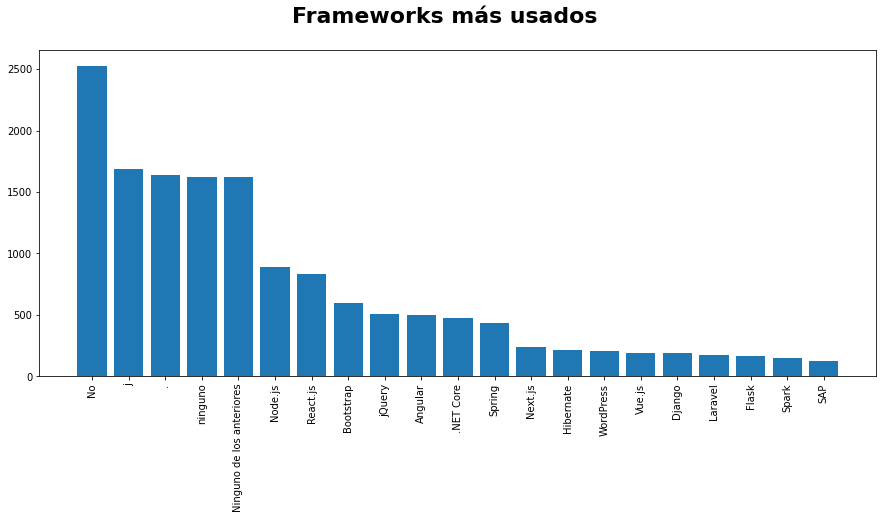

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

fig.suptitle("Frameworks más usados",fontsize = 22,fontweight = 'bold')
mas_usados=pd.DataFrame(index=lista9.columns,data=lista9.sum())
mas_usados=mas_usados.rename(columns={0:'Total'})
mas_usados.sort_values('Total',ascending=False,inplace=True)
plt.xticks(rotation=90)
ax.bar(x=mas_usados[mas_usados['Total']>100].index,height=mas_usados[mas_usados['Total']>100].Total)

### Creación columna cantidad de frameworks

In [ ]:
lista9['Cantidad_frameworks']=lista9.sum(axis=1)
lista9.loc['Total']=lista9.sum()
lista9

No sé  React native  Vtex  boto3  Lightning web components  catboost  \
0          0             0     0      0                         0         0   
1          0             0     0      0                         0         0   
2          0             0     0      0                         0         0   
3          0             0     0      0                         0         0   
4          0             0     0      0                         0         0   
...      ...           ...   ...    ...                       ...       ...   
4412       0             0     0      0                         0         0   
4413       0             0     0      0                         0         0   
4414       0             0     0      0                         0         0   
4415       0             0     0      0                         0         0   
Total      1            20     4      1                         1         1   

       CherryPy  Gestiono usando mails  Netbeans  Oracle WebCenter Sites  ...  \
0             0                      0         0                       0  ...   
1             0                      0         0                       0  ...   
2             0                      0         0                       0  ...   
3             0                      0         0                       0  ...   
4             0                      0         0                       0  ...   
...         ...                    ...       ...                     ...  ...   
4412          0                      0         0                       0  ...   
4413          0                      0         0                       0  ...   
4414          0                      0         0                       0  ...   
4415          0                      0         0                       0  ...   
Total         1                      1         1                       1  ...   

       ninguno  vertex  Cypress  Airflow  Multitecnología  4.5  Adonisjs  AWX  \
0            1       0        0        0                0    0         0    0   
1            0       0        0        0                0    0         0    0   
2            0       0        0        0                0    0         0    0   
3            0       0        0        0                0    0         0    0   
4            0       0        0        0                0    0         0    0   
...        ...     ...      ...      ...              ...  ...       ...  ...   
4412         1       0        0        0                0    0         0    0   
4413         1       0        0        0                0    0         0    0   
4414         0       0        0        0                0    0         0    0   
4415         1       0        0        0                0    0         0    0   
Total     1623       1        1        4                1    2         1    2   

       Moodle  Cantidad_frameworks  
0           0                    3  
1           0                    3  
2           0                    5  
3           0                    5  
4           0                    3  
...       ...                  ...  
4412        0                    3  
4413        0                    3  
4414        0                    1  
4415        0                    3  
Total       4                16258  

[4417 rows x 316 columns]

Eliminamos las columnas que tienen menos de 500 registros (con 1000 se pierde mucha información)

In [ ]:
borrar=lista9.columns[lista9.loc['Total']<500]
borrar

Index(['No sé', 'React native', 'Vtex', 'boto3', 'Lightning web components',
       'catboost', 'CherryPy', 'Gestiono usando mails', 'Netbeans',
       'Oracle WebCenter Sites',
       ...
       'Telerik Kendo UI (MVC', 'Angular material', 'vertex', 'Cypress',
       'Airflow', 'Multitecnología', '4.5', 'Adonisjs', 'AWX', 'Moodle'],
      dtype='object', length=306)

In [ ]:
lista9.drop(columns=borrar,inplace=True)
lista9

No  Node.js  React.js  jQuery     j     .  Bootstrap  \
0         1        0         0       0     0     0          0   
1         0        0         1       0     1     1          0   
2         0        0         0       0     1     1          0   
3         1        1         1       0     1     1          0   
4         0        0         1       0     1     1          0   
...     ...      ...       ...     ...   ...   ...        ...   
4412      1        0         0       0     0     0          0   
4413      1        0         0       0     0     0          0   
4414      0        0         0       0     0     0          0   
4415      1        0         0       0     0     0          0   
Total  2529      892       835     505  1686  1635        593   

       Ninguno de los anteriores  ninguno  Cantidad_frameworks  
0                              1        1                    3  
1                              0        0                    3  
2                              0        0                    5  
3                              0        0                    5  
4                              0        0                    3  
...                          ...      ...                  ...  
4412                           1        1                    3  
4413                           1        1                    3  
4414                           0        0                    1  
4415                           1        1                    3  
Total                       1622     1623                16258  

[4417 rows x 10 columns]

Revisamos columnas erróneas

In [ ]:
lista9.drop(columns={'Ninguno de los anteriores','ninguno','.','No'},inplace=True)
lista9

Node.js  React.js  jQuery     j  Bootstrap  Cantidad_frameworks
0            0         0       0     0          0                    3
1            0         1       0     1          0                    3
2            0         0       0     1          0                    5
3            1         1       0     1          0                    5
4            0         1       0     1          0                    3
...        ...       ...     ...   ...        ...                  ...
4412         0         0       0     0          0                    3
4413         0         0       0     0          0                    3
4414         0         0       0     0          0                    1
4415         0         0       0     0          0                    3
Total      892       835     505  1686        593                16258

[4417 rows x 6 columns]

### Gráfico frameworks más utilizados

<BarContainer object of 5 artists>

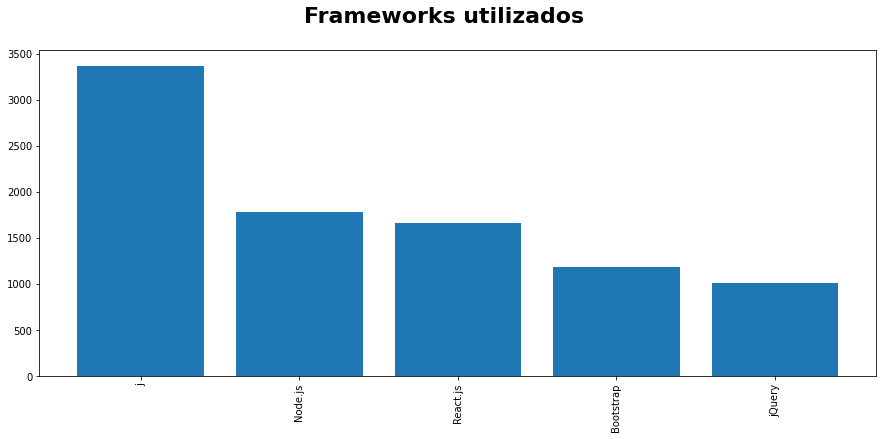

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

fig.suptitle("Frameworks utilizados",fontsize = 22,fontweight = 'bold')
mas_usados=pd.DataFrame(index=lista9.columns,data=lista9.sum())
mas_usados.drop(index='Cantidad_frameworks',inplace=True)
mas_usados=mas_usados.rename(columns={0:'Total'})
mas_usados.sort_values('Total',ascending=False,inplace=True)
plt.xticks(rotation=90)
ax.bar(x=mas_usados.index,height=mas_usados.Total)

In [ ]:
lista9.drop(lista9.tail(1).index, 
        inplace = True)
#lista9['ID'] = np.arange(len(data))
#data=pd.merge(data, lista9, how='inner',on='ID')
data=pd.concat([data,lista9],axis=1)
data

Estoy trabajando en  Dónde estás trabajando Dedicación  \
0               Argentina              Catamarca  Full-Time   
1               Argentina                  Chaco  Full-Time   
2               Argentina                  Chaco  Full-Time   
3               Argentina                  Chaco  Full-Time   
4               Argentina                  Chaco  Full-Time   
...                   ...                    ...        ...   
4411            Argentina                Tucumán  Full-Time   
4412            Argentina                Tucumán  Full-Time   
4413            Argentina                Tucumán  Full-Time   
4414            Argentina                Tucumán  Full-Time   
4415            Argentina                Tucumán  Full-Time   

                                       Tipo de contrato  \
0                             Staff (planta permanente)   
1                         Remoto (empresa de otro país)   
2                             Staff (planta permanente)   
3                         Remoto (empresa de otro país)   
4                             Staff (planta permanente)   
...                                                 ...   
4411  Tercerizado (trabajo a través de consultora o ...   
4412                          Staff (planta permanente)   
4413                          Staff (planta permanente)   
4414                      Remoto (empresa de otro país)   
4415                          Staff (planta permanente)   

     Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                                300000            
1                                                900000            
2                                                120000            
3                                                440000            
4                                                140000            
...                                                 ...            
4411                                             110000            
4412                                             120000            
4413                                             150000            
4414                                             230000            
4415                                             450989            

     Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
0                            No                                        0   
1                            No                                        0   
2                     Un sueldo                                       20   
3                            No                                       54   
4                            No                                       15   
...                         ...                                      ...   
4411                         No                                      20%   
4412                         No                                        -   
4413         Menos de un sueldo                                       25   
4414                         No                                      10%   
4415                         No                                       75   

                              Con qué beneficios contas         funcion  \
0     Abono de Internet, Clases de idiomas, Crédito ...         Infosec   
1     Capacitaciones y/o cursos, Clases de idiomas, ...       Developer   
2                                    Horarios flexibles       Developer   
3                             Ninguna de las anteriores       Developer   
4     Vacaciones flexibles (adicionales a las reglam...       Developer   
...                                                 ...             ...   
4411  Abono de Internet, Capacitaciones y/o cursos, ...   Data Engineer   
4412  Abono de Internet, Descuento en gimnasios / Cl...     QA / Tester   
4413  Capacitaciones y/o cursos, Descuento en gimnas...  Recruiter / HR   
4414  Abono de Internet, Capacitaciones y/o cursos, ...    

In [ ]:
#lista9.rename({'SAP': 'Otros','Spark': 'Otros','Flask': 'Otros','Laravel': 'Otros','Django': 'Otros','Vue.js': 'Otros','WordPress': 'Otros','Hibernate': 'Otros','Next.js': 'Otros'}, axis=1, inplace=True)

## Columna tipo de contrato

### Gráfico 

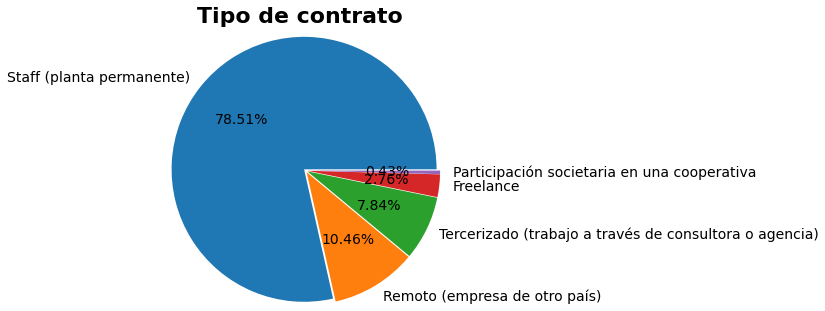

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(top=0.7,hspace=0.5)
plt.pie(x=data['Tipo de contrato'].value_counts(),labels=data['Tipo de contrato'].unique(),autopct = '%0.2f%%',radius=2,explode=[0.03,0.03,0.03,0.03,0.03],
        textprops={'size': 14})
fig.suptitle("Tipo de contrato",fontsize = 22,fontweight = 'bold')
plt.show()

In [ ]:
dummies_tipo_contrato=pd.get_dummies(data['Tipo de contrato'])
dummies_tipo_contrato

Freelance  Participación societaria en una cooperativa  \
0             0                                            0   
1             0                                            0   
2             0                                            0   
3             0                                            0   
4             0                                            0   
...         ...                                          ...   
4411          0                                            0   
4412          0                                            0   
4413          0                                            0   
4414          0                                            0   
4415          0                                            0   

      Remoto (empresa de otro país)  Staff (planta permanente)  \
0                                 0                          1   
1                                 1                          0   
2                                 0                          1   
3                                 1                          0   
4                                 0                          1   
...                             ...                        ...   
4411                              0                          0   
4412                              0                          1   
4413                              0                          1   
4414                              1                          0   
4415                              0                          1   

      Tercerizado (trabajo a través de consultora o agencia)  
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
4411                                                  1       
4412                                                  0       
4413                                                  0       
4414                                                  0       
4415                                                  0       

[4416 rows x 5 columns]

In [ ]:
data=pd.concat([data,dummies_tipo_contrato],axis=1)
data

Estoy trabajando en  Dónde estás trabajando Dedicación  \
0               Argentina              Catamarca  Full-Time   
1               Argentina                  Chaco  Full-Time   
2               Argentina                  Chaco  Full-Time   
3               Argentina                  Chaco  Full-Time   
4               Argentina                  Chaco  Full-Time   
...                   ...                    ...        ...   
4411            Argentina                Tucumán  Full-Time   
4412            Argentina                Tucumán  Full-Time   
4413            Argentina                Tucumán  Full-Time   
4414            Argentina                Tucumán  Full-Time   
4415            Argentina                Tucumán  Full-Time   

                                       Tipo de contrato  \
0                             Staff (planta permanente)   
1                         Remoto (empresa de otro país)   
2                             Staff (planta permanente)   
3                         Remoto (empresa de otro país)   
4                             Staff (planta permanente)   
...                                                 ...   
4411  Tercerizado (trabajo a través de consultora o ...   
4412                          Staff (planta permanente)   
4413                          Staff (planta permanente)   
4414                      Remoto (empresa de otro país)   
4415                          Staff (planta permanente)   

     Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                                300000            
1                                                900000            
2                                                120000            
3                                                440000            
4                                                140000            
...                                                 ...            
4411                                             110000            
4412                                             120000            
4413                                             150000            
4414                                             230000            
4415                                             450989            

     Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
0                            No                                        0   
1                            No                                        0   
2                     Un sueldo                                       20   
3                            No                                       54   
4                            No                                       15   
...                         ...                                      ...   
4411                         No                                      20%   
4412                         No                                        -   
4413         Menos de un sueldo                                       25   
4414                         No                                      10%   
4415                         No                                       75   

                              Con qué beneficios contas         funcion  \
0     Abono de Internet, Clases de idiomas, Crédito ...         Infosec   
1     Capacitaciones y/o cursos, Clases de idiomas, ...       Developer   
2                                    Horarios flexibles       Developer   
3                             Ninguna de las anteriores       Developer   
4     Vacaciones flexibles (adicionales a las reglam...       Developer   
...                                                 ...             ...   
4411  Abono de Internet, Capacitaciones y/o cursos, ...   Data Engineer   
4412  Abono de Internet, Descuento en gimnasios / Cl...     QA / Tester   
4413  Capacitaciones y/o cursos, Descuento en gimnas...  Recruiter / HR   
4414  Abono de Internet, Capacitaciones y/o cursos, ...    

## Columna Bono

### Gráfico

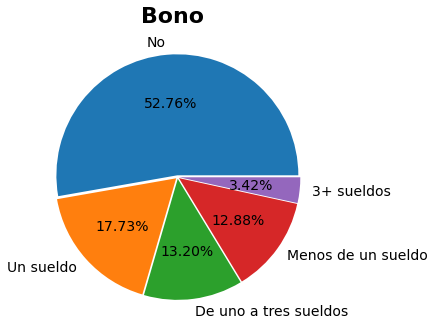

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(top=0.65,hspace=0.5)
plt.pie(x=data['Recibís algún tipo de bono'].value_counts(),labels=data['Recibís algún tipo de bono'].unique(),autopct = '%0.2f%%',radius=2,explode=[0.03,0.03,0.03,0.03,0.03],
        textprops={'size': 14})
fig.suptitle("Bono",fontsize = 22,fontweight = 'bold')
plt.show()

## Columna Años de experiencia

### Gráfico

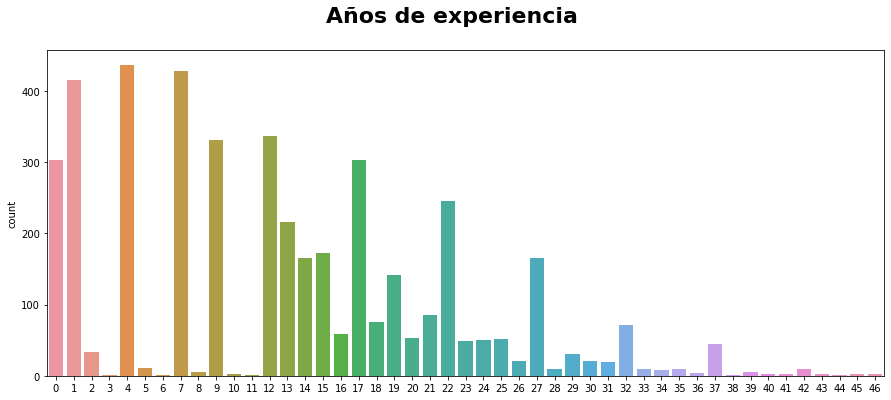

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='Años de experiencia',data=data)
fig.suptitle("Años de experiencia",fontsize = 22,fontweight = 'bold')
ax.set_xlabel(xlabel='')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

## Columna Seniority

Convertimos los años de experiencia en Seniority

In [ ]:
seniority=[]
lista_anios=data['Años de experiencia'].tolist()
for item in lista_anios:
  if item<=2:
    seniority.append('Junior')
  elif item<=5:
    seniority.append('Semi-Senior')
  elif item<=10:
    seniority.append('Senior')
  else:
    seniority.append('Expert')
data['Seniority']=seniority

data

Estoy trabajando en  Dónde estás trabajando Dedicación  \
0               Argentina              Catamarca  Full-Time   
1               Argentina                  Chaco  Full-Time   
2               Argentina                  Chaco  Full-Time   
3               Argentina                  Chaco  Full-Time   
4               Argentina                  Chaco  Full-Time   
...                   ...                    ...        ...   
4411            Argentina                Tucumán  Full-Time   
4412            Argentina                Tucumán  Full-Time   
4413            Argentina                Tucumán  Full-Time   
4414            Argentina                Tucumán  Full-Time   
4415            Argentina                Tucumán  Full-Time   

                                       Tipo de contrato  \
0                             Staff (planta permanente)   
1                         Remoto (empresa de otro país)   
2                             Staff (planta permanente)   
3                         Remoto (empresa de otro país)   
4                             Staff (planta permanente)   
...                                                 ...   
4411  Tercerizado (trabajo a través de consultora o ...   
4412                          Staff (planta permanente)   
4413                          Staff (planta permanente)   
4414                      Remoto (empresa de otro país)   
4415                          Staff (planta permanente)   

     Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                                300000            
1                                                900000            
2                                                120000            
3                                                440000            
4                                                140000            
...                                                 ...            
4411                                             110000            
4412                                             120000            
4413                                             150000            
4414                                             230000            
4415                                             450989            

     Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
0                            No                                        0   
1                            No                                        0   
2                     Un sueldo                                       20   
3                            No                                       54   
4                            No                                       15   
...                         ...                                      ...   
4411                         No                                      20%   
4412                         No                                        -   
4413         Menos de un sueldo                                       25   
4414                         No                                      10%   
4415                         No                                       75   

                              Con qué beneficios contas         funcion  \
0     Abono de Internet, Clases de idiomas, Crédito ...         Infosec   
1     Capacitaciones y/o cursos, Clases de idiomas, ...       Developer   
2                                    Horarios flexibles       Developer   
3                             Ninguna de las anteriores       Developer   
4     Vacaciones flexibles (adicionales a las reglam...       Developer   
...                                                 ...             ...   
4411  Abono de Internet, Capacitaciones y/o cursos, ...   Data Engineer   
4412  Abono de Internet, Descuento en gimnasios / Cl...     QA / Tester   
4413  Capacitaciones y/o cursos, Descuento en gimnas...  Recruiter / HR   
4414  Abono de Internet, Capacitaciones y/o cursos, ...    

Text(0.5, 0, '')

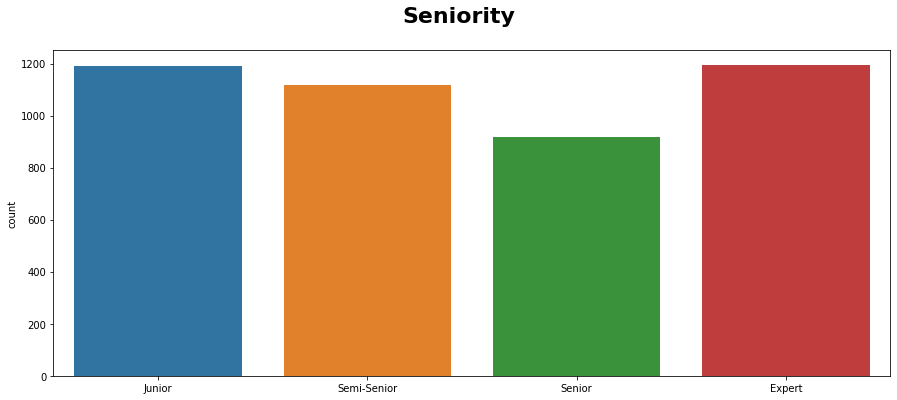

In [ ]:
sen_order = ['Junior','Semi-Senior','Senior','Expert']
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='Seniority',data=data, order=sen_order)
fig.suptitle("Seniority",fontsize = 22,fontweight = 'bold')
ax.set_xlabel(xlabel='')
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [ ]:
dummy_seniority=pd.get_dummies(data['Seniority'],prefix='Exp')
dummy_seniority.drop(columns='Exp_Junior',inplace=True)
dummy_seniority

Exp_Expert  Exp_Semi-Senior  Exp_Senior
0              0                0           1
1              0                0           0
2              0                0           0
3              0                0           0
4              0                0           0
...          ...              ...         ...
4411           0                1           0
4412           0                0           0
4413           0                0           1
4414           0                0           1
4415           1                0           0

[4416 rows x 3 columns]

Concatenamos las dummies con el dataframe

In [ ]:
data=pd.concat([data,dummy_seniority],axis=1)
data

Estoy trabajando en  Dónde estás trabajando Dedicación  \
0               Argentina              Catamarca  Full-Time   
1               Argentina                  Chaco  Full-Time   
2               Argentina                  Chaco  Full-Time   
3               Argentina                  Chaco  Full-Time   
4               Argentina                  Chaco  Full-Time   
...                   ...                    ...        ...   
4411            Argentina                Tucumán  Full-Time   
4412            Argentina                Tucumán  Full-Time   
4413            Argentina                Tucumán  Full-Time   
4414            Argentina                Tucumán  Full-Time   
4415            Argentina                Tucumán  Full-Time   

                                       Tipo de contrato  \
0                             Staff (planta permanente)   
1                         Remoto (empresa de otro país)   
2                             Staff (planta permanente)   
3                         Remoto (empresa de otro país)   
4                             Staff (planta permanente)   
...                                                 ...   
4411  Tercerizado (trabajo a través de consultora o ...   
4412                          Staff (planta permanente)   
4413                          Staff (planta permanente)   
4414                      Remoto (empresa de otro país)   
4415                          Staff (planta permanente)   

     Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                                300000            
1                                                900000            
2                                                120000            
3                                                440000            
4                                                140000            
...                                                 ...            
4411                                             110000            
4412                                             120000            
4413                                             150000            
4414                                             230000            
4415                                             450989            

     Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
0                            No                                        0   
1                            No                                        0   
2                     Un sueldo                                       20   
3                            No                                       54   
4                            No                                       15   
...                         ...                                      ...   
4411                         No                                      20%   
4412                         No                                        -   
4413         Menos de un sueldo                                       25   
4414                         No                                      10%   
4415                         No                                       75   

                              Con qué beneficios contas         funcion  \
0     Abono de Internet, Clases de idiomas, Crédito ...         Infosec   
1     Capacitaciones y/o cursos, Clases de idiomas, ...       Developer   
2                                    Horarios flexibles       Developer   
3                             Ninguna de las anteriores       Developer   
4     Vacaciones flexibles (adicionales a las reglam...       Developer   
...                                                 ...             ...   
4411  Abono de Internet, Capacitaciones y/o cursos, ...   Data Engineer   
4412  Abono de Internet, Descuento en gimnasios / Cl...     QA / Tester   
4413  Capacitaciones y/o cursos, Descuento en gimnas...  Recruiter / HR   
4414  Abono de Internet, Capacitaciones y/o cursos, ...    

## Columna Antigüedad en la empresa actual



### Gráfico

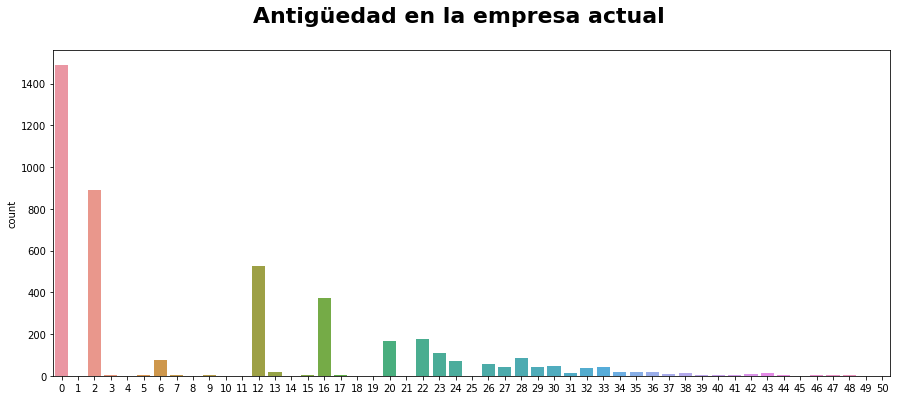

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='Antigüedad en la empresa actual',data=data)
fig.suptitle("Antigüedad en la empresa actual",fontsize = 22,fontweight = 'bold')
ax.set_xlabel(xlabel='')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

## Columna cantidad de personas en la organización

In [ ]:
data['Cantidad de personas en tu organización']=data['Cantidad de personas en tu organización'].replace(['1 (solamente yo)','De 2 a 10 personas','De 11  a 50  personas'],['1-50','1-50','1-50'])
data['Cantidad de personas en tu organización']=data['Cantidad de personas en tu organización'].replace(['De 51 a 100 personas','De 101 a 200 personas','De 201 a 500 personas',],['51-500','51-500','51-500'])
data['Cantidad de personas en tu organización']=data['Cantidad de personas en tu organización'].replace(['De 501 a 1000 personas','De 1001 a 2000 personas','De 2001a 5000 personas','De 5001 a 10000 personas','Más de 10000 personas'],['>500','>500','>500','>500','>500'])


### Gráfico

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


>500      1883
51-500    1644
1-50       889
Name: Cantidad de personas en tu organización, dtype: int64

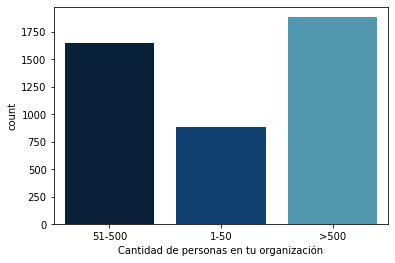

In [ ]:
sns.countplot(data['Cantidad de personas en tu organización'],palette='ocean')
data['Cantidad de personas en tu organización'].value_counts()

In [ ]:
dummy_cantidaddepersonas=pd.get_dummies(data['Cantidad de personas en tu organización'],prefix='Personas_en_tu_organización')
dummy_cantidaddepersonas.drop(columns='Personas_en_tu_organización_1-50',inplace=True)
dummy_cantidaddepersonas

Personas_en_tu_organización_51-500  Personas_en_tu_organización_>500
0                                      1                                 0
1                                      1                                 0
2                                      0                                 0
3                                      0                                 1
4                                      0                                 0
...                                  ...                               ...
4411                                   1                                 0
4412                                   0                                 0
4413                                   1                                 0
4414                                   0                                 1
4415                                   0                                 1

[4416 rows x 2 columns]

In [ ]:
data=pd.concat([data,dummy_cantidaddepersonas],axis=1)
data

Estoy trabajando en  Dónde estás trabajando Dedicación  \
0               Argentina              Catamarca  Full-Time   
1               Argentina                  Chaco  Full-Time   
2               Argentina                  Chaco  Full-Time   
3               Argentina                  Chaco  Full-Time   
4               Argentina                  Chaco  Full-Time   
...                   ...                    ...        ...   
4411            Argentina                Tucumán  Full-Time   
4412            Argentina                Tucumán  Full-Time   
4413            Argentina                Tucumán  Full-Time   
4414            Argentina                Tucumán  Full-Time   
4415            Argentina                Tucumán  Full-Time   

                                       Tipo de contrato  \
0                             Staff (planta permanente)   
1                         Remoto (empresa de otro país)   
2                             Staff (planta permanente)   
3                         Remoto (empresa de otro país)   
4                             Staff (planta permanente)   
...                                                 ...   
4411  Tercerizado (trabajo a través de consultora o ...   
4412                          Staff (planta permanente)   
4413                          Staff (planta permanente)   
4414                      Remoto (empresa de otro país)   
4415                          Staff (planta permanente)   

     Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                                300000            
1                                                900000            
2                                                120000            
3                                                440000            
4                                                140000            
...                                                 ...            
4411                                             110000            
4412                                             120000            
4413                                             150000            
4414                                             230000            
4415                                             450989            

     Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
0                            No                                        0   
1                            No                                        0   
2                     Un sueldo                                       20   
3                            No                                       54   
4                            No                                       15   
...                         ...                                      ...   
4411                         No                                      20%   
4412                         No                                        -   
4413         Menos de un sueldo                                       25   
4414                         No                                      10%   
4415                         No                                       75   

                              Con qué beneficios contas         funcion  \
0     Abono de Internet, Clases de idiomas, Crédito ...         Infosec   
1     Capacitaciones y/o cursos, Clases de idiomas, ...       Developer   
2                                    Horarios flexibles       Developer   
3                             Ninguna de las anteriores       Developer   
4     Vacaciones flexibles (adicionales a las reglam...       Developer   
...                                                 ...             ...   
4411  Abono de Internet, Capacitaciones y/o cursos, ...   Data Engineer   
4412  Abono de Internet, Descuento en gimnasios / Cl...     QA / Tester   
4413  Capacitaciones y/o cursos, Descuento en gimnas...  Recruiter / HR   
4414  Abono de Internet, Capacitaciones y/o cursos, ...    

##Columna personas a cargo

In [ ]:
data.rename(columns={'¿Cuántas personas a cargo tenés? ':'PersonasACargo'},inplace=True)
data['PersonasACargo']=data.PersonasACargo.astype('int')

### Gráfico

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0      3178
1-5     691
>5      547
Name: PersonasACargo, dtype: int64

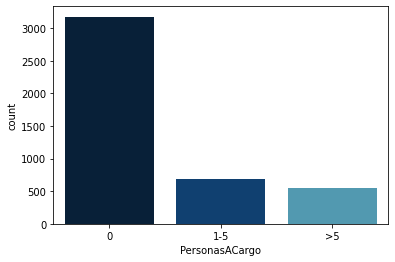

In [ ]:
for i in range (1,5):
  data['PersonasACargo']=data['PersonasACargo'].replace([i],['1-5'])
for i in range (5,271):
  data['PersonasACargo']=data['PersonasACargo'].replace([i],['>5'])  
#Graafico
sns.countplot(data['PersonasACargo'],palette='ocean')
data.PersonasACargo.value_counts()

In [ ]:
dummy_personasacargo=pd.get_dummies(data['PersonasACargo'],prefix='PersonasACargo')
dummy_personasacargo.drop(columns='PersonasACargo_0',inplace=True)
dummy_personasacargo

PersonasACargo_1-5  PersonasACargo_>5
0                      0                  0
1                      0                  0
2                      0                  0
3                      0                  0
4                      0                  0
...                  ...                ...
4411                   0                  0
4412                   0                  0
4413                   0                  0
4414                   0                  0
4415                   0                  1

[4416 rows x 2 columns]

In [ ]:
data=pd.concat([data,dummy_personasacargo],axis=1)
data

Estoy trabajando en  Dónde estás trabajando Dedicación  \
0               Argentina              Catamarca  Full-Time   
1               Argentina                  Chaco  Full-Time   
2               Argentina                  Chaco  Full-Time   
3               Argentina                  Chaco  Full-Time   
4               Argentina                  Chaco  Full-Time   
...                   ...                    ...        ...   
4411            Argentina                Tucumán  Full-Time   
4412            Argentina                Tucumán  Full-Time   
4413            Argentina                Tucumán  Full-Time   
4414            Argentina                Tucumán  Full-Time   
4415            Argentina                Tucumán  Full-Time   

                                       Tipo de contrato  \
0                             Staff (planta permanente)   
1                         Remoto (empresa de otro país)   
2                             Staff (planta permanente)   
3                         Remoto (empresa de otro país)   
4                             Staff (planta permanente)   
...                                                 ...   
4411  Tercerizado (trabajo a través de consultora o ...   
4412                          Staff (planta permanente)   
4413                          Staff (planta permanente)   
4414                      Remoto (empresa de otro país)   
4415                          Staff (planta permanente)   

     Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                                300000            
1                                                900000            
2                                                120000            
3                                                440000            
4                                                140000            
...                                                 ...            
4411                                             110000            
4412                                             120000            
4413                                             150000            
4414                                             230000            
4415                                             450989            

     Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
0                            No                                        0   
1                            No                                        0   
2                     Un sueldo                                       20   
3                            No                                       54   
4                            No                                       15   
...                         ...                                      ...   
4411                         No                                      20%   
4412                         No                                        -   
4413         Menos de un sueldo                                       25   
4414                         No                                      10%   
4415                         No                                       75   

                              Con qué beneficios contas         funcion  \
0     Abono de Internet, Clases de idiomas, Crédito ...         Infosec   
1     Capacitaciones y/o cursos, Clases de idiomas, ...       Developer   
2                                    Horarios flexibles       Developer   
3                             Ninguna de las anteriores       Developer   
4     Vacaciones flexibles (adicionales a las reglam...       Developer   
...                                                 ...             ...   
4411  Abono de Internet, Capacitaciones y/o cursos, ...   Data Engineer   
4412  Abono de Internet, Descuento en gimnasios / Cl...     QA / Tester   
4413  Capacitaciones y/o cursos, Descuento en gimnas...  Recruiter / HR   
4414  Abono de Internet, Capacitaciones y/o cursos, ...    

##Columna Beneficios

In [ ]:
data['Con qué beneficios contas'].value_counts()

Ninguna de las anteriores                                                                                                                                                                                                                                             373
Horarios flexibles                                                                                                                                                                                                                                                    185
Capacitaciones y/o cursos, Horarios flexibles                                                                                                                                                                                                                          97
Capacitaciones y/o cursos                                                                                                                                                                                 

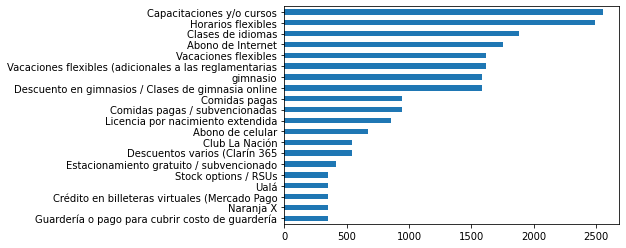

In [ ]:
all_benefits = ','.join(data['Con qué beneficios contas'].tolist())
benefits = set(x for x in [item.strip('.,-)()').strip() for s in data['Con qué beneficios contas'].tolist() for item in s.split(',')] if x not in ('','-', 'a', 'no', 'nada', 'Ninguna', 'etc', 'Ninguna de las anteriores'))
pd.Series({b: all_benefits.count(b) for b in benefits}).sort_values(ascending=True).tail(20).plot.barh();

In [ ]:
lista_beneficios = data['Con qué beneficios contas'].to_list() #pasamos los datos de la columna genero a lista
#Primero obtengo el dato de posición 
# Bucle columna funcion:

columna_beneficios = []

for opcion in lista_beneficios:

    if re.search(r'\bninguna\b', opcion, re.IGNORECASE):
        columna_beneficios.append(0)  # se guarda en float
    else:
        columna_beneficios.append(1)

data = data.assign(beneficios=columna_beneficios)  # crea una nueva columna y pone los datos de la lista

In [ ]:
data

Estoy trabajando en  Dónde estás trabajando Dedicación  \
0               Argentina              Catamarca  Full-Time   
1               Argentina                  Chaco  Full-Time   
2               Argentina                  Chaco  Full-Time   
3               Argentina                  Chaco  Full-Time   
4               Argentina                  Chaco  Full-Time   
...                   ...                    ...        ...   
4411            Argentina                Tucumán  Full-Time   
4412            Argentina                Tucumán  Full-Time   
4413            Argentina                Tucumán  Full-Time   
4414            Argentina                Tucumán  Full-Time   
4415            Argentina                Tucumán  Full-Time   

                                       Tipo de contrato  \
0                             Staff (planta permanente)   
1                         Remoto (empresa de otro país)   
2                             Staff (planta permanente)   
3                         Remoto (empresa de otro país)   
4                             Staff (planta permanente)   
...                                                 ...   
4411  Tercerizado (trabajo a través de consultora o ...   
4412                          Staff (planta permanente)   
4413                          Staff (planta permanente)   
4414                      Remoto (empresa de otro país)   
4415                          Staff (planta permanente)   

     Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                                300000            
1                                                900000            
2                                                120000            
3                                                440000            
4                                                140000            
...                                                 ...            
4411                                             110000            
4412                                             120000            
4413                                             150000            
4414                                             230000            
4415                                             450989            

     Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
0                            No                                        0   
1                            No                                        0   
2                     Un sueldo                                       20   
3                            No                                       54   
4                            No                                       15   
...                         ...                                      ...   
4411                         No                                      20%   
4412                         No                                        -   
4413         Menos de un sueldo                                       25   
4414                         No                                      10%   
4415                         No                                       75   

                              Con qué beneficios contas         funcion  \
0     Abono de Internet, Clases de idiomas, Crédito ...         Infosec   
1     Capacitaciones y/o cursos, Clases de idiomas, ...       Developer   
2                                    Horarios flexibles       Developer   
3                             Ninguna de las anteriores       Developer   
4     Vacaciones flexibles (adicionales a las reglam...       Developer   
...                                                 ...             ...   
4411  Abono de Internet, Capacitaciones y/o cursos, ...   Data Engineer   
4412  Abono de Internet, Descuento en gimnasios / Cl...     QA / Tester   
4413  Capacitaciones y/o cursos, Descuento en gimnas...  Recruiter / HR   
4414  Abono de Internet, Capacitaciones y/o cursos, ...    

In [ ]:
data['beneficios'].value_counts()

1    4020
0     396
Name: beneficios, dtype: int64

## Columna Carrera

De este columna podemos extraer quienes tienen formación en carreras de sistemas

In [ ]:
data['carrera2']=data['Carrera'].apply(str)

In [ ]:
lista_carrera = data.carrera2.to_list() #pasamos los datos de la columna genero a lista

In [ ]:
columna_carrera = []

for opcion in lista_carrera:

    if re.search(r'\bsistemas\b', opcion, re.IGNORECASE) or re.search(r'(\bcomputaci)', opcion, re.IGNORECASE) or re.search(r'(\bprograma)', opcion, re.IGNORECASE) or re.search(r'(\bdato)', opcion, re.IGNORECASE) or re.search(r'(\bsoft)', opcion, re.IGNORECASE) or re.search(r'\bdata\b', opcion, re.IGNORECASE):  
        columna_carrera.append(1)

    elif re.search(r'\binforma', opcion, re.IGNORECASE) :
        columna_carrera.append(1)

    elif re.search(r'\bdesarrollo\b', opcion, re.IGNORECASE) :
        columna_carrera.append(1)
    elif re.search(r'\devel\b', opcion, re.IGNORECASE) or re.search(r'\devop\b', opcion, re.IGNORECASE):
        columna_carrera.append(1)

    else:
        columna_carrera.append(0)

data = data.assign(carrera_sist=columna_carrera)  # crea una nueva columna y pone los datos de la lista

In [ ]:
data['carrera_sist'].value_counts()

0    3231
1    1185
Name: carrera_sist, dtype: int64

### Gráfico

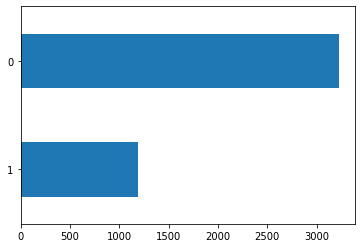

In [ ]:
data['carrera_sist'].value_counts(ascending=True).tail(10).plot.barh();

## Columna Máximo nivel educativo y Estado

Se va a unir las columnas de máximo nivel educativo y estado en una sola

In [ ]:
data['max_educ']=data['Máximo nivel de estudios'].apply(str)
lista_educ = data.max_educ.to_list() #pasamos los datos de la columna genero a lista


columna_educ = []

for opcion in lista_educ:

    if re.search(r'\bsecundario\b', opcion, re.IGNORECASE):  
        columna_educ.append("secundario")

    elif re.search(r'\bterciario\b', opcion, re.IGNORECASE) :
        columna_educ.append("terciario")

    elif re.search(r'\buniversitario\b', opcion, re.IGNORECASE) :
        columna_educ.append("universitario")

    elif re.search(r'\bdoctorado\b', opcion, re.IGNORECASE) or re.search(r'(\bposgrado)', opcion, re.IGNORECASE) or re.search(r'\bposdoctorado\b', opcion, re.IGNORECASE) or re.search(r'(\bmaestr)', opcion, re.IGNORECASE) :
        columna_educ.append("superior universitario")
 

    else:
        columna_educ.append(None)

data = data.assign(max_educ2=columna_educ)  # crea una nueva columna y pone los datos de la lista

In [ ]:
data['max_educ2'].value_counts()

universitario             1480
terciario                  334
superior universitario     238
secundario                 100
Name: max_educ2, dtype: int64

In [ ]:
data['estado_educ']=data['Estado'].apply(str)
lista_estado = data.estado_educ.to_list() #pasamos los datos de la columna genero a lista


columna_estado = []

for opcion in lista_estado:

    if re.search(r'\bcompleto\b', opcion, re.IGNORECASE):  
        columna_estado.append("completo")

    elif re.search(r'\bincompleto\b', opcion, re.IGNORECASE) or re.search(r'(\bcurso)', opcion, re.IGNORECASE)  :
        columna_estado.append("incompleto")
 

    else:
        columna_estado.append(None)

data = data.assign(estado_educ2=columna_estado)  # crea una nueva columna y pone los datos de la lista

In [ ]:
data['estado_educ2'].value_counts()

incompleto    1148
completo      1004
Name: estado_educ2, dtype: int64

In [ ]:
data["max_educ3"]= data["max_educ2"] + " " + data["estado_educ2"]

In [ ]:
data['max_educ3'].value_counts()

universitario incompleto             880
universitario completo               600
terciario completo                   182
terciario incompleto                 152
superior universitario completo      133
superior universitario incompleto    105
secundario completo                   89
secundario incompleto                 11
Name: max_educ3, dtype: int64

In [ ]:
data_educ = pd.get_dummies(data.max_educ3, prefix='edu')
data_educ

edu_secundario completo  edu_secundario incompleto  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   
...                       ...                        ...   
4411                        0                          0   
4412                        0                          0   
4413                        0                          0   
4414                        0                          0   
4415                        0                          0   

      edu_superior universitario completo  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
4411                                    0   
4412                                    0   
4413                                    0   
4414                                    0   
4415                                    0   

      edu_superior universitario incompleto  edu_terciario completo  \
0                                         0                       0   
1                                         0                       0   
2                                         0                       0   
3                                         0                       0   
4                                         0                       0   
...                                     ...                     ...   
4411                                      0                       0   
4412                                      0                       0   
4413                                      0                       0   
4414                                      0                       0   
4415                                      0                       0   

      edu_terciario incompleto  edu_universitario completo  \
0                            0                           1   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
4411                         0                           0   
4412                         0                           0   
4413                         0                           0   
4414                         0                           0   
4415                         0                           0   

      edu_universitario incompleto  
0                                0  
1                                0  
2                                0  
3                                0  
4                                0  
...                            ...  
4411                             1  
4412                             0  
4413                             0  
4414                             0  
4415                             1  

[4416 rows x 8 columns]

In [ ]:
data=pd.concat([data,data_educ],axis=1)
data

Estoy trabajando en  Dónde estás trabajando Dedicación  \
0               Argentina              Catamarca  Full-Time   
1               Argentina                  Chaco  Full-Time   
2               Argentina                  Chaco  Full-Time   
3               Argentina                  Chaco  Full-Time   
4               Argentina                  Chaco  Full-Time   
...                   ...                    ...        ...   
4411            Argentina                Tucumán  Full-Time   
4412            Argentina                Tucumán  Full-Time   
4413            Argentina                Tucumán  Full-Time   
4414            Argentina                Tucumán  Full-Time   
4415            Argentina                Tucumán  Full-Time   

                                       Tipo de contrato  \
0                             Staff (planta permanente)   
1                         Remoto (empresa de otro país)   
2                             Staff (planta permanente)   
3                         Remoto (empresa de otro país)   
4                             Staff (planta permanente)   
...                                                 ...   
4411  Tercerizado (trabajo a través de consultora o ...   
4412                          Staff (planta permanente)   
4413                          Staff (planta permanente)   
4414                      Remoto (empresa de otro país)   
4415                          Staff (planta permanente)   

     Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                                300000            
1                                                900000            
2                                                120000            
3                                                440000            
4                                                140000            
...                                                 ...            
4411                                             110000            
4412                                             120000            
4413                                             150000            
4414                                             230000            
4415                                             450989            

     Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
0                            No                                        0   
1                            No                                        0   
2                     Un sueldo                                       20   
3                            No                                       54   
4                            No                                       15   
...                         ...                                      ...   
4411                         No                                      20%   
4412                         No                                        -   
4413         Menos de un sueldo                                       25   
4414                         No                                      10%   
4415                         No                                       75   

                              Con qué beneficios contas         funcion  \
0     Abono de Internet, Clases de idiomas, Crédito ...         Infosec   
1     Capacitaciones y/o cursos, Clases de idiomas, ...       Developer   
2                                    Horarios flexibles       Developer   
3                             Ninguna de las anteriores       Developer   
4     Vacaciones flexibles (adicionales a las reglam...       Developer   
...                                                 ...             ...   
4411  Abono de Internet, Capacitaciones y/o cursos, ...   Data Engineer   
4412  Abono de Internet, Descuento en gimnasios / Cl...     QA / Tester   
4413  Capacitaciones y/o cursos, Descuento en gimnas...  Recruiter / HR   
4414  Abono de Internet, Capacitaciones y/o cursos, ...    

# Modelo de Regresión

In [ ]:
data.drop(columns='ID',inplace=True)
data

Estoy trabajando en  Dónde estás trabajando Dedicación  \
0               Argentina              Catamarca  Full-Time   
1               Argentina                  Chaco  Full-Time   
2               Argentina                  Chaco  Full-Time   
3               Argentina                  Chaco  Full-Time   
4               Argentina                  Chaco  Full-Time   
...                   ...                    ...        ...   
4411            Argentina                Tucumán  Full-Time   
4412            Argentina                Tucumán  Full-Time   
4413            Argentina                Tucumán  Full-Time   
4414            Argentina                Tucumán  Full-Time   
4415            Argentina                Tucumán  Full-Time   

                                       Tipo de contrato  \
0                             Staff (planta permanente)   
1                         Remoto (empresa de otro país)   
2                             Staff (planta permanente)   
3                         Remoto (empresa de otro país)   
4                             Staff (planta permanente)   
...                                                 ...   
4411  Tercerizado (trabajo a través de consultora o ...   
4412                          Staff (planta permanente)   
4413                          Staff (planta permanente)   
4414                      Remoto (empresa de otro país)   
4415                          Staff (planta permanente)   

     Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                                300000            
1                                                900000            
2                                                120000            
3                                                440000            
4                                                140000            
...                                                 ...            
4411                                             110000            
4412                                             120000            
4413                                             150000            
4414                                             230000            
4415                                             450989            

     Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
0                            No                                        0   
1                            No                                        0   
2                     Un sueldo                                       20   
3                            No                                       54   
4                            No                                       15   
...                         ...                                      ...   
4411                         No                                      20%   
4412                         No                                        -   
4413         Menos de un sueldo                                       25   
4414                         No                                      10%   
4415                         No                                       75   

                              Con qué beneficios contas         funcion  \
0     Abono de Internet, Clases de idiomas, Crédito ...         Infosec   
1     Capacitaciones y/o cursos, Clases de idiomas, ...       Developer   
2                                    Horarios flexibles       Developer   
3                             Ninguna de las anteriores       Developer   
4     Vacaciones flexibles (adicionales a las reglam...       Developer   
...                                                 ...             ...   
4411  Abono de Internet, Capacitaciones y/o cursos, ...   Data Engineer   
4412  Abono de Internet, Descuento en gimnasios / Cl...     QA / Tester   
4413  Capacitaciones y/o cursos, Descuento en gimnas...  Recruiter / HR   
4414  Abono de Internet, Capacitaciones y/o cursos, ...    

Revisamos la matriz de correlación para evitar multicolinealidad en el modelo

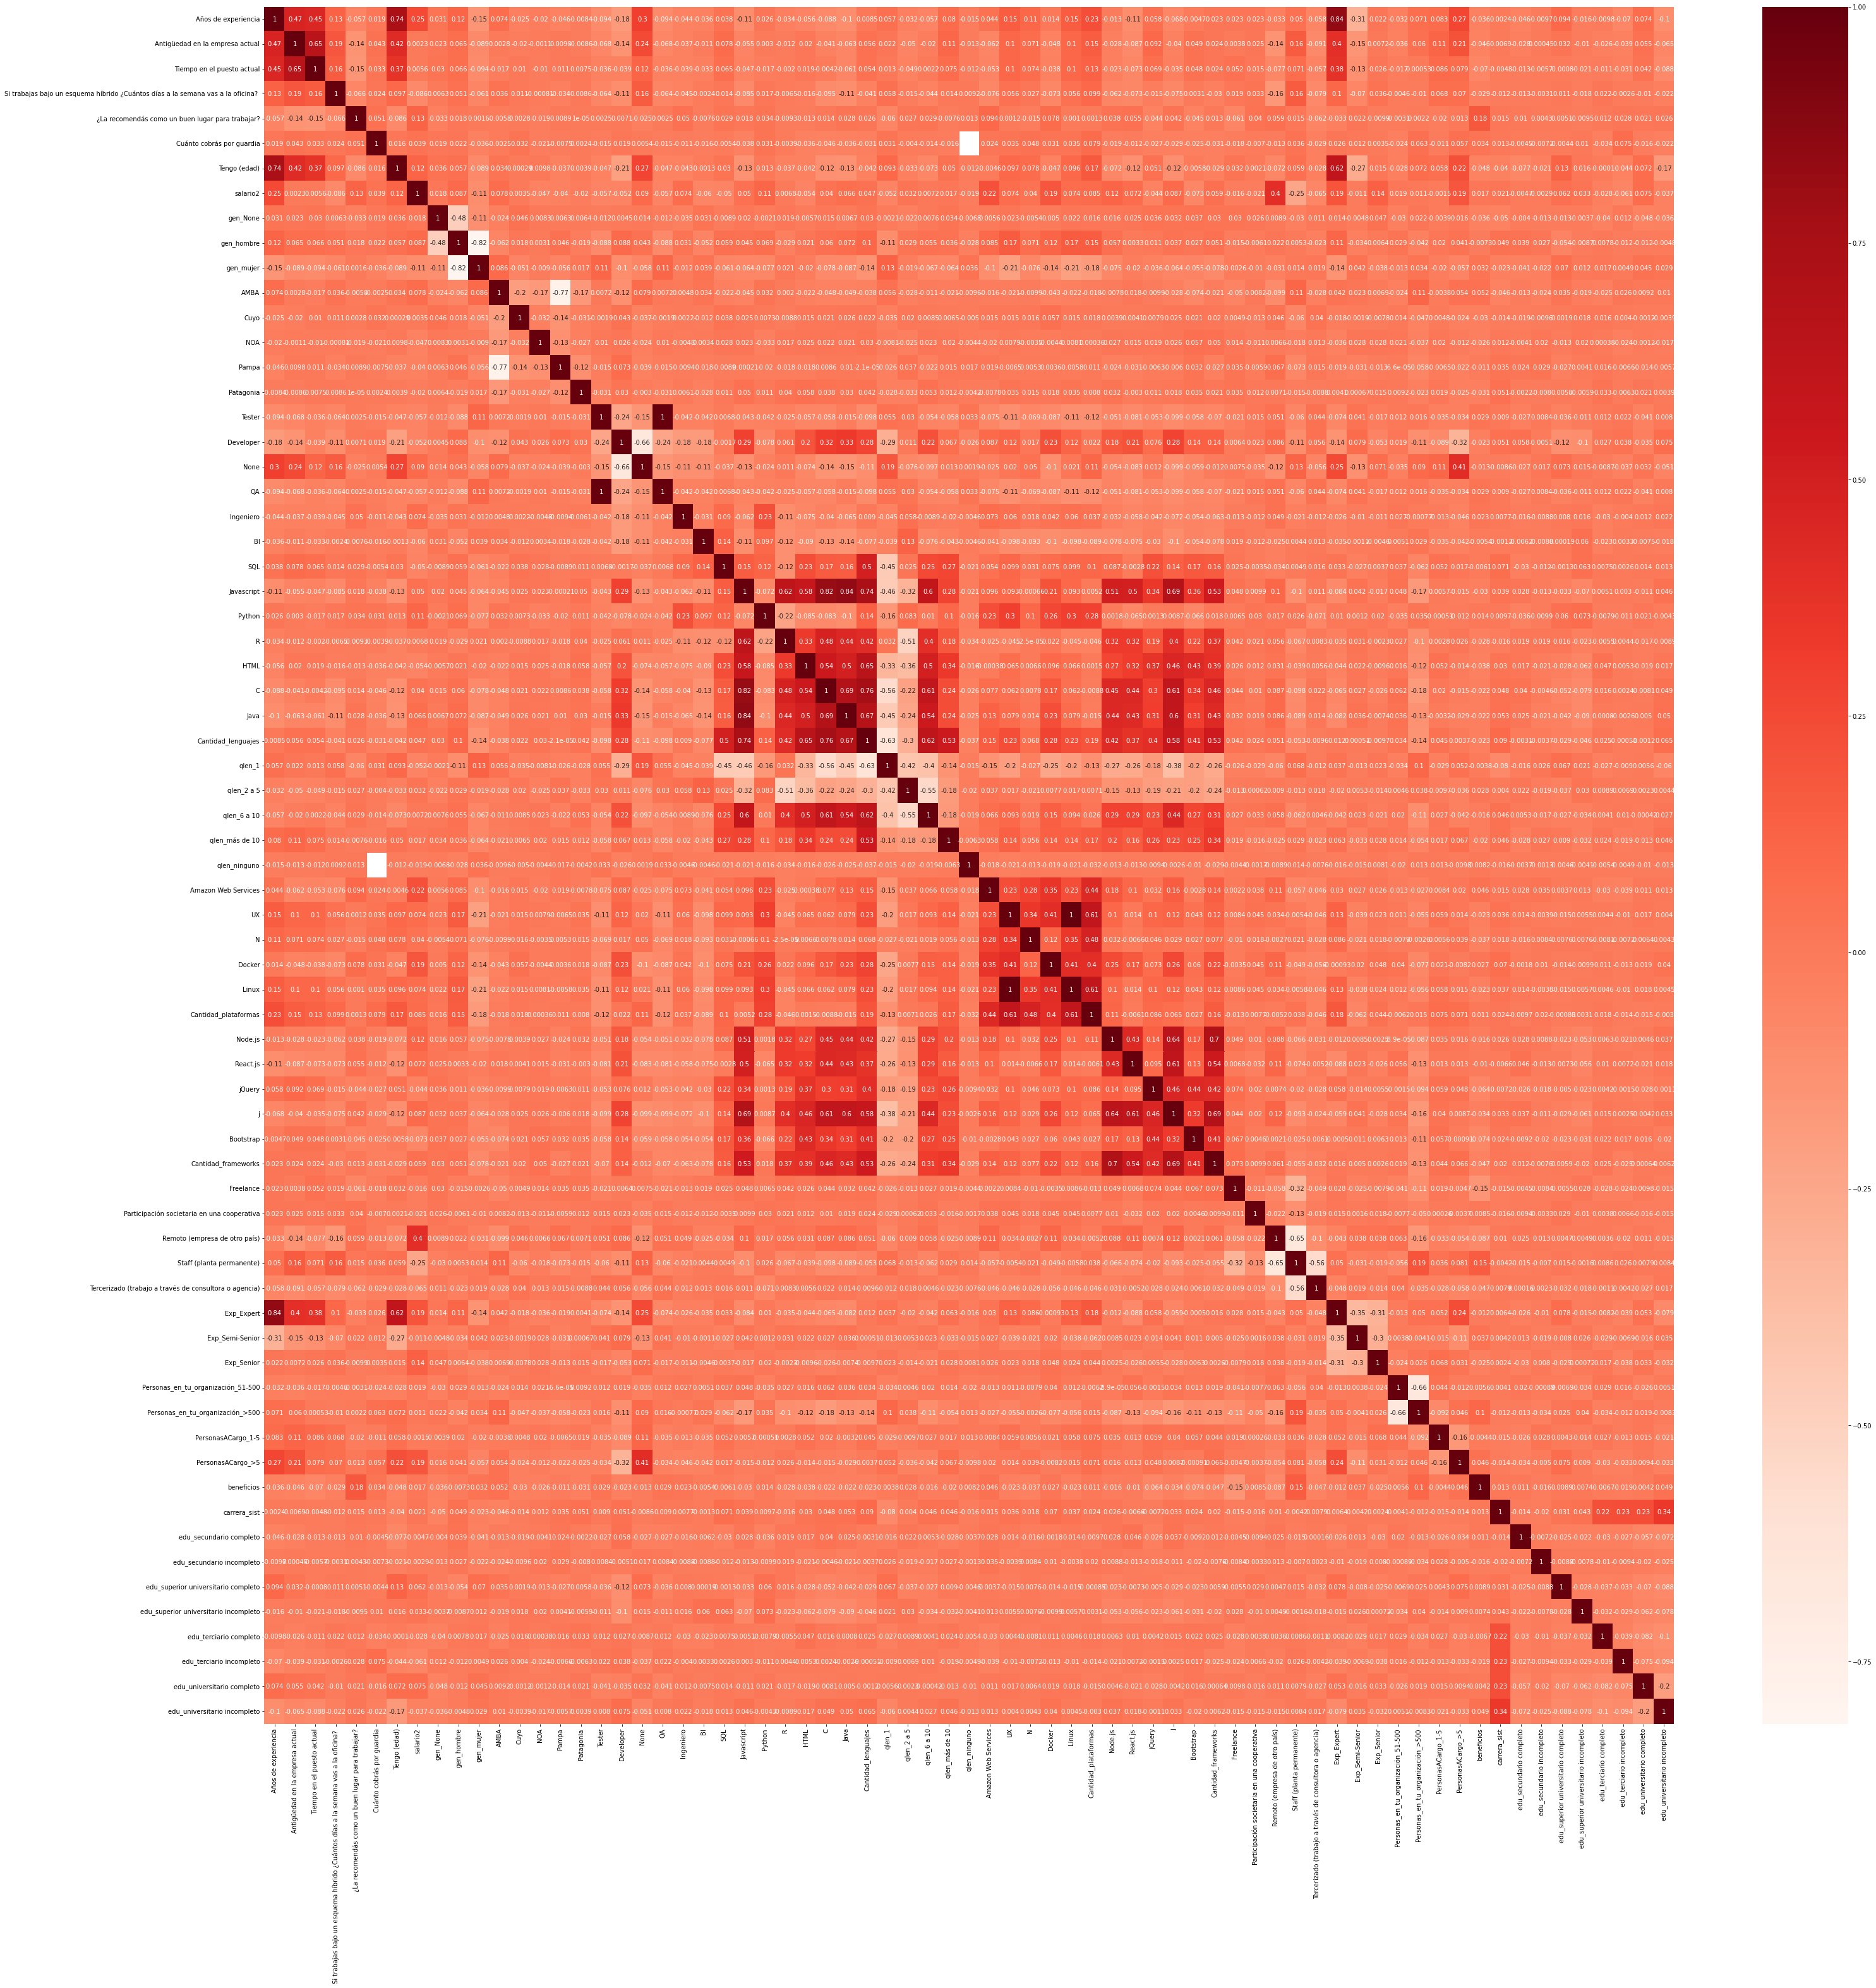

In [ ]:
plt.figure(figsize=(50,50))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

Creamos las columnas con variable dependiente e independientes

Vamos a utilizar todas las variables en primer lugar y luego eliminaremos aquellas que no sean significativas para el modelo. Agregaremos de cada modelo los resultados en un dataframe para comparar los mismos. Aquellas con multicolinealidad primero deberán ser significativas para luego verificar la misma.

In [ ]:
columns_names = data.columns.values
columns_names

array(['Estoy trabajando en ', 'Dónde estás trabajando', 'Dedicación',
       'Tipo de contrato',
       'Último salario mensual  o retiro BRUTO (en tu moneda local)',
       'Recibís algún tipo de bono',
       '¿De qué % fue el ajuste total acumulado?',
       'Con qué beneficios contas', 'funcion', 'Años de experiencia',
       'Antigüedad en la empresa actual', 'Tiempo en el puesto actual',
       'PersonasACargo', 'Plataformas que utilizas en tu puesto actual ',
       'Lenguajes de programación o tecnologías que utilices en tu puesto actual',
       'Frameworks, herramientas y librerías que utilices en tu puesto actual',
       'Bases de datos', 'QA / Testing',
       'Cantidad de personas en tu organización', 'Modalidad de trabajo',
       'Si trabajas bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina? ',
       '¿La recomendás como un buen lugar para trabajar?',
       'Máximo nivel de estudios', 'Estado', 'Carrera', 'Universidad ',
       '¿Participaste de alg

Creamos dataframe para comparar resultados

In [ ]:
resultados=pd.DataFrame(columns={'parametro','score','modelo'})
resultados

Empty DataFrame
Columns: [parametro, score, modelo]
Index: []

In [ ]:
y=data['salario2']
feature_cols =['Años de experiencia','Antigüedad en la empresa actual',
        'Tiempo en el puesto actual',
       'Tengo (edad)','gen_hombre','AMBA',
       'Cuyo', 'NOA', 'Pampa', 'Patagonia','Developer', 'BI', 'QA', 'Tester', 'Ingeniero', 'Java',
       'Python', 'SQL', 'Javascript', 'HTML', 'C', 'R',
       'Cantidad_lenguajes', 'qlen_1', 'qlen_2 a 5',
       'qlen_6 a 10', 'qlen_más de 10', 'Docker', 'Linux',
       'N', 'UX', 'Amazon Web Services', 'Cantidad_plataformas',
       'React.js', 'jQuery', 'j', 'Node.js', 'Bootstrap',
       'Cantidad_frameworks', 'Freelance',
       'Participación societaria en una cooperativa',
       'Remoto (empresa de otro país)', 'Staff (planta permanente)',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Exp_Expert', 'Exp_Semi-Senior', 'Exp_Senior',
       'Personas_en_tu_organización_51-500',
       'Personas_en_tu_organización_>500', 'PersonasACargo_1-5',
       'PersonasACargo_>5', 'beneficios', 'carrera_sist',
       'edu_secundario completo',
       'edu_superior universitario completo',
       'edu_superior universitario incompleto', 'edu_terciario completo',
       'edu_terciario incompleto', 'edu_universitario completo',
       'edu_universitario incompleto']

X = data[feature_cols]
X = sm.add_constant(X)
model_reg1 = sm.OLS(y, X).fit()
resultados=resultados.append({'modelo':'Regresion_full','parametro':'r2','score':model_reg1.rsquared},ignore_index=True)
print (model_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:               salario2   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     46.28
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:24:17   Log-Likelihood:                -60808.
No. Observations:                4416   AIC:                         1.217e+05
Df Residuals:                    4357   BIC:                         1.221e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Eliminamos columnas no significativas

In [ ]:
y=data['salario2']
feature_cols =['Años de experiencia','Antigüedad en la empresa actual',
        'Tiempo en el puesto actual',
       'Tengo (edad)','gen_hombre','AMBA',
       'Cuyo', 'Pampa', 'Developer', 'BI', 'QA', 'Tester', 'Ingeniero', 'Java',
       'Python', 'SQL', 'HTML', 'R',
       'Cantidad_lenguajes','Docker', 'Amazon Web Services', 'Cantidad_plataformas',
       'jQuery', 'j', 'Node.js', 'Bootstrap',
       'Participación societaria en una cooperativa',
       'Remoto (empresa de otro país)', 'Staff (planta permanente)',
       'Exp_Expert', 'Exp_Semi-Senior', 'Exp_Senior',
       'Personas_en_tu_organización_51-500',
       'Personas_en_tu_organización_>500', 'PersonasACargo_>5', 'beneficios',
       'edu_superior universitario completo',
       'edu_superior universitario incompleto','edu_universitario completo']
X = data[feature_cols]
X = sm.add_constant(X)
model_reg2 = sm.OLS(y, X).fit()
resultados=resultados.append({'modelo':'Regresion_red1','score':model_reg2.rsquared,'parametro':'r2'},ignore_index=True)
print (model_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:               salario2   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     70.35
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:24:18   Log-Likelihood:                -60816.
No. Observations:                4416   AIC:                         1.217e+05
Df Residuals:                    4377   BIC:                         1.220e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Probamos la regresión con el logaritmo del salario

In [ ]:
y=np.log(data['salario2'])
feature_cols =['Años de experiencia','Antigüedad en la empresa actual',
        'Tiempo en el puesto actual',
       'Tengo (edad)','gen_hombre','AMBA',
       'Cuyo', 'NOA', 'Pampa', 'Patagonia','Developer', 'BI', 'QA', 'Tester', 'Ingeniero', 'Java',
       'Python', 'SQL', 'Javascript', 'HTML', 'C', 'R',
       'Cantidad_lenguajes', 'qlen_1', 'qlen_2 a 5',
       'qlen_6 a 10', 'qlen_más de 10', 'Docker', 'Linux',
       'N', 'UX', 'Amazon Web Services', 'Cantidad_plataformas',
       'React.js', 'jQuery', 'j', 'Node.js', 'Bootstrap',
       'Cantidad_frameworks', 'Freelance',
       'Participación societaria en una cooperativa',
       'Remoto (empresa de otro país)', 'Staff (planta permanente)',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Exp_Expert', 'Exp_Semi-Senior', 'Exp_Senior',
       'Personas_en_tu_organización_51-500',
       'Personas_en_tu_organización_>500', 'PersonasACargo_1-5',
       'PersonasACargo_>5', 'beneficios', 'carrera_sist',
       'edu_secundario completo',
       'edu_superior universitario completo',
       'edu_superior universitario incompleto', 'edu_terciario completo',
       'edu_terciario incompleto', 'edu_universitario completo',
       'edu_universitario incompleto']
X = data[feature_cols]
X = sm.add_constant(X)
model_reg3 = sm.OLS(y, X).fit()
resultados=resultados.append({'modelo':'Regresion_log_full','score':model_reg3.rsquared,'parametro':'r2'},ignore_index=True)
print (model_reg3.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:               salario2   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     62.61
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:24:18   Log-Likelihood:                -2821.6
No. Observations:                4416   AIC:                             5761.
Df Residuals:                    4357   BIC:                             6138.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

Eliminamos columnas no significativas

In [ ]:
y=np.log(data['salario2'])
feature_cols =['Años de experiencia','Antigüedad en la empresa actual',
        'Tiempo en el puesto actual',
       'gen_hombre','AMBA',
       'Cuyo', 'Pampa', 'Developer', 'BI', 'QA', 'Tester', 'Ingeniero', 'Java',
       'Python', 'SQL', 'HTML', 'R',
       'Cantidad_lenguajes', 'Docker', 'Amazon Web Services', 'Cantidad_plataformas',
       'jQuery', 'j', 'Node.js', 'Bootstrap',
       'Freelance',
       'Participación societaria en una cooperativa',
       'Remoto (empresa de otro país)', 'Staff (planta permanente)',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Exp_Expert', 'Exp_Semi-Senior', 'Exp_Senior',
       'Personas_en_tu_organización_51-500',
       'Personas_en_tu_organización_>500', 'PersonasACargo_1-5',
       'PersonasACargo_>5', 'beneficios', 'carrera_sist',
       'edu_superior universitario completo',
       'edu_superior universitario incompleto', 'edu_terciario completo',
       'edu_terciario incompleto', 'edu_universitario completo',
       'edu_universitario incompleto']
X = data[feature_cols]
X = sm.add_constant(X)
model_reg4 = sm.OLS(y, X).fit()
resultados=resultados.append({'modelo':'Regresion_log_red','score':model_reg4.rsquared,'parametro':'r2'},ignore_index=True)
print (model_reg4.summary())

                            OLS Regression Results                            
Dep. Variable:               salario2   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     84.31
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:24:18   Log-Likelihood:                -2826.8
No. Observations:                4416   AIC:                             5742.
Df Residuals:                    4372   BIC:                             6023.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Evaluamos el modelo solo para aquellos que son Developers (pueden tener también otra función)

In [ ]:
data2=data[data['Developer']==1]
data2

Estoy trabajando en  Dónde estás trabajando Dedicación  \
1               Argentina                  Chaco  Full-Time   
2               Argentina                  Chaco  Full-Time   
3               Argentina                  Chaco  Full-Time   
4               Argentina                  Chaco  Full-Time   
7               Argentina                  Chaco  Full-Time   
...                   ...                    ...        ...   
4404            Argentina                Tucumán  Full-Time   
4405            Argentina                Tucumán  Full-Time   
4406            Argentina                Tucumán  Full-Time   
4408            Argentina                Tucumán  Full-Time   
4409            Argentina                Tucumán  Full-Time   

                                       Tipo de contrato  \
1                         Remoto (empresa de otro país)   
2                             Staff (planta permanente)   
3                         Remoto (empresa de otro país)   
4                             Staff (planta permanente)   
7                             Staff (planta permanente)   
...                                                 ...   
4404                          Staff (planta permanente)   
4405  Tercerizado (trabajo a través de consultora o ...   
4406                          Staff (planta permanente)   
4408                          Staff (planta permanente)   
4409  Tercerizado (trabajo a través de consultora o ...   

     Último salario mensual  o retiro BRUTO (en tu moneda local)  \
1                                                900000            
2                                                120000            
3                                                440000            
4                                                140000            
7                                                157000            
...                                                 ...            
4404                                             200000            
4405                                             163870            
4406                                             206000            
4408                                             314000            
4409                                             430000            

     Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
1                            No                                        0   
2                     Un sueldo                                       20   
3                            No                                       54   
4                            No                                       15   
7            Menos de un sueldo                                        5   
...                         ...                                      ...   
4404                         No                                       12   
4405                  Un sueldo                                       40   
4406                         No                                       50   
4408                         No                                       35   
4409                         No                                       18   

                              Con qué beneficios contas  \
1     Capacitaciones y/o cursos, Clases de idiomas, ...   
2                                    Horarios flexibles   
3                             Ninguna de las anteriores   
4     Vacaciones flexibles (adicionales a las reglam...   
7     Capacitaciones y/o cursos, Crédito en billeter...   
...                                                 ...   
4404  Abono de Internet, Capacitaciones y/o cursos, ...   
4405  Capacitaciones y/o cursos, Clases de idiomas, ...   
4406  Capacitaciones y/o cursos, Clases de idiomas, ...   
4408  Abono de Internet, Descuento en gimnasios / Cl...   
4409       Capacitaciones y/o cursos, Clases de idiomas   

                      funcion  Años de experiencia  ...  estado_educ2  \
1                   Develop

In [ ]:
y=np.log(data2['salario2'])
feature_cols =['Años de experiencia','Antigüedad en la empresa actual',
        'Tiempo en el puesto actual',
       'Tengo (edad)','gen_hombre','AMBA',
       'Cuyo', 'NOA', 'Pampa', 'Patagonia','Developer', 'BI', 'QA', 'Tester', 'Ingeniero', 'Java',
       'Python', 'SQL', 'Javascript', 'HTML', 'C', 'R',
       'Cantidad_lenguajes', 'qlen_1', 'qlen_2 a 5',
       'qlen_6 a 10', 'qlen_más de 10', 'Docker', 'Linux',
       'N', 'UX', 'Amazon Web Services', 'Cantidad_plataformas',
       'React.js', 'jQuery', 'j', 'Node.js', 'Bootstrap',
       'Cantidad_frameworks', 'Freelance',
       'Participación societaria en una cooperativa',
       'Remoto (empresa de otro país)', 'Staff (planta permanente)',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Exp_Expert', 'Exp_Semi-Senior', 'Exp_Senior',
       'Personas_en_tu_organización_51-500',
       'Personas_en_tu_organización_>500', 'PersonasACargo_1-5',
       'PersonasACargo_>5', 'beneficios', 'carrera_sist',
       'edu_secundario completo',
       'edu_superior universitario completo',
       'edu_superior universitario incompleto', 'edu_terciario completo',
       'edu_terciario incompleto', 'edu_universitario completo',
       'edu_universitario incompleto']
X = data2[feature_cols]
X = sm.add_constant(X)
model_reg5 = sm.OLS(y, X).fit()
resultados=resultados.append({'modelo':'Regresion_develop_full','score':model_reg5.rsquared,'parametro':'r2'},ignore_index=True)
print (model_reg5.summary())

                            OLS Regression Results                            
Dep. Variable:               salario2   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     36.89
Date:                Tue, 22 Nov 2022   Prob (F-statistic):          2.56e-260
Time:                        00:24:18   Log-Likelihood:                -1373.9
No. Observations:                2233   AIC:                             2856.
Df Residuals:                    2179   BIC:                             3164.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
data3=data[data['carrera_sist']==1]
data3

Estoy trabajando en  Dónde estás trabajando Dedicación  \
0               Argentina              Catamarca  Full-Time   
5               Argentina                  Chaco  Full-Time   
6               Argentina                  Chaco  Full-Time   
8               Argentina                  Chaco  Full-Time   
10              Argentina                  Chaco  Full-Time   
...                   ...                    ...        ...   
4401            Argentina                Tucumán  Full-Time   
4405            Argentina                Tucumán  Full-Time   
4406            Argentina                Tucumán  Full-Time   
4411            Argentina                Tucumán  Full-Time   
4415            Argentina                Tucumán  Full-Time   

                                       Tipo de contrato  \
0                             Staff (planta permanente)   
5                             Staff (planta permanente)   
6                             Staff (planta permanente)   
8                         Remoto (empresa de otro país)   
10                            Staff (planta permanente)   
...                                                 ...   
4401                          Staff (planta permanente)   
4405  Tercerizado (trabajo a través de consultora o ...   
4406                          Staff (planta permanente)   
4411  Tercerizado (trabajo a través de consultora o ...   
4415                          Staff (planta permanente)   

     Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                                300000            
5                                                633000            
6                                                110000            
8                                                190000            
10                                               280000            
...                                                 ...            
4401                                             546000            
4405                                             163870            
4406                                             206000            
4411                                             110000            
4415                                             450989            

     Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
0                            No                                        0   
5         De uno a tres sueldos                                       25   
6                            No                                        3   
8            Menos de un sueldo                                       30   
10           Menos de un sueldo                                      14%   
...                         ...                                      ...   
4401                  Un sueldo                                       40   
4405                  Un sueldo                                       40   
4406                         No                                       50   
4411                         No                                      20%   
4415                         No                                       75   

                              Con qué beneficios contas            funcion  \
0     Abono de Internet, Clases de idiomas, Crédito ...            Infosec   
5                                     Abono de Internet   Technical Leader   
6     Abono de Internet, Capacitaciones y/o cursos, ...        QA / Tester   
8     Descuento en gimnasios / Clases de gimnasia on...        QA / Tester   
10    Abono de celular, Abono de Internet, Capacitac...  Sales / Pre-Sales   
...                                                 ...                ...   
4401                                 Horarios flexibles          Developer   
4405  Capacitaciones y/o cursos, Clases de idiomas, ...          Developer   
4406  Capacitaciones y/o cursos, Clases de idiomas, ...          Developer   
4411  Abono de Internet, Capa

Son pocos registros, pero probamos de todas maneras

In [ ]:
y=np.log(data3['salario2'])
feature_cols =['Años de experiencia','Antigüedad en la empresa actual',
        'Tiempo en el puesto actual',
       'Tengo (edad)','gen_hombre','AMBA',
       'Cuyo', 'NOA', 'Pampa', 'Patagonia','Developer', 'BI', 'QA', 'Tester', 'Ingeniero', 'Java',
       'Python', 'SQL', 'Javascript', 'HTML', 'C', 'R',
       'Cantidad_lenguajes', 'qlen_1', 'qlen_2 a 5',
       'qlen_6 a 10', 'qlen_más de 10', 'Docker', 'Linux',
       'N', 'UX', 'Amazon Web Services', 'Cantidad_plataformas',
       'React.js', 'jQuery', 'j', 'Node.js', 'Bootstrap',
       'Cantidad_frameworks', 'Freelance',
       'Participación societaria en una cooperativa',
       'Remoto (empresa de otro país)', 'Staff (planta permanente)',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Exp_Expert', 'Exp_Semi-Senior', 'Exp_Senior',
       'Personas_en_tu_organización_51-500',
       'Personas_en_tu_organización_>500', 'PersonasACargo_1-5',
       'PersonasACargo_>5', 'beneficios', 'carrera_sist',
       'edu_secundario completo',
       'edu_superior universitario completo',
       'edu_superior universitario incompleto', 'edu_terciario completo',
       'edu_terciario incompleto', 'edu_universitario completo',
       'edu_universitario incompleto']
X = data3[feature_cols]
X = sm.add_constant(X)
model_reg6 = sm.OLS(y, X).fit()
resultados=resultados.append({'modelo':'Regresion_carrera_sist_full','score':model_reg6.rsquared,'parametro':'r2'},ignore_index=True)
print (model_reg6.summary())

                            OLS Regression Results                            
Dep. Variable:               salario2   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     20.34
Date:                Tue, 22 Nov 2022   Prob (F-statistic):          1.20e-131
Time:                        00:24:18   Log-Likelihood:                -731.31
No. Observations:                1185   AIC:                             1575.
Df Residuals:                    1129   BIC:                             1859.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Modelos de Ensamble

## Modelos XGBoosting

Vamos a utilizar un XGBoosting para intenar mejorar el modelo. Tomamos el dataframe original.

In [ ]:
import xgboost as xgb

In [ ]:
y=np.log(data['salario2'])
feature_cols =['Años de experiencia','Antigüedad en la empresa actual',
        'Tiempo en el puesto actual',
       'gen_hombre','AMBA',
       'Cuyo', 'Pampa', 'Developer', 'BI', 'QA', 'Tester', 'Ingeniero', 'Java',
       'Python', 'SQL', 'HTML', 'R',
       'Cantidad_lenguajes', 'Docker', 'Amazon Web Services', 'Cantidad_plataformas',
       'jQuery', 'j', 'Node.js', 'Bootstrap',
       'Freelance',
       'Participación societaria en una cooperativa',
       'Remoto (empresa de otro país)', 'Staff (planta permanente)',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Exp_Expert', 'Exp_Semi-Senior', 'Exp_Senior',
       'Personas_en_tu_organización_51-500',
       'Personas_en_tu_organización_>500', 'PersonasACargo_1-5',
       'PersonasACargo_>5', 'beneficios', 'carrera_sist',
       'edu_superior universitario completo',
       'edu_superior universitario incompleto', 'edu_terciario completo',
       'edu_terciario incompleto', 'edu_universitario completo',
       'edu_universitario incompleto']
X = data[feature_cols]


X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 127)
scaler = StandardScaler()

X_train_scl = scaler.fit_transform(X_train)

X_test_scl = scaler.transform(X_test)

arbol=xgb.XGBRegressor()

arbol1=arbol.fit(X_train_scl,y_train)
arbol1

[00:24:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
arbol1_predict=arbol1.predict(X_test_scl)
error=mean_squared_error(y_test,arbol1_predict)
error

0.1992741813844697

In [ ]:
resultados=resultados.append({'modelo':'xgboost_base','score':r2_score(y_test,arbol1_predict),'parametro':'r2'},ignore_index=True)
resultados=resultados.append({'modelo':'xgboost_base','score':mean_squared_error(y_test,arbol1_predict),'parametro':'MSE'},ignore_index=True)
r2_score(y_test,arbol1_predict)

0.48091863216898656

Probamos modificar hiperparámetros del modelo para reducir el error

In [ ]:
y=np.log(data['salario2'])
feature_cols =['Años de experiencia','Antigüedad en la empresa actual',
        'Tiempo en el puesto actual',
       'gen_hombre','AMBA',
       'Cuyo', 'Pampa', 'Developer', 'BI', 'QA', 'Tester', 'Ingeniero', 'Java',
       'Python', 'SQL', 'HTML', 'R',
       'Cantidad_lenguajes', 'Docker', 'Amazon Web Services', 'Cantidad_plataformas',
       'jQuery', 'j', 'Node.js', 'Bootstrap',
       'Freelance',
       'Participación societaria en una cooperativa',
       'Remoto (empresa de otro país)', 'Staff (planta permanente)',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Exp_Expert', 'Exp_Semi-Senior', 'Exp_Senior',
       'Personas_en_tu_organización_51-500',
       'Personas_en_tu_organización_>500', 'PersonasACargo_1-5',
       'PersonasACargo_>5', 'beneficios', 'carrera_sist',
       'edu_superior universitario completo',
       'edu_superior universitario incompleto', 'edu_terciario completo',
       'edu_terciario incompleto', 'edu_universitario completo',
       'edu_universitario incompleto']
X = data[feature_cols]


X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 127)
scaler = StandardScaler()

X_train_scl = scaler.fit_transform(X_train)

X_test_scl = scaler.transform(X_test)

arbol=xgb.XGBRegressor(n_estimators=200,max_depth=10, eta=0.5, subsample=0.7, colsample_bytree=0.5)
arbol2=arbol.fit(X_train_scl,y_train)

[00:24:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
arbol2_predict=arbol2.predict(X_test_scl)
error=mean_squared_error(y_test,arbol2_predict)
error

0.22050642239926282

In [ ]:
resultados=resultados.append({'modelo':'xgboost_modif1','score':r2_score(y_test,arbol2_predict),'parametro':'r2'},ignore_index=True)
resultados=resultados.append({'modelo':'xgboost_modif1','score':mean_squared_error(y_test,arbol2_predict),'parametro':'MSE'},ignore_index=True)

Verificamos un peor modelo. Probamos el árbol sin la estandarización de las variables

In [ ]:
y=np.log(data['salario2'])
feature_cols =['Años de experiencia','Antigüedad en la empresa actual',
        'Tiempo en el puesto actual',
       'gen_hombre','AMBA',
       'Cuyo', 'Pampa', 'Developer', 'BI', 'QA', 'Tester', 'Ingeniero', 'Java',
       'Python', 'SQL', 'HTML', 'R',
       'Cantidad_lenguajes', 'Docker', 'Amazon Web Services', 'Cantidad_plataformas',
       'jQuery', 'j', 'Node.js', 'Bootstrap',
       'Freelance',
       'Participación societaria en una cooperativa',
       'Remoto (empresa de otro país)', 'Staff (planta permanente)',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Exp_Expert', 'Exp_Semi-Senior', 'Exp_Senior',
       'Personas_en_tu_organización_51-500',
       'Personas_en_tu_organización_>500', 'PersonasACargo_1-5',
       'PersonasACargo_>5', 'beneficios', 'carrera_sist',
       'edu_superior universitario completo',
       'edu_superior universitario incompleto', 'edu_terciario completo',
       'edu_terciario incompleto', 'edu_universitario completo',
       'edu_universitario incompleto']
X = data[feature_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 127)
                                                    
arbol=xgb.XGBRegressor(n_estimators=1000,max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

arbol1_nostand=arbol.fit(X_train,y_train)

[00:24:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
arbol1_nostand_predict=arbol1_nostand.predict(X_test)
error=mean_squared_error(y_test,arbol1_nostand_predict)
error

0.22433111098700884

In [ ]:
resultados=resultados.append({'modelo':'xgboost_nostand_1','score':r2_score(y_test,arbol1_nostand_predict),'parametro':'r2'},ignore_index=True)
resultados=resultados.append({'modelo':'xgboost_nostand_1','score':mean_squared_error(y_test,arbol1_nostand_predict),'parametro':'MSE'},ignore_index=True)

Tomamos el modelo con los hiperparámetros mejorados

In [ ]:
y=np.log(data['salario2'])
feature_cols =['Años de experiencia','Antigüedad en la empresa actual',
        'Tiempo en el puesto actual',
       'gen_hombre','AMBA',
       'Cuyo', 'Pampa', 'Developer', 'BI', 'QA', 'Tester', 'Ingeniero', 'Java',
       'Python', 'SQL', 'HTML', 'R',
       'Cantidad_lenguajes', 'Docker', 'Amazon Web Services', 'Cantidad_plataformas',
       'jQuery', 'j', 'Node.js', 'Bootstrap',
       'Freelance',
       'Participación societaria en una cooperativa',
       'Remoto (empresa de otro país)', 'Staff (planta permanente)',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Exp_Expert', 'Exp_Semi-Senior', 'Exp_Senior',
       'Personas_en_tu_organización_51-500',
       'Personas_en_tu_organización_>500', 'PersonasACargo_1-5',
       'PersonasACargo_>5', 'beneficios', 'carrera_sist',
       'edu_superior universitario completo',
       'edu_superior universitario incompleto', 'edu_terciario completo',
       'edu_terciario incompleto', 'edu_universitario completo',
       'edu_universitario incompleto']
X = data[feature_cols]


X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 127)


arbol=xgb.XGBRegressor(n_estimators=200,max_depth=10, eta=0.5, subsample=0.7, colsample_bytree=0.5)
arbol2_nostand=arbol.fit(X_train,y_train)
arbol2_nostand

[00:24:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.5, eta=0.5, max_depth=10, n_estimators=200,
             subsample=0.7)

In [ ]:
arbol2_nostand_predict=arbol2_nostand.predict(X_test)
error=mean_squared_error(y_test,arbol2_nostand_predict)
error

0.22029607086425715

In [ ]:
resultados=resultados.append({'modelo':'xgboost_nostand_2','score':r2_score(y_test,arbol2_nostand_predict),'parametro':'r2'},ignore_index=True)
resultados=resultados.append({'modelo':'xgboost_nostand_2','score':mean_squared_error(y_test,arbol2_nostand_predict),'parametro':'MSE'},ignore_index=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


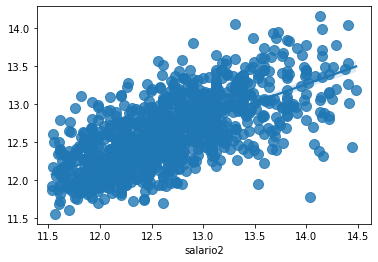

In [ ]:
sns.regplot(y_test, arbol2_nostand_predict, fit_reg=True, scatter_kws={"s": 100})

Comparamos con otro modelo de XGBoosting



In [ ]:
from sklearn import metrics

[00:24:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGBRegressor()
0.48091810024343973
0.0010402665030642235


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


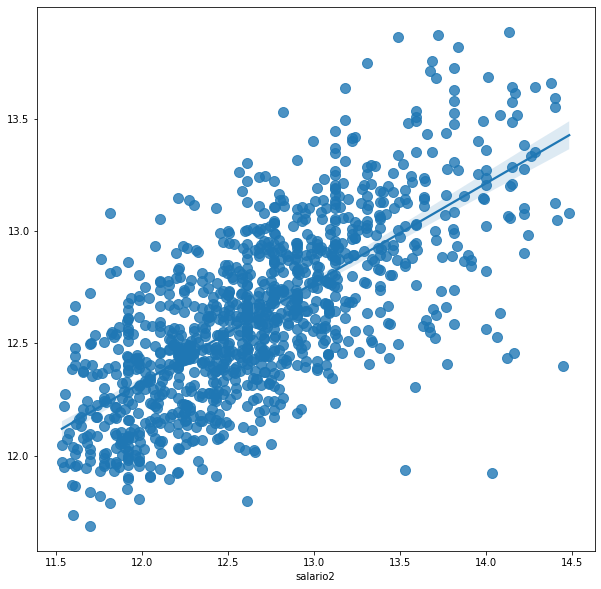

In [ ]:
y=np.log(data['salario2'])
feature_cols =['Años de experiencia','Antigüedad en la empresa actual',
        'Tiempo en el puesto actual',
       'gen_hombre','AMBA',
       'Cuyo', 'Pampa', 'Developer', 'BI', 'QA', 'Tester', 'Ingeniero', 'Java',
       'Python', 'SQL', 'HTML', 'R',
       'Cantidad_lenguajes', 'Docker', 'Amazon Web Services', 'Cantidad_plataformas',
       'jQuery', 'j', 'Node.js', 'Bootstrap',
       'Freelance',
       'Participación societaria en una cooperativa',
       'Remoto (empresa de otro país)', 'Staff (planta permanente)',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Exp_Expert', 'Exp_Semi-Senior', 'Exp_Senior',
       'Personas_en_tu_organización_51-500',
       'Personas_en_tu_organización_>500', 'PersonasACargo_1-5',
       'PersonasACargo_>5', 'beneficios', 'carrera_sist',
       'edu_superior universitario completo',
       'edu_superior universitario incompleto', 'edu_terciario completo',
       'edu_terciario incompleto', 'edu_universitario completo',
       'edu_universitario incompleto']
X = data[feature_cols]


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state = 127)
scaler = StandardScaler()

X_train_scl = scaler.fit_transform(X_train)

X_test_scl = scaler.transform(X_test)

model =xgb.XGBRegressor()
model.fit(X_train, y_train)
print(); print(model)

#---
expected_y  = y_test
predicted_y = model.predict(X_test)

#---


print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))

plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

In [ ]:
resultados=resultados.append({'modelo':'xgboost_ine','score':r2_score(expected_y, predicted_y),'parametro':'r2'},ignore_index=True)
resultados=resultados.append({'modelo':'xgboost_ine','score':mean_squared_error(expected_y, predicted_y),'parametro':'MSE'},ignore_index=True)

## Modelo PCA

In [ ]:
y=data['salario2']
feature_cols =['Años de experiencia','Antigüedad en la empresa actual',
        'Tiempo en el puesto actual',
       'gen_hombre','AMBA',
       'Cuyo', 'Pampa', 'Developer', 'BI', 'QA', 'Tester', 'Ingeniero', 'Java',
       'Python', 'SQL', 'HTML', 'R',
       'Cantidad_lenguajes', 'Docker', 'Amazon Web Services', 'Cantidad_plataformas',
       'jQuery', 'j', 'Node.js', 'Bootstrap',
       'Freelance',
       'Participación societaria en una cooperativa',
       'Remoto (empresa de otro país)', 'Staff (planta permanente)',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Exp_Expert', 'Exp_Semi-Senior', 'Exp_Senior',
       'Personas_en_tu_organización_51-500',
       'Personas_en_tu_organización_>500', 'PersonasACargo_1-5',
       'PersonasACargo_>5', 'beneficios', 'carrera_sist',
       'edu_superior universitario completo',
       'edu_superior universitario incompleto', 'edu_terciario completo',
       'edu_terciario incompleto', 'edu_universitario completo',
       'edu_universitario incompleto']
X = data[feature_cols]

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA()
pca.fit_transform(X)

array([[ 5.44831373e-01, -4.67742163e+00, -1.41061402e+00, ...,
         5.31403384e-04, -1.27243884e-16,  4.32173909e-15],
       [-5.61813102e+00,  2.58900897e+00,  2.58711646e+00, ...,
        -8.78033013e-03,  9.30499127e-15, -1.11973021e-14],
       [-5.90922395e+00,  1.59288975e+00,  1.77758965e-01, ...,
        -1.68387162e-02, -4.73731366e-15,  1.87024914e-15],
       ...,
       [-2.57387745e+00, -3.42392865e+00, -3.67295716e+00, ...,
        -3.42240137e-03, -5.05352618e-16, -4.18952927e-16],
       [-2.88547788e+00, -3.16985061e+00, -3.65606304e+00, ...,
        -1.51195178e-02, -2.82010656e-16, -6.53264742e-16],
       [ 7.15582489e+00,  2.56046840e-01,  1.51098871e+00, ...,
        -6.52176010e-03,  4.57775190e-16, -3.04408788e-16]])

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[5.70461158e-01 1.51199366e-01 1.17333791e-01 7.76047973e-02
 3.97382988e-02 4.23938484e-03 3.60703290e-03 3.36786761e-03
 2.60601741e-03 2.22893402e-03 2.10081387e-03 2.00565547e-03
 1.99575609e-03 1.60688273e-03 1.49374611e-03 1.46150649e-03
 1.36852994e-03 1.36477938e-03 1.23911642e-03 1.22700592e-03
 1.18569832e-03 9.71416322e-04 8.74456737e-04 8.19818748e-04
 7.91720542e-04 7.52200974e-04 7.48833513e-04 6.72738211e-04
 6.41087162e-04 6.17286227e-04 5.95941646e-04 5.44284752e-04
 3.83352205e-04 3.46587127e-04 2.92561394e-04 2.68690616e-04
 2.62064093e-04 2.25951282e-04 1.95505390e-04 1.86627109e-04
 1.78697297e-04 1.46311815e-04 4.77288148e-05 1.12503626e-31
 4.74757380e-33]


<BarContainer object of 45 artists>

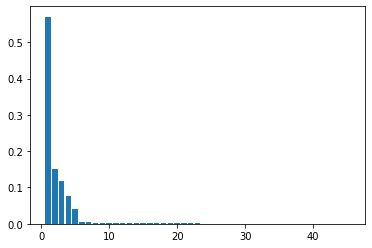

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)



In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
pca = PCA(n_components=7)
X_train = pca.fit_transform(X_train)
rf = LinearRegression()
rf.fit(X_train,y_train)

LinearRegression()

In [ ]:
X_test=pca.fit_transform(X_test)

In [ ]:
rf.score(X_test,y_test)

0.11119758214011233

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
rf = LinearRegression()
rf.fit(X_train,y_train)

LinearRegression()

In [ ]:
data[feature_cols].head()

Años de experiencia  Antigüedad en la empresa actual  \
0                 10.0                              0.0   
1                  2.0                              2.0   
2                  2.0                              1.6   
3                  1.0                              0.0   
4                  1.0                              0.0   

   Tiempo en el puesto actual  gen_hombre  AMBA  Cuyo  Pampa  Developer  BI  \
0                         0.0           1     0     0      0          0   0   
1                         2.0           1     0     0      0          1   0   
2                         1.6           1     0     0      0          1   0   
3                         1.0           1     0     0      0          1   0   
4                         0.0           1     0     0      0          1   0   

   QA  ...  PersonasACargo_1-5  PersonasACargo_>5  beneficios  carrera_sist  \
0   0  ...                   0                  0           1             1   
1   0  ...                   0                  0           1             0   
2   0  ...                   0                  0           1             0   
3   0  ...                   0                  0           0             0   
4   0  ...                   0                  0           1             0   

   edu_superior universitario completo  edu_superior universitario incompleto  \
0                                    0                                      0   
1                                    0                                      0   
2                                    0                                      0   
3                                    0                                      0   
4                                    0                                      0   

   edu_terciario completo  edu_terciario incompleto  \
0                       0                         0   
1                       0                         0   
2                       0                         0   
3                       0                         0   
4                       0                         0   

   edu_universitario completo  edu_universitario incompleto  
0                           1                             0  
1                           0                             0  
2                           0                             0  
3                           0                             0  
4                           0                             0  

[5 rows x 45 columns]

In [ ]:
rf.score(X_test, y_test)

0.33418109854317135

In [ ]:
X = data[feature_cols]
y=data['salario2']
pca = PCA(n_components=7)
X_train = pca.fit_transform(X)
X = sm.add_constant(X_train)
model = sm.OLS(y, X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:               salario2   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     67.96
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           1.65e-93
Time:                        00:24:37   Log-Likelihood:                -61642.
No. Observations:                4416   AIC:                         1.233e+05
Df Residuals:                    4408   BIC:                         1.234e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.801e+05   4206.053     90.372      0.0

In [ ]:
resultados=resultados.append({'modelo':'PCA','score':model.rsquared,'parametro':'r2'},ignore_index=True)

## Modelos de AdaBoostRegressor


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error


In [ ]:
data_columns = ['Años de experiencia','Antigüedad en la empresa actual',
        'Tiempo en el puesto actual',
       'gen_hombre','AMBA',
       'Cuyo', 'Pampa', 'Developer', 'BI', 'QA', 'Tester', 'Ingeniero', 'Java',
       'Python', 'SQL', 'HTML', 'R',
       'Cantidad_lenguajes', 'Docker', 'Amazon Web Services', 'Cantidad_plataformas',
       'jQuery', 'j', 'Node.js', 'Bootstrap',
       'Freelance',
       'Participación societaria en una cooperativa',
       'Remoto (empresa de otro país)', 'Staff (planta permanente)',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Exp_Expert', 'Exp_Semi-Senior', 'Exp_Senior',
       'Personas_en_tu_organización_51-500',
       'Personas_en_tu_organización_>500', 'PersonasACargo_1-5',
       'PersonasACargo_>5', 'beneficios', 'carrera_sist',
       'edu_superior universitario completo',
       'edu_superior universitario incompleto', 'edu_terciario completo',
       'edu_terciario incompleto', 'edu_universitario completo',
       'edu_universitario incompleto']


data.head()

Estoy trabajando en  Dónde estás trabajando Dedicación  \
0            Argentina              Catamarca  Full-Time   
1            Argentina                  Chaco  Full-Time   
2            Argentina                  Chaco  Full-Time   
3            Argentina                  Chaco  Full-Time   
4            Argentina                  Chaco  Full-Time   

                Tipo de contrato  \
0      Staff (planta permanente)   
1  Remoto (empresa de otro país)   
2      Staff (planta permanente)   
3  Remoto (empresa de otro país)   
4      Staff (planta permanente)   

  Último salario mensual  o retiro BRUTO (en tu moneda local)  \
0                                             300000            
1                                             900000            
2                                             120000            
3                                             440000            
4                                             140000            

  Recibís algún tipo de bono ¿De qué % fue el ajuste total acumulado?  \
0                         No                                        0   
1                         No                                        0   
2                  Un sueldo                                       20   
3                         No                                       54   
4                         No                                       15   

                           Con qué beneficios contas    funcion  \
0  Abono de Internet, Clases de idiomas, Crédito ...    Infosec   
1  Capacitaciones y/o cursos, Clases de idiomas, ...  Developer   
2                                 Horarios flexibles  Developer   
3                          Ninguna de las anteriores  Developer   
4  Vacaciones flexibles (adicionales a las reglam...  Developer   

   Años de experiencia  ...  estado_educ2               max_educ3  \
0                 10.0  ...      completo  universitario completo   
1                  2.0  ...          None                     NaN   
2                  2.0  ...          None                     NaN   
3                  1.0  ...          None                     NaN   
4                  1.0  ...          None                     NaN   

  edu_secundario completo edu_secundario incompleto  \
0                       0                         0   
1                       0                         0   
2                       0                         0   
3                       0                         0   
4                       0                         0   

  edu_superior universitario completo edu_superior universitario incompleto  \
0                                   0                                     0   
1                                   0                                     0   
2                                   0                                     0   
3                                   0                                     0   
4                                   0                                     0   

  edu_terciario completo edu_terciario incompleto edu_universitario completo  \
0                      0                        0                          1   
1                      0                        0                          0   
2                      0                        0                          0   
3                      0                        0                          0   
4                      0                        0                          0   

  edu_universitario incompleto  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 108 columns]

In [ ]:
X = data[data_columns]
print(X.shape)

y=np.log(data['salario2'])
print(y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 127)



(4416, 45)
(4416,)


In [ ]:
scaler = StandardScaler()

X_train_scl = scaler.fit_transform(X_train)

X_test_scl = scaler.transform(X_test)

In [ ]:
base_regressor = LinearRegression()

In [ ]:
bost_linreg = AdaBoostRegressor(base_estimator = base_regressor, 
                            n_estimators = 4,
                            learning_rate = 0.80,           
                            loss = 'linear',
                            random_state = 127)

In [ ]:
bost_linreg.fit(X_train_scl, y_train)

AdaBoostRegressor(base_estimator=LinearRegression(), learning_rate=0.8,
                  n_estimators=4, random_state=127)

In [ ]:
prediction = bost_linreg.predict(X_test_scl)
performance = mean_squared_error(y_test, prediction)
performance

0.20615467673963253

In [ ]:
r2_score(y_test,prediction)

0.4629959042194881

In [ ]:
resultados=resultados.append({'modelo':'adaboost_javi','score':r2_score(y_test,prediction),'parametro':'r2'},ignore_index=True)
resultados=resultados.append({'modelo':'adaboost_javi','score':performance,'parametro':'MSE'},ignore_index=True)

Otro modelo

In [ ]:
y=np.log(data['salario2'])
feature_cols =['Años de experiencia','Antigüedad en la empresa actual',
        'Tiempo en el puesto actual',
       'gen_hombre','AMBA',
       'Cuyo', 'Pampa', 'Developer', 'BI', 'QA', 'Tester', 'Ingeniero', 'Java',
       'Python', 'SQL', 'HTML', 'R',
       'Cantidad_lenguajes', 'Docker', 'Amazon Web Services', 'Cantidad_plataformas',
       'jQuery', 'j', 'Node.js', 'Bootstrap',
       'Freelance',
       'Participación societaria en una cooperativa',
       'Remoto (empresa de otro país)', 'Staff (planta permanente)',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Exp_Expert', 'Exp_Semi-Senior', 'Exp_Senior',
       'Personas_en_tu_organización_51-500',
       'Personas_en_tu_organización_>500', 'PersonasACargo_1-5',
       'PersonasACargo_>5', 'beneficios', 'carrera_sist',
       'edu_superior universitario completo',
       'edu_superior universitario incompleto', 'edu_terciario completo',
       'edu_terciario incompleto', 'edu_universitario completo',
       'edu_universitario incompleto']
X = data[feature_cols]


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state = 127)
scaler = StandardScaler()

X_train_scl = scaler.fit_transform(X_train)

X_test_scl = scaler.transform(X_test)

ada_reg = AdaBoostRegressor(n_estimators=100)
print(ada_reg)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=None) 


ada_reg.fit(X_train, y_train)


AdaBoostRegressor(n_estimators=100)


AdaBoostRegressor(n_estimators=100)

In [ ]:
scores = cross_val_score(ada_reg, X_train,y_train,cv=5)
print("Mean cross-validataion score: %.2f" % scores.mean())

Mean cross-validataion score: 0.30


In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(ada_reg, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())


K-fold CV average score: 0.30


In [ ]:
ypred = ada_reg.predict(X_test)
mse = mean_squared_error(y_test,ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))
print("r2 %.2f" % metrics.r2_score(y_test, ypred))

MSE: 0.25
RMSE: 0.50
r2 0.34


In [ ]:
resultados=resultados.append({'modelo':'adaboost_ine','score':r2_score(y_test, ypred),'parametro':'r2'},ignore_index=True)
resultados=resultados.append({'modelo':'adaboost_ine','score':mean_squared_error(y_test, ypred),'parametro':'MSE'},ignore_index=True)

## Bagging

In [ ]:
data_columns = ['Años de experiencia','Antigüedad en la empresa actual',
        'Tiempo en el puesto actual',
       'gen_hombre','AMBA',
       'Cuyo', 'Pampa', 'Developer', 'BI', 'QA', 'Tester', 'Ingeniero', 'Java',
       'Python', 'SQL', 'HTML', 'R',
       'Cantidad_lenguajes', 'Docker', 'Amazon Web Services', 'Cantidad_plataformas',
       'jQuery', 'j', 'Node.js', 'Bootstrap',
       'Freelance',
       'Participación societaria en una cooperativa',
       'Remoto (empresa de otro país)', 'Staff (planta permanente)',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Exp_Expert', 'Exp_Semi-Senior', 'Exp_Senior',
       'Personas_en_tu_organización_51-500',
       'Personas_en_tu_organización_>500', 'PersonasACargo_1-5',
       'PersonasACargo_>5', 'beneficios', 'carrera_sist',
       'edu_superior universitario completo',
       'edu_superior universitario incompleto', 'edu_terciario completo',
       'edu_terciario incompleto', 'edu_universitario completo',
       'edu_universitario incompleto']


In [ ]:
X = data[data_columns]
print(X.shape)

y=np.log(data['salario2'])
print(y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 127)

(4416, 45)
(4416,)


In [ ]:
scaler = StandardScaler()

X_train_scl = scaler.fit_transform(X_train)

X_test_scl = scaler.transform(X_test)

In [ ]:
model_1 = LinearRegression()
fit_1=model_1.fit(X_train_scl,y_train)

In [ ]:
predict_1 = fit_1.predict(X_test_scl)
performance_1 = mean_squared_error(y_test, predict_1)
performance_1 

0.20486044011615606

In [ ]:
r2_score(y_test, predict_1)

0.4663672095845067

In [ ]:
model_2 = Lasso(alpha = 0.025)
fit_2=model_2.fit(X_train_scl,y_train)

In [ ]:
predict_2 = fit_2.predict(X_test_scl)
performance_2 = mean_squared_error(y_test, predict_2)
performance_2

0.23369230528479717

In [ ]:
r2_score(y_test, predict_2)

0.39126423385087283

In [ ]:
from sklearn import tree
model_3 = tree.DecisionTreeRegressor(random_state=200)
fit_3=model_3.fit(X_train_scl,y_train)

In [ ]:
predict_3 = fit_3.predict(X_test_scl)
performance_3 = mean_squared_error(y_test, predict_3)
performance_3

0.4310353024869601

In [ ]:
r2_score(y_test, predict_3)

-0.12278666932124249

In [ ]:
def predict_ensamble(X, model_1, model_2):
    y_pred_1 = model_1.predict(X)
    y_pred_2 = model_2.predict(X)
    result = (y_pred_1 +y_pred_2)/2
    return result

In [ ]:
y_pred_ensemble = predict_ensamble(X_test_scl, fit_1, fit_2)
performance_ensemble = mean_squared_error(y_test, y_pred_ensemble)
performance_ensemble 

0.21295332852352034

In [ ]:
r2_score(y_test, y_pred_ensemble)

0.445286367324799

In [ ]:
resultados=resultados.append({'modelo':'bagging','score':r2_score(y_test, y_pred_ensemble),'parametro':'r2'},ignore_index=True)
resultados=resultados.append({'modelo':'bagging','score':mean_squared_error(y_test, y_pred_ensemble),'parametro':'MSE'},ignore_index=True)

# Elección de modelo final

Vamos a comparar todos los rendimientos obtenidos de los distintos modelos utilizados

In [ ]:
resultados.sort_values(by=['parametro','score'],ascending=False)

parametro     score                       modelo
5         r2  0.497660  Regresion_carrera_sist_full
6         r2  0.480919                 xgboost_base
14        r2  0.480918                  xgboost_ine
4         r2  0.472899       Regresion_develop_full
17        r2  0.462996                adaboost_javi
2         r2  0.454597           Regresion_log_full
3         r2  0.453309            Regresion_log_red
21        r2  0.445286                      bagging
12        r2  0.426160            xgboost_nostand_2
8         r2  0.425612               xgboost_modif1
10        r2  0.415649            xgboost_nostand_1
0         r2  0.381233               Regresion_full
1         r2  0.379162               Regresion_red1
19        r2  0.342778                 adaboost_ine
16        r2  0.097407                          PCA
20       MSE  0.252306                 adaboost_ine
11       MSE  0.224331            xgboost_nostand_1
9        MSE  0.220506               xgboost_modif1
13       MSE  0.220296            xgboost_nostand_2
22       MSE  0.212953                      bagging
18       MSE  0.206155                adaboost_javi
15       MSE  0.199274                  xgboost_ine
7        MSE  0.199274                 xgboost_base

No vamos a tener en cuenta los modelos 'Regresion_carrera_sist_full' ni 'Regresion_develop_full'. Si bien performan bien, se refieren a una parte del dataframe y no al total. Además, son modelos más simples.

Se elige, por lo tanto, al modelo 'xgboost_base' como aquel que mejor performa para la predicción de salarios.

# Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [ ]:
X = data[data_columns]
print(X.shape)

y=np.log(data['salario2'])
print(y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 127)

(4416, 45)
(4416,)


In [ ]:
from xgboost import XGBRegressor

In [ ]:
pipeline = Pipeline([('scaler', StandardScaler()), ('regressor', XGBRegressor())])
pipeline.fit(X_train, y_train)

[00:24:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('scaler', StandardScaler()), ('regressor', XGBRegressor())])

In [ ]:
r2 = pipeline.score(X_test, y_test)
print(f"XGBoost regressor r2: {r2}")
pipeline.steps

XGBoost regressor r2: 0.48091863216898656


[('scaler', StandardScaler()), ('regressor', XGBRegressor())]

In [ ]:
pipeline.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()), ('regressor', XGBRegressor())])>

# Feature Importance

<BarContainer object of 45 artists>

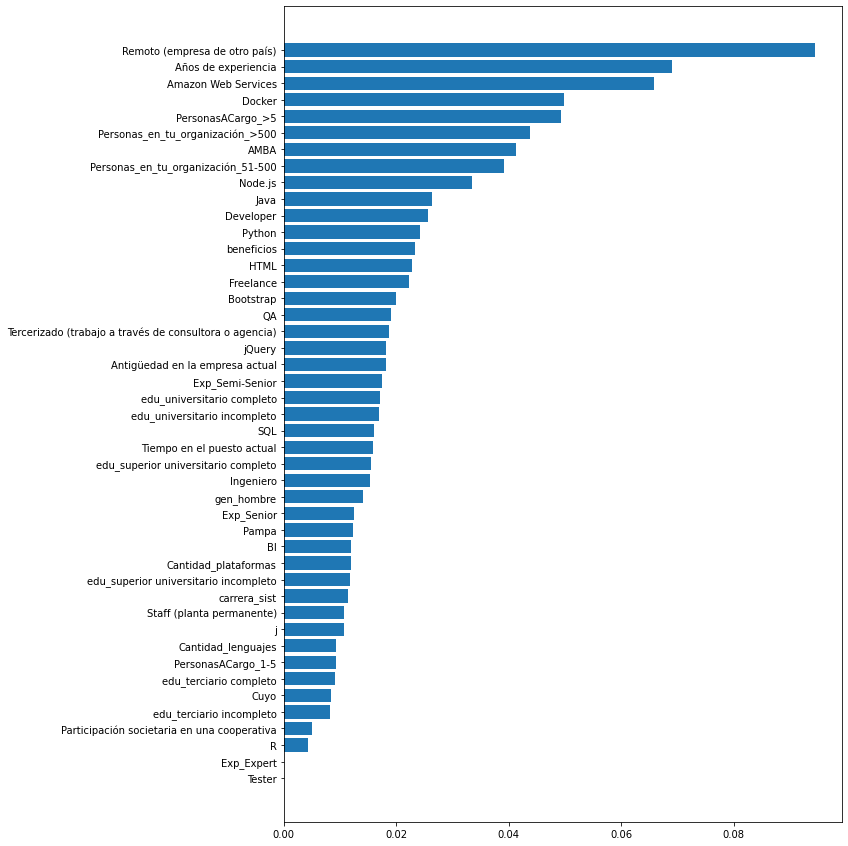

In [ ]:
feature_importance=pd.DataFrame(arbol1.feature_importances_,index=X.columns,columns={'importancia'})
feature_importance=feature_importance.sort_values(by='importancia',ascending=True)
plt.figure(figsize=(10,15))
plt.barh(width='importancia',data=feature_importance,y=feature_importance.index)

# Conclusiones

Luego de los análisis y modelados realizados, podemos concluir lo siguiente:

- La base de datos utilizada no es confiable. Presenta muchos problemas para realizar un modelado y resultó complicado poder trabajarla.

- La alta dispersión salarial puede deberse al contexto actual del país, en el que intervienen muchos factores.

- La principal feature es trabajar para el exterior, lo que refuerza lo dicho anteriormente. El salario en moneda extranjera se diferencia ampliamente de aquellos asalariados locales.

# Simulador

El empleado de RRHH debe completar los sigueintes datos 

In [ ]:
print("Por favos complete los siguientes datos del candidato para obtener un salario estimado:")
genero = float(input("Ingrese 1 si es hombre y 0 en caso contrario: "))
experiencia = float(input("Ingrese los años experiencia: "))
antiguedad = float(input("Ingrese antiguedad en la empresa acutal del candidato: "))
puesto_actual = float(input("Ingrese tiempo en puesto actual: "))
pyth = float(input("Ingrese 1 si utiliza pyhton o 0 en caso contrario: "))
SQL = float(input("Ingrese 1 si utiliza SQL o 0 en caso contrario: "))
HTML = float(input("Ingrese 1 si utiliza HTML o 0 en caso contrario: "))
R = float(input("Ingrese 1 si utiliza R o 0 en caso contrario: "))
plataformas = float(input("Ingrese la cantidad de plataformas que maneja el candidato: "))
lenguajes = float(input("Ingrese la cantidad de lenguajes que maneja el candidato: "))
remoto = float(input("Ingrese 1 si el trabajo a realizar es remoto y 0 en caso contrario: "))
carrera_sist = float(input("Ingrese 1 si estudió alguna carrera en sistemas y 0 en caso contrario: "))
AMBA = float(input("Ingrese 1 si trabaja en AMBA y 0 en caso contrario: "))
Cuyo = float(input("Ingrese 1 si trabaja en Cuyo y 0 en caso contrario: "))
Pampa= float(input("Ingrese 1 si trabaja en región Pampeana y 0 en caso contrario: "))
Developer= float(input("Ingrese 1 si trabaja de developer y 0 en caso contrario: "))
BI = float(input("Ingrese 1 si trabaja en BI y 0 en caso contrario: "))
QA = float(input("Ingrese 1 si trabaja en QA y 0 en caso contrario: "))
tester = float(input("Ingrese 1 si trabaja de tester y 0 en caso contrario: "))
ing = float(input("Ingrese 1 si es Ingeniero y 0 en caso contrario: "))
java = float(input("Ingrese 1 si utiliza java y 0 en caso contrario: "))
amazon = float(input("Ingrese 1 si utiliza amazon web services y 0 en caso contrario: "))
dock = float(input("Ingrese 1 si utiliza Docker y 0 en caso contrario: "))
j = float(input("Ingrese 1 si utiliza j y 0 en caso contrario: "))
jq = float(input("Ingrese 1 si utiliza jq y 0 en caso contrario: "))
node = float(input("Ingrese 1 si utiliza Node.js y 0 en caso contrario: "))
boots = float(input("Ingrese 1 si utiliza Booststrap y 0 en caso contrario: "))
expert = float(input("Ingrese 1 si es puesto experto y 0 en caso contrario: "))
ssenior = float(input("Ingrese 1 si es puesto semi-senior y 0 en caso contrario: "))
senior = float(input("Ingrese 1 si es puesto senior y 0 en caso contrario: "))
univ = float(input("Ingrese 1 si tiene universitario completo y 0 en caso contrario: "))
univ2 = float(input("Ingrese 1 si tiene universitario incompleto y 0 en caso contrario: "))
ter = float(input("Ingrese 1 si tiene terciario completo y 0 en caso contrario: "))
ter2 = float(input("Ingrese 1 si tiene terciario incompleto y 0 en caso contrario: "))
pos = float(input("Ingrese 1 si tiene posgrado completo y 0 en caso contrario: "))
pos2 = float(input("Ingrese 1 si tiene posgrado incompleto y 0 en caso contrario: "))
cargo15 = float(input("Ingrese 1 si tiene entre 1 y 5 personas a cargo y 0 en caso contrario: "))
cargo5 = float(input("Ingrese 1 si tiene entre más de 5 personas a cargo y 0 en caso contrario: "))

Por favos complete los siguientes datos del candidato para obtener un salario estimado:
Ingrese 1 si es hombre y 0 en caso contrario: 1
Ingrese los años experiencia: 5
Ingrese antiguedad en la empresa acutal del candidato: 3
Ingrese tiempo en puesto actual: 3
Ingrese 1 si utiliza pyhton o 0 en caso contrario: 1
Ingrese 1 si utiliza SQL o 0 en caso contrario: 1
Ingrese 1 si utiliza HTML o 0 en caso contrario: 0
Ingrese 1 si utiliza R o 0 en caso contrario: 0
Ingrese la cantidad de plataformas que maneja el candidato: 2
Ingrese la cantidad de lenguajes que maneja el candidato: 4
Ingrese 1 si el trabajo a realizar es remoto y 0 en caso contrario: 1
Ingrese 1 si estudió alguna carrera en sistemas y 0 en caso contrario: 1
Ingrese 1 si trabaja en AMBA y 0 en caso contrario: 1
Ingrese 1 si trabaja en Cuyo y 0 en caso contrario: 0
Ingrese 1 si trabaja en región Pampeana y 0 en caso contrario: 0
Ingrese 1 si trabaja de developer y 0 en caso contrario: 1
Ingrese 1 si trabaja en BI y 0 en caso co

In [ ]:
import math

In [ ]:
Nuevosueldo={'Años de experiencia':[experiencia],'Antigüedad en la empresa actual':[antiguedad],
        'Tiempo en el puesto actual':[puesto_actual],
       'gen_hombre':[genero],'AMBA':[AMBA],
       'Cuyo':[Cuyo], 'Pampa':[Pampa], 'Developer':[Developer], 'BI':[BI], 'QA':[QA], 'Tester':[tester], 'Ingeniero':[ing], 'Java':[java],
       'Python':[pyth], 'SQL':[SQL], 'HTML':[HTML], 'R':[R],
       'Cantidad_lenguajes':[lenguajes], 'Docker':[dock], 'Amazon Web Services':[amazon], 'Cantidad_plataformas':[plataformas],
       'jQuery':[jq], 'j':[j], 'Node.js':[node], 'Bootstrap':[boots],
       'Freelance':[0],
       'Participación societaria en una cooperativa':[0],
       'Remoto (empresa de otro país)':[1], 'Staff (planta permanente)':[1],
       'Tercerizado (trabajo a través de consultora o agencia)':[0],
       'Exp_Expert':[expert], 'Exp_Semi-Senior':[ssenior], 'Exp_Senior':[senior],
       'Personas_en_tu_organización_51-500':[0],
       'Personas_en_tu_organización_>500':[1], 'PersonasACargo_1-5':[cargo15],
       'PersonasACargo_>5':[cargo5], 'beneficios':[0], 'carrera_sist':[carrera_sist],
       'edu_superior universitario completo':[pos],
       'edu_superior universitario incompleto':[pos2], 'edu_terciario completo':[ter],
       'edu_terciario incompleto':[ter2], 'edu_universitario completo':[univ],
       'edu_universitario incompleto':[univ2]}

In [ ]:
Empleadosnuevos=pd.DataFrame(Nuevosueldo, columns=['Años de experiencia','Antigüedad en la empresa actual',
        'Tiempo en el puesto actual',
       'gen_hombre','AMBA',
       'Cuyo', 'Pampa', 'Developer', 'BI', 'QA', 'Tester', 'Ingeniero', 'Java',
       'Python', 'SQL', 'HTML', 'R',
       'Cantidad_lenguajes', 'Docker', 'Amazon Web Services', 'Cantidad_plataformas',
       'jQuery', 'j', 'Node.js', 'Bootstrap',
       'Freelance',
       'Participación societaria en una cooperativa',
       'Remoto (empresa de otro país)', 'Staff (planta permanente)',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Exp_Expert', 'Exp_Semi-Senior', 'Exp_Senior',
       'Personas_en_tu_organización_51-500',
       'Personas_en_tu_organización_>500', 'PersonasACargo_1-5',
       'PersonasACargo_>5', 'beneficios', 'carrera_sist',
       'edu_superior universitario completo',
       'edu_superior universitario incompleto', 'edu_terciario completo',
       'edu_terciario incompleto', 'edu_universitario completo',
       'edu_universitario incompleto'])

In [ ]:
prediccion= math.exp(pipeline.predict(Empleadosnuevos))
print(prediccion)

750429.0744123397


# Caso practico: Formulario de recruting


In [ ]:
data_test=pd.read_csv('/content/gdrive/MyDrive/Formulario sin título.csv',sep=',')

In [ ]:
data_test

Marca temporal Nombre y Apellido del aspirante  Genero  \
0  2022/11/21 3:18:29 p. m. GMT-3                            Alfa  Hombre   
1  2022/11/21 4:21:26 p. m. GMT-3                         Mariana   Mujer   
2  2022/11/21 4:21:48 p. m. GMT-3                           lucia   Mujer   

   Edad del aspirante  Años de experiencia del aspirante  \
0                  34                                 10   
1                  25                                  5   
2                  28                                  5   

   Antigüedad del aspirante en la empresa actual  en caso de ser headhunting. (si no tiene trabajo poner 0)  \
0                                                 10                                                          
1                                                  0                                                          
2                                                  3                                                          

   Antigüedad del aspirante en el puesto actual  en caso de ser headhunting. (si no tiene trabajo poner 0)  \
0                                                 12                                                         
1                                                  3                                                         
2                                                  3                                                         

  ¿En que región de Argentina vive el aspirante al puesto? [Cuyo]  \
0                                                NaN                
1                                                NaN                
2                                           Locación                

   ¿En que región de Argentina vive el aspirante al puesto? [Pampa]  \
0                                                NaN                  
1                                                NaN                  
2                                                NaN                  

  ¿En que región de Argentina vive el aspirante al puesto? [AMBA]  ...  \
0                                                NaN               ...   
1                                           Locación               ...   
2                                                NaN               ...   

   ¿Cuántas personas tendría a cargo el aspirante en caso de ser contratado? [No tendra personas a cargo]  \
0                                   Personas a cargo                                                        
1                                   Personas a cargo                                                        
2                                                NaN                                                        

  ¿Cuántas personas tendría a cargo el aspirante en caso de ser contratado? [1-5 personas]  \
0                                                NaN                                         
1                                                NaN                                         
2                                   Personas a cargo                                         

   ¿Cuántas personas tendría a cargo el aspirante en caso de ser contratado? [más de 5]  \
0                                                NaN                                      
1                                                NaN                                      
2                                                NaN                                      

  ¿Cuál es el nivel de educación del aspirante ? [educación superior universitario completo]  \
0                                          Educación                                           
1                                                NaN                                           
2                                                NaN                                           

  ¿Cuál es el nivel de educación del aspirante ? [educación superior universitario incompleto]  \
0                                                NaN          

In [ ]:
data_test=data_test.replace(np.NaN, 0)
data_test

Marca temporal Nombre y Apellido del aspirante  Genero  \
0  2022/11/21 3:18:29 p. m. GMT-3                            Alfa  Hombre   
1  2022/11/21 4:21:26 p. m. GMT-3                         Mariana   Mujer   
2  2022/11/21 4:21:48 p. m. GMT-3                           lucia   Mujer   

   Edad del aspirante  Años de experiencia del aspirante  \
0                  34                                 10   
1                  25                                  5   
2                  28                                  5   

   Antigüedad del aspirante en la empresa actual  en caso de ser headhunting. (si no tiene trabajo poner 0)  \
0                                                 10                                                          
1                                                  0                                                          
2                                                  3                                                          

   Antigüedad del aspirante en el puesto actual  en caso de ser headhunting. (si no tiene trabajo poner 0)  \
0                                                 12                                                         
1                                                  3                                                         
2                                                  3                                                         

  ¿En que región de Argentina vive el aspirante al puesto? [Cuyo]  \
0                                                  0                
1                                                  0                
2                                           Locación                

   ¿En que región de Argentina vive el aspirante al puesto? [Pampa]  \
0                                                0.0                  
1                                                0.0                  
2                                                0.0                  

  ¿En que región de Argentina vive el aspirante al puesto? [AMBA]  ...  \
0                                                  0               ...   
1                                           Locación               ...   
2                                                  0               ...   

   ¿Cuántas personas tendría a cargo el aspirante en caso de ser contratado? [No tendra personas a cargo]  \
0                                   Personas a cargo                                                        
1                                   Personas a cargo                                                        
2                                                  0                                                        

  ¿Cuántas personas tendría a cargo el aspirante en caso de ser contratado? [1-5 personas]  \
0                                                  0                                         
1                                                  0                                         
2                                   Personas a cargo                                         

   ¿Cuántas personas tendría a cargo el aspirante en caso de ser contratado? [más de 5]  \
0                                                0.0                                      
1                                                0.0                                      
2                                                0.0                                      

  ¿Cuál es el nivel de educación del aspirante ? [educación superior universitario completo]  \
0                                          Educación                                           
1                                                  0                                           
2                                                  0                                           

  ¿Cuál es el nivel de educación del aspirante ? [educación superior universitario incompleto]  \
0                                                  0          

In [ ]:
data_test=data_test.replace("No", 0)
data_test=data_test.replace("Locación", 1)
data_test=data_test.replace("Profesión", 1)
data_test=data_test.replace("Lenguaje", 1)
data_test=data_test.replace("Plataforma", 1)
data_test=data_test.replace("Frameworks", 1)
data_test=data_test.replace("Modalidad de Trabajo", 1)
data_test=data_test.replace("Señority", 1)
data_test=data_test.replace("Unidad de negocio contratante", 1)
data_test=data_test.replace("Personas a cargo", 1)
data_test=data_test.replace("Educación", 1)
data_test=data_test.replace("Si", 1)
data_test=data_test.replace("Mujer", 1)
data_test=data_test.replace("Hombre", 1)
data_test=data_test.replace("Prefiero no decirlo", 1)
data_test=data_test.replace("Otro genero", 1)
data_test

Marca temporal Nombre y Apellido del aspirante  Genero  \
0  2022/11/21 3:18:29 p. m. GMT-3                            Alfa       1   
1  2022/11/21 4:21:26 p. m. GMT-3                         Mariana       1   
2  2022/11/21 4:21:48 p. m. GMT-3                           lucia       1   

   Edad del aspirante  Años de experiencia del aspirante  \
0                  34                                 10   
1                  25                                  5   
2                  28                                  5   

   Antigüedad del aspirante en la empresa actual  en caso de ser headhunting. (si no tiene trabajo poner 0)  \
0                                                 10                                                          
1                                                  0                                                          
2                                                  3                                                          

   Antigüedad del aspirante en el puesto actual  en caso de ser headhunting. (si no tiene trabajo poner 0)  \
0                                                 12                                                         
1                                                  3                                                         
2                                                  3                                                         

   ¿En que región de Argentina vive el aspirante al puesto? [Cuyo]  \
0                                                  0                 
1                                                  0                 
2                                                  1                 

   ¿En que región de Argentina vive el aspirante al puesto? [Pampa]  \
0                                                0.0                  
1                                                0.0                  
2                                                0.0                  

   ¿En que región de Argentina vive el aspirante al puesto? [AMBA]  ...  \
0                                                  0                ...   
1                                                  1                ...   
2                                                  0                ...   

   ¿Cuántas personas tendría a cargo el aspirante en caso de ser contratado? [No tendra personas a cargo]  \
0                                                  1                                                        
1                                                  1                                                        
2                                                  0                                                        

   ¿Cuántas personas tendría a cargo el aspirante en caso de ser contratado? [1-5 personas]  \
0                                                  0                                          
1                                                  0                                          
2                                                  1                                          

   ¿Cuántas personas tendría a cargo el aspirante en caso de ser contratado? [más de 5]  \
0                                                0.0                                      
1                                                0.0                                      
2                                                0.0                                      

   ¿Cuál es el nivel de educación del aspirante ? [educación superior universitario completo]  \
0                                                  1                                            
1                                                  0                                            
2                                                  0                                            

   ¿Cuál es el nivel de educación del aspirante ? [educación superior universitario incompleto]  \
0                                            

In [ ]:
data_test.dtypes

Marca temporal                                                                                                                               object
Nombre y Apellido del aspirante                                                                                                              object
Genero                                                                                                                                        int64
Edad del aspirante                                                                                                                            int64
Años de experiencia del aspirante                                                                                                             int64
Antigüedad del aspirante en la empresa actual  en caso de ser headhunting. (si no tiene trabajo poner 0)                                      int64
Antigüedad del aspirante en el puesto actual  en caso de ser headhunting. (si no tiene trabajo poner 0)         

In [ ]:
data_test.columns

Index(['Marca temporal', 'Nombre y Apellido del aspirante', 'Genero',
       'Edad del aspirante', 'Años de experiencia del aspirante',
       'Antigüedad del aspirante en la empresa actual  en caso de ser headhunting. (si no tiene trabajo poner 0)',
       'Antigüedad del aspirante en el puesto actual  en caso de ser headhunting. (si no tiene trabajo poner 0)',
       '¿En que región de Argentina vive el aspirante al puesto? [Cuyo]',
       '¿En que región de Argentina vive el aspirante al puesto? [Pampa]',
       '¿En que región de Argentina vive el aspirante al puesto? [AMBA]',
       '¿En que región de Argentina vive el aspirante al puesto? [Patagonia]',
       '¿En que región de Argentina vive el aspirante al puesto? [NOA]',
       '¿En que región de Argentina vive el aspirante al puesto? [NEA]',
       '¿Cuál es su ultima profesión?  [Developer]',
       '¿Cuál es su ultima profesión?  [Data Analytics]',
       '¿Cuál es su ultima profesión?  [QA]',
       '¿Cuál es su ultima pro

In [ ]:
data_test= data_test.rename({'Años de experiencia del aspirante':'Años de experiencia',
                                  'Antigüedad del aspirante en la empresa actual  en caso de ser headhunting. (si no tiene trabajo poner 0)':'Antigüedad en la empresa actual',
                                  'Antigüedad del aspirante en el puesto actual  en caso de ser headhunting. (si no tiene trabajo poner 0)':'Tiempo en el puesto actual','Genero':'gen_hombre','¿En que región de Argentina vive el aspirante al puesto? [AMBA]':'AMBA','¿En que región de Argentina vive el aspirante al puesto? [Cuyo]':'Cuyo','¿En que región de Argentina vive el aspirante al puesto? [Pampa]':'Pampa','¿Cuál es su ultima profesión?  [Developer]':'Developer','¿Cuál es su ultima profesión?  [Data Analytics]':'BI','¿Cuál es su ultima profesión?  [QA]':'QA','¿Cuál es su ultima profesión?  [Tester]'
       :'Tester', '¿Cuál es su ultima profesión?  [Ingeniero]':'Ingeniero', '¿Qué lenguajes de los de la siguiente lista sabe utilizar? [Java]':'Java',
       '¿Qué lenguajes de los de la siguiente lista sabe utilizar? [Python]':'Python', '¿Qué lenguajes de los de la siguiente lista sabe utilizar? [SQL]':'SQL', '¿Qué lenguajes de los de la siguiente lista sabe utilizar? [HTML]':'HTML', '¿Qué lenguajes de los de la siguiente lista sabe utilizar? [R]': 'R',
       '¿Cuantos Lenguajes maneja el aspirante?':'Cantidad_lenguajes', '¿Cuál de las siguientes plataformas sabe utilizar? [Docker]':'Docker', '¿Cuál de las siguientes plataformas sabe utilizar? [Amazon Web Services]':'Amazon Web Services', '¿Cúantas plataformas maneja el aspirante?':'Cantidad_plataformas',
       '¿Cuál de las siguientes Frameworks conoce? [jQuery]':'jQuery', '¿Cuál de las siguientes Frameworks conoce? [j]':'j', '¿Cuál de las siguientes Frameworks conoce? [Node.js]':'Node.js', '¿Cuál de las siguientes Frameworks conoce? [Bootstrap]':'Bootstrap',
       '¿En cuál de las siguientes modalidades entraría a trabajar si fuera contratado? [Freelance]':'Freelance',
       '¿En cuál de las siguientes modalidades entraría a trabajar si fuera contratado? [Participación societaria en una cooperativa]':'Participación societaria en una cooperativa',
       '¿En cuál de las siguientes modalidades entraría a trabajar si fuera contratado? [Remoto (empresa de otro país)]':'Remoto (empresa de otro país)', '¿En cuál de las siguientes modalidades entraría a trabajar si fuera contratado? [Staff (planta permanente)]':'Staff (planta permanente)',
       '¿En cuál de las siguientes modalidades entraría a trabajar si fuera contratado? [Tercerizado (trabajo a través de consultora o agencia)]':'Tercerizado (trabajo a través de consultora o agencia)',
       '¿Qué grado de señority tiene en el puesto laboral a ocupar? [Experto]':'Exp_Expert', '¿Qué grado de señority tiene en el puesto laboral a ocupar? [Semi_senior]':'Exp_Semi-Senior', '¿Qué grado de señority tiene en el puesto laboral a ocupar? [Senior]':'Exp_Senior',
       '¿Cuántos empleados tiene la empresa o unidad de negocio en el país de contratación? [51-500]':'Personas_en_tu_organización_51-500',
       '¿Cuántos empleados tiene la empresa o unidad de negocio en el país de contratación? [más de 500]':'Personas_en_tu_organización_>500', '¿Cuántos empleados tiene la empresa o unidad de negocio en el país de contratación? [1-5]':'PersonasACargo_1-5',
       '¿Cuántos empleados tiene la empresa o unidad de negocio en el país de contratación? [5-51]':'PersonasACargo_>5', '¿Tendrá beneficios extraordinario a los que establece la ley del país de contratación?':'beneficios', 'El aspirante ¿Estudio alguna carrera relacionada a sistemas de información?':'carrera_sist',
       '¿Cuál es el nivel de educación del aspirante ? [educación superior universitario completo]':'edu_superior universitario completo',
       '¿Cuál es el nivel de educación del aspirante ? [educación superior universitario incompleto]':'edu_superior universitario incompleto','¿Cuál es el nivel de educación del aspirante ? [educación terciario completo]':'edu_terciario completo',
       '¿Cuál es el nivel de educación del aspirante ? [educación terciario incompleto]':'edu_terciario incompleto', '¿Cuál es el nivel de educación del aspirante ? [educación universitario completo]':'edu_universitario completo',
       '¿Cuál es el nivel de educación del aspirante ? [educación universitario incompleto]':'edu_universitario incompleto'}, axis=1)
data_test

Marca temporal Nombre y Apellido del aspirante  gen_hombre  \
0  2022/11/21 3:18:29 p. m. GMT-3                            Alfa           1   
1  2022/11/21 4:21:26 p. m. GMT-3                         Mariana           1   
2  2022/11/21 4:21:48 p. m. GMT-3                           lucia           1   

   Edad del aspirante  Años de experiencia  Antigüedad en la empresa actual  \
0                  34                   10                               10   
1                  25                    5                                0   
2                  28                    5                                3   

   Tiempo en el puesto actual  Cuyo  Pampa  AMBA  ...  \
0                          12     0    0.0     0  ...   
1                           3     0    0.0     1  ...   
2                           3     1    0.0     0  ...   

   ¿Cuántas personas tendría a cargo el aspirante en caso de ser contratado? [No tendra personas a cargo]  \
0                                                  1                                                        
1                                                  1                                                        
2                                                  0                                                        

   ¿Cuántas personas tendría a cargo el aspirante en caso de ser contratado? [1-5 personas]  \
0                                                  0                                          
1                                                  0                                          
2                                                  1                                          

   ¿Cuántas personas tendría a cargo el aspirante en caso de ser contratado? [más de 5]  \
0                                                0.0                                      
1                                                0.0                                      
2                                                0.0                                      

   edu_superior universitario completo  edu_superior universitario incompleto  \
0                                    1                                      0   
1                                    0                                      1   
2                                    0                                      0   

   edu_terciario completo  edu_terciario incompleto  \
0                       0                       0.0   
1                       0                       0.0   
2                       1                       0.0   

   edu_universitario completo  edu_universitario incompleto  carrera_sist  
0                         0.0                           0.0             1  
1                         0.0                           0.0             0  
2                         0.0                           0.0             1  

[3 rows x 57 columns]

In [ ]:
 data_columns_test=['Años de experiencia','Antigüedad en la empresa actual',
        'Tiempo en el puesto actual',
       'gen_hombre','AMBA',
       'Cuyo', 'Pampa', 'Developer', 'BI', 'QA', 'Tester', 'Ingeniero', 'Java',
       'Python', 'SQL', 'HTML', 'R',
       'Cantidad_lenguajes', 'Docker', 'Amazon Web Services', 'Cantidad_plataformas',
       'jQuery', 'j', 'Node.js', 'Bootstrap',
       'Freelance',
       'Participación societaria en una cooperativa',
       'Remoto (empresa de otro país)', 'Staff (planta permanente)',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Exp_Expert', 'Exp_Semi-Senior', 'Exp_Senior',
       'Personas_en_tu_organización_51-500',
       'Personas_en_tu_organización_>500', 'PersonasACargo_1-5',
       'PersonasACargo_>5', 'beneficios', 'carrera_sist',
       'edu_superior universitario completo',
       'edu_superior universitario incompleto', 'edu_terciario completo',
       'edu_terciario incompleto', 'edu_universitario completo',
       'edu_universitario incompleto']

In [ ]:
data_test=data_test[data_columns_test]
prediccion= pipeline.predict(data_test)

salario_final=[]

for item in prediccion:
  valor=np.exp(item)
  salario_final.append(valor)

print(salario_final)

[276670.22, 482354.4, 552962.94]


In [ ]:
data_prediccion=pd.DataFrame(salario_final)
data_prediccion.rename(columns={0:'salario_final'},inplace=True)
data_prediccion

salario_final
0   276670.21875
1   482354.40625
2   552962.93750

In [ ]:
data_test=pd.concat([data_test,data_prediccion],axis=1)
data_test

Años de experiencia  Antigüedad en la empresa actual  \
0                   10                               10   
1                    5                                0   
2                    5                                3   

   Tiempo en el puesto actual  gen_hombre  AMBA  Cuyo  Pampa  Developer  BI  \
0                          12           1     0     0    0.0          1   0   
1                           3           1     1     0    0.0          0   1   
2                           3           1     0     1    0.0          1   0   

    QA  ...  PersonasACargo_>5  beneficios  carrera_sist  \
0  0.0  ...                0.0           0             1   
1  0.0  ...                0.0           0             0   
2  0.0  ...                0.0           1             1   

   edu_superior universitario completo  edu_superior universitario incompleto  \
0                                    1                                      0   
1                                    0                                      1   
2                                    0                                      0   

   edu_terciario completo  edu_terciario incompleto  \
0                       0                       0.0   
1                       0                       0.0   
2                       1                       0.0   

   edu_universitario completo  edu_universitario incompleto  salario_final  
0                         0.0                           0.0   276670.21875  
1                         0.0                           0.0   482354.40625  
2                         0.0                           0.0   552962.93750  

[3 rows x 46 columns]

In [ ]:
from pandas import ExcelWriter
writer = ExcelWriter('/content/gdrive/MyDrive/predicciones.xlsx')
data_test.to_excel(writer, 'Hoja de datos', index=False)
writer.save()